### PROBLEM STATEMENT : Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interest on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.



**FRA: Credit Risk**

- <a href = #link1>Outlier Treatment</a>
- <a href = #link2>Missing Value Treatment</a>
- <a href = #link3>EDA</a>
- <a href = #link4>Train Test Split</a>
- <a href = #link5>Logistic Regression Model</a>
- <a href = #link6>Random Forest Model</a>
- <a href = #link7>LDA</a>
- <a href = #link8>Model Performance</a>
- <a href = #link9>Conclusions and Recommendations</a>


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
color = sns.color_palette()
from sklearn.impute import KNNImputer
import sklearn.metrics as metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")




In [308]:
# Import Dataset

Company = pd.read_excel('CompData-1.xlsx') 

# Top 5 records of  Data
Company.head()

Co_Code          Co_Name  _Operating_Expense_Rate  \
0    16974      Hind.Cables            8820000000.00   
1    21214  Tata Tele. Mah.            9380000000.00   
2    14852     ABG Shipyard            3800000000.00   
3     2439              GTL            6440000000.00   
4    23505  Bharati Defence            3680000000.00   

   _Research_and_development_expense_rate  _Cash_flow_rate  \
0                                    0.00             0.46   
1                           4230000000.00             0.46   
2                            815000000.00             0.45   
3                                    0.00             0.46   
4                                    0.00             0.46   

   _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
0                                  0.00         0.00                  0.32   
1                                  0.00         0.00                  0.32   
2                                  0.00         0.00                  0.30   
3                                  0.00         0.01                  0.32   
4                                  0.00         0.40                  0.33   

   _Per_Share_Net_profit_before_tax_Yuan_  \
0                                    0.19   
1                                    0.16   
2                                    0.17   
3                                    0.17   
4                                    0.18   

   _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                      0.02  ...                  0.31   
1                                      0.02  ...                  0.31   
2                                      0.02  ...                  0.31   
3                                      0.03  ...                  0.32   
4                                      0.02  ...                  0.32   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                                  0.03                       0   
1                                  0.04                       0   
2                                  0.03                       0   
3                                  0.02                       0   
4                                  0.03                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                        0.03                 0.62   
1                        0.01                 0.62   
2                        0.00                 0.62   
3                        0.00                 0.62   
4                        0.01                 0.62   

   _Degree_of_Financial_Leverage_DFL  \
0                               0.03   
1                               0.03   
2                               0.03   
3                               0.03   
4                               0.03   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                               0.57                 1   
1                                               0.56                 1   
2                                               0.57                 1   
3                                               0.57                 1   
4                                               0.57                 1   

   _Equity_to_Liability  Default  
0                  0.02        0  
1                  0.03        1  
2                  0.04        0  
3                  0.03        0  
4                  0.02        0  

[5 rows x 58 columns]

In [309]:

# Bottom 5 records of  Data
Company.tail()

Co_Code           Co_Name  _Operating_Expense_Rate  \
2053     2743  Kothari Ferment.                     0.00   
2054    21216    Firstobj.Tech.                     0.00   
2055      142  Diamines & Chem.                     0.00   
2056    18014       IL&FS Engg.            3750000000.00   
2057    43229      Channel Nine                     0.00   

      _Research_and_development_expense_rate  _Cash_flow_rate  \
2053                           6490000000.00             0.48   
2054                                    0.00             0.47   
2055                           8370000000.00             0.48   
2056                                    0.00             0.47   
2057                                    0.00             0.47   

      _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
2053                                  0.00         0.18                  0.32   
2054                                  0.00         0.00                  0.32   
2055                                  0.00         0.00                  0.33   
2056                                  0.00         0.31                  0.32   
2057                                  0.00         0.00                  0.33   

      _Per_Share_Net_profit_before_tax_Yuan_  \
2053                                    0.19   
2054                                    0.17   
2055                                    0.16   
2056                                    0.17   
2057                                    0.18   

      _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
2053                                      0.02  ...                  0.32   
2054                                      0.02  ...                  0.31   
2055                                      0.02  ...                  0.31   
2056                                      0.02  ...                  0.32   
2057                                      0.02  ...                  0.32   

      _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
2053                                  0.00                       0   
2054                                  0.03                       0   
2055                                  0.04                       0   
2056                                  0.02                       0   
2057                                  0.03                       0   

      _Total_assets_to_GNP_price  _No_credit_Interval  \
2053                        0.00                 0.62   
2054                        0.00                 0.62   
2055                        0.01                 0.62   
2056                        0.00                 0.62   
2057                        0.00                 0.62   

      _Degree_of_Financial_Leverage_DFL  \
2053                               0.03   
2054                               0.02   
2055                               0.03   
2056                               0.03   
2057                               0.03   

      _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
2053                                               0.57                 1   
2054                                               0.57                 1   
2055                                               0.56                 1   
2056                                               0.57                 1   
2057                                               0.57                 1   

      _Equity_to_Liability  Default  
2053                  0.17        0  
2054                  0.05        0  
2055                  0.05        0  
2056                  0.06        0  
2057                  0.02        0  

[5 rows x 58 columns]

In [4]:
# Shape. of dataset
print('The number of rows in the dataset is ',Company.shape[0],'\n''The number of columns in the dataset  is',Company.shape[1])

The number of rows in the dataset is  2058 
The number of columns in the dataset  is 58


In [5]:
# Checking datatype of all columns
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [6]:
# Duplicate  Value check
Company.duplicated().sum()

0

In [7]:
# Null Value check
Company.isna().sum()[Company.isna().sum()>0]

_Cash_Flow_Per_Share                    167
_Total_debt_to_Total_net_worth           21
_Cash_to_Total_Assets                    96
_Current_Liability_to_Current_Assets     14
dtype: int64

#### Descriptive statistics for the  variables

In [8]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe().T

count          mean  \
Co_Code                                           2058.00      17572.11   
_Operating_Expense_Rate                           2058.00 2052388835.76   
_Research_and_development_expense_rate            2058.00 1208634256.56   
_Cash_flow_rate                                   2058.00          0.47   
_Interest_bearing_debt_interest_rate              2058.00   11130223.52   
_Tax_rate_A                                       2058.00          0.11   
_Cash_Flow_Per_Share                              1891.00          0.32   
_Per_Share_Net_profit_before_tax_Yuan_            2058.00          0.18   
_Realized_Sales_Gross_Profit_Growth_Rate          2058.00          0.02   
_Operating_Profit_Growth_Rate                     2058.00          0.85   
_Continuous_Net_Profit_Growth_Rate                2058.00          0.22   
_Total_Asset_Growth_Rate                          2058.00 5287663257.05   
_Net_Value_Growth_Rate                            2058.00    5189504.37   
_Total_Asset_Return_Growth_Rate_Ratio             2058.00          0.26   
_Cash_Reinvestment_perc                           2058.00          0.38   
_Current_Ratio                                    2058.00    1336248.80   
_Quick_Ratio                                      2058.00   27755102.05   
_Interest_Expense_Ratio                           2058.00          0.63   
_Total_debt_to_Total_net_worth                    2037.00   10714285.73   
_Long_term_fund_suitability_ratio_A               2058.00          0.01   
_Net_profit_before_tax_to_Paid_in_capital         2058.00          0.18   
_Total_Asset_Turnover                             2058.00          0.13   
_Accounts_Receivable_Turnover                     2058.00   41598639.46   
_Average_Collection_Days                          2058.00   26297862.01   
_Inventory_Turnover_Rate_times                    2058.00 2030227259.48   
_Fixed_Assets_Turnover_Frequency                  2058.00 1230897959.18   
_Net_Worth_Turnover_Rate_times                    2058.00          0.04   
_Operating_profit_per_person                      2058.00          0.40   
_Allocation_rate_per_person                       2058.00    5725558.82   
_Quick_Assets_to_Total_Assets                     2058.00          0.34   
_Cash_to_Total_Assets                             1962.00          0.08   
_Quick_Assets_to_Current_Liability                2058.00   11904761.91   
_Cash_to_Current_Liability                        2058.00   92825072.90   
_Operating_Funds_to_Liability                     2058.00          0.35   
_Inventory_to_Working_Capital                     2058.00          0.28   
_Inventory_to_Current_Liability                   2058.00   57863459.68   
_Long_term_Liability_to_Current_Assets            2058.00   73401069.01   
_Retained_Earnings_to_Total_Assets                2058.00          0.93   
_Total_income_to_Total_expense                    2058.00          0.00   
_Total_expense_to_Assets                          2058.00          0.03   
_Current_Asset_Turnover_Rate                      2058.00 1273303377.07   
_Quick_Asset_Turnover_Rate                        2058.00 2571767687.08   
_Cash_Turnover_Rate                               2058.00 2653695544.22   
_Fixed_Assets_to_Assets                           2058.00    4042760.23   
_Cash_Flow_to_Total_Assets                        2058.00          0.64   
_Cash_Flow_to_Liability                           2058.00          0.46   
_CFO_to_Assets                                    2058.00          0.58   
_Cash_Flow_to_Equity                              2058.00          0.31   
_Current_Liability_to_Current_Assets              2044.00          0.04   
_Liability_Assets_Flag                            2058.00          0.00   
_Total_assets_to_GNP_price                        2058.00   27793974.74   
_No_credit_Interval                               2058.00          0.62   
_Degree_of_Financial_Leverage_DFL                 2058.00          0.03   
_I

In [9]:
#Propotion of Default 
display(Company.Default.value_counts(normalize=True));

0   0.89
1   0.11
Name: Default, dtype: float64

### Splitting Dattset into X and Y and dropping Values Co_code and Co_name as they are redundant

In [10]:
Company_new=Company.drop(['Co_Code','Co_Name'], axis = 1)

In [11]:
Company_X = Company_new.drop(['Default'], axis = 1)
Company_Y = Company_new['Default'] 

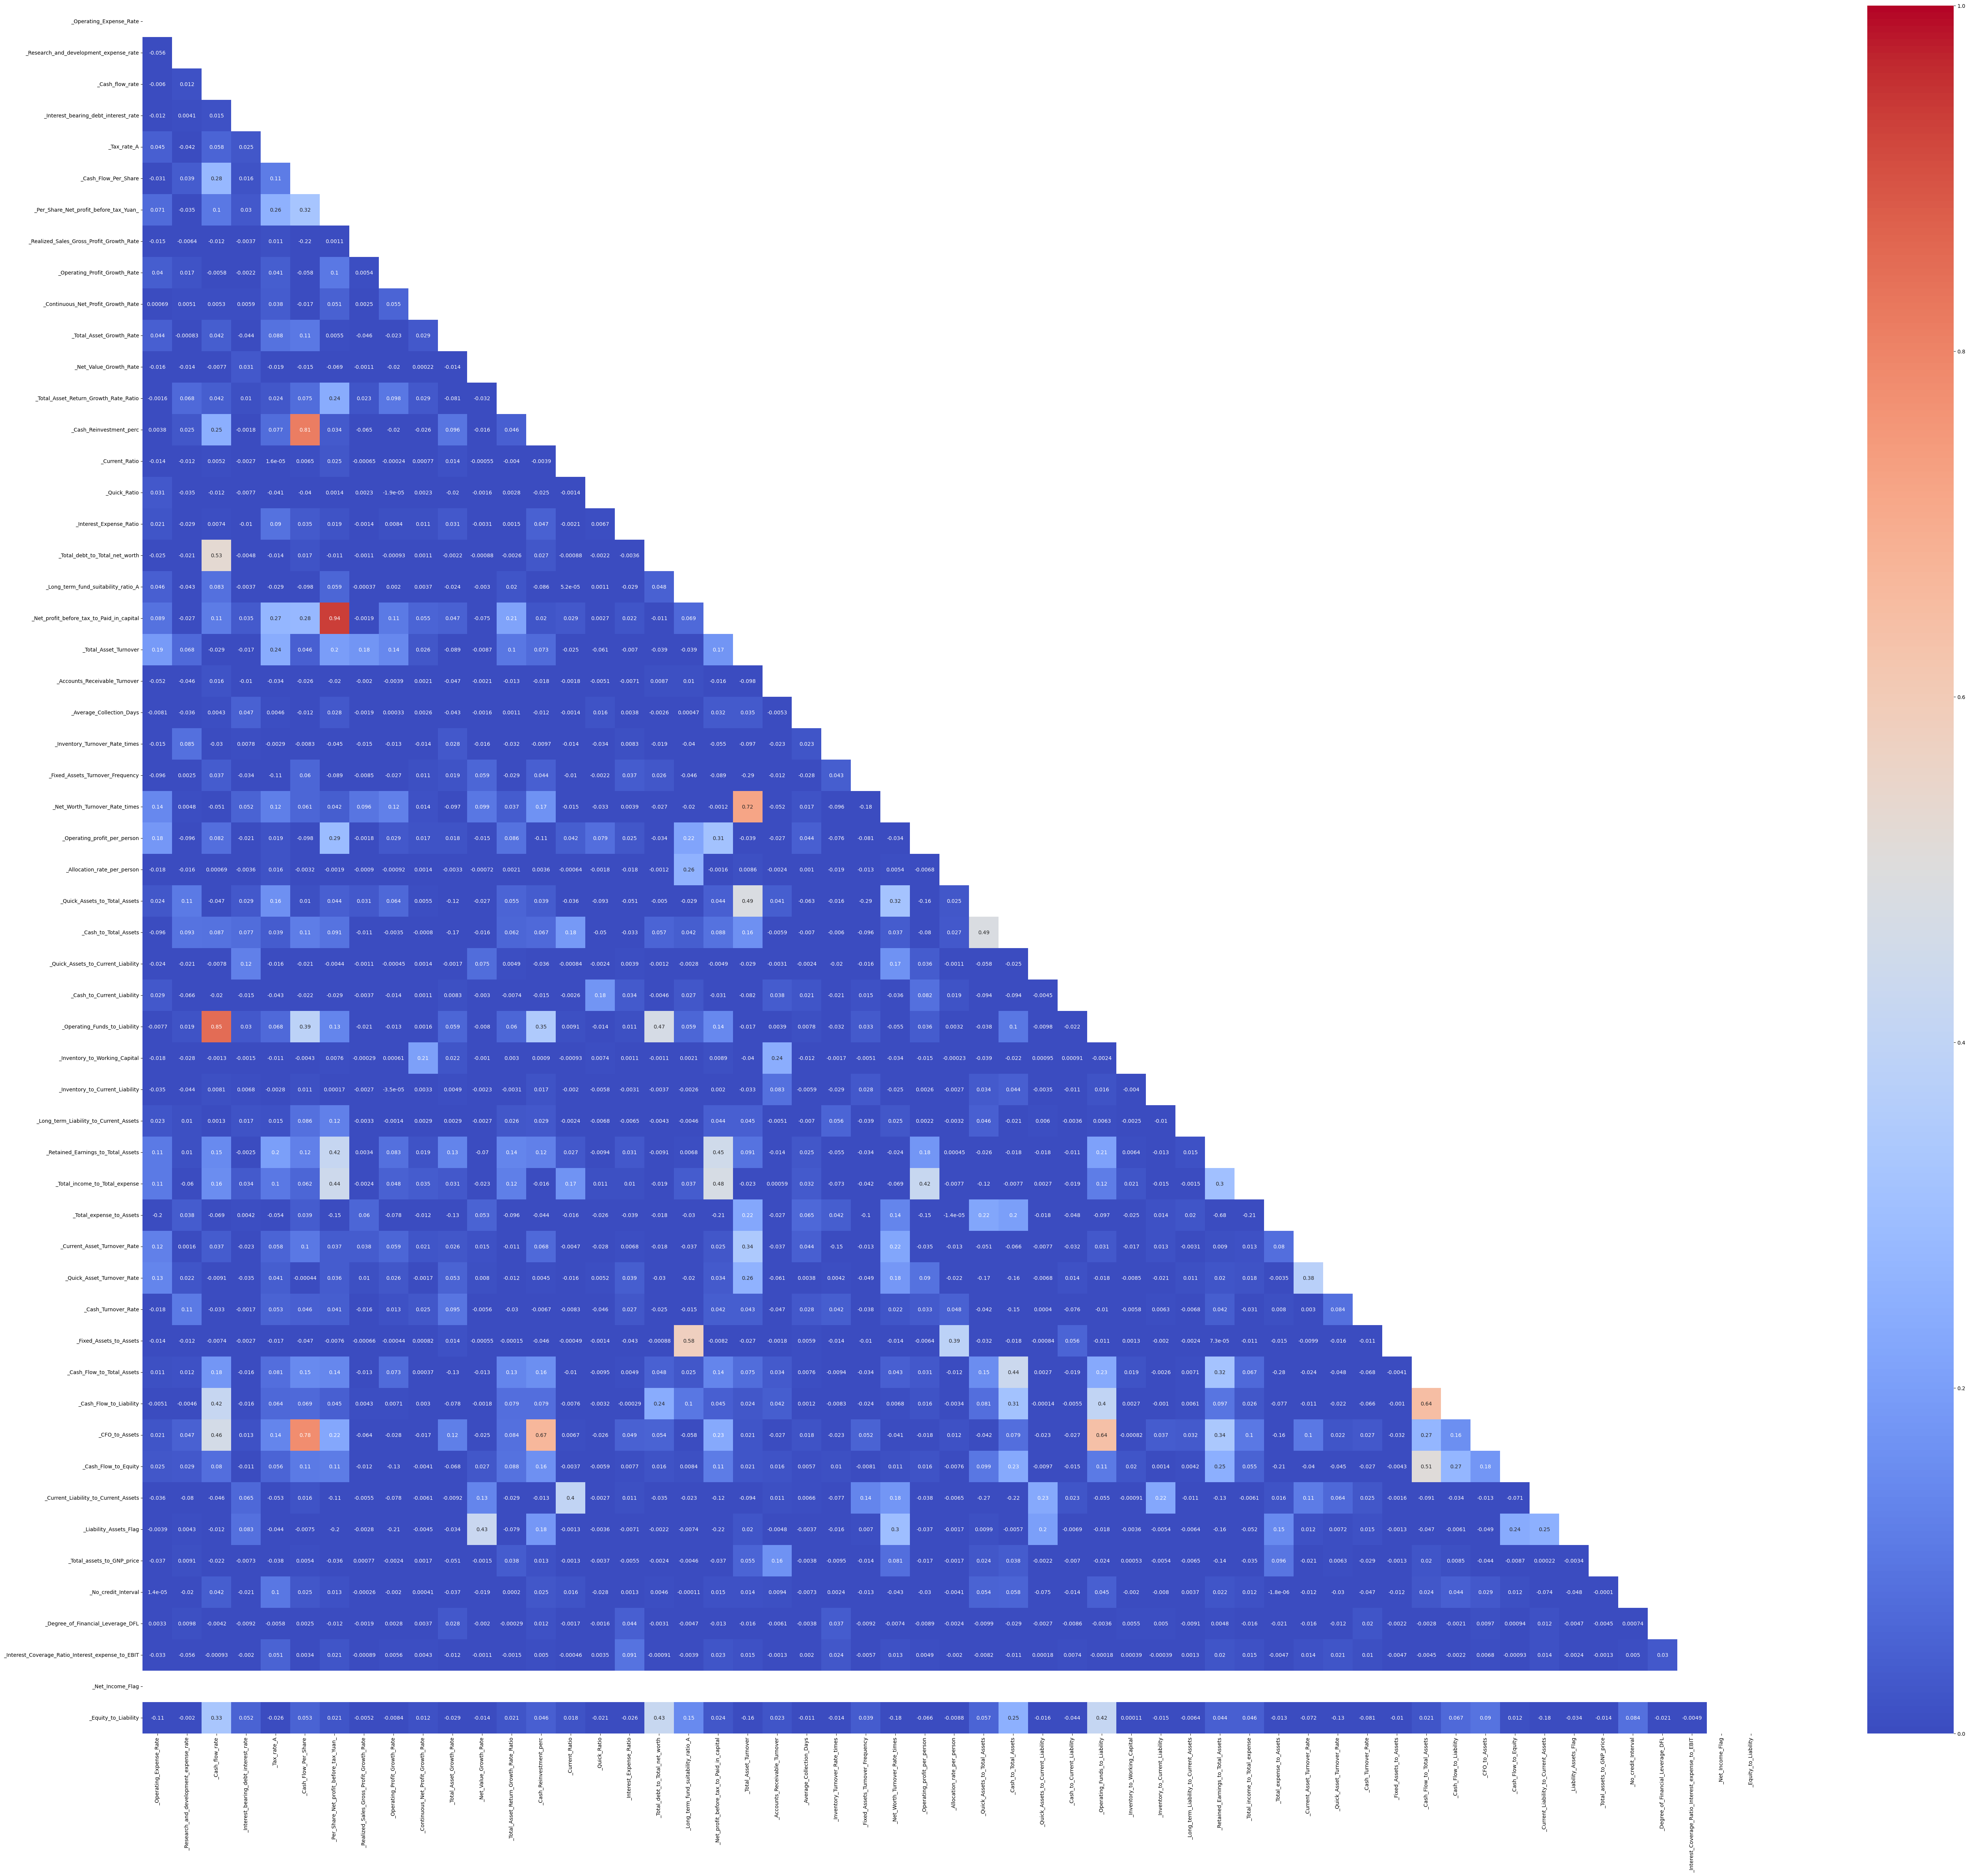

In [12]:
#correlation heatmap

plt.figure(figsize = (70,60))
sns.heatmap(Company_X.corr(), annot=True,mask=np.triu(Company_X.corr()),cmap ='coolwarm', vmin = 0, vmax= 1);

In [13]:
Company_X.corr().T

_Operating_Expense_Rate  \
_Operating_Expense_Rate                                               1.00   
_Research_and_development_expense_rate                               -0.06   
_Cash_flow_rate                                                      -0.01   
_Interest_bearing_debt_interest_rate                                 -0.01   
_Tax_rate_A                                                           0.05   
_Cash_Flow_Per_Share                                                 -0.03   
_Per_Share_Net_profit_before_tax_Yuan_                                0.07   
_Realized_Sales_Gross_Profit_Growth_Rate                             -0.02   
_Operating_Profit_Growth_Rate                                         0.04   
_Continuous_Net_Profit_Growth_Rate                                    0.00   
_Total_Asset_Growth_Rate                                              0.04   
_Net_Value_Growth_Rate                                               -0.02   
_Total_Asset_Return_Growth_Rate_Ratio                                -0.00   
_Cash_Reinvestment_perc                                               0.00   
_Current_Ratio                                                       -0.01   
_Quick_Ratio                                                          0.03   
_Interest_Expense_Ratio                                               0.02   
_Total_debt_to_Total_net_worth                                       -0.03   
_Long_term_fund_suitability_ratio_A                                   0.05   
_Net_profit_before_tax_to_Paid_in_capital                             0.09   
_Total_Asset_Turnover                                                 0.19   
_Accounts_Receivable_Turnover                                        -0.05   
_Average_Collection_Days                                             -0.01   
_Inventory_Turnover_Rate_times                                       -0.01   
_Fixed_Assets_Turnover_Frequency                                     -0.10   
_Net_Worth_Turnover_Rate_times                                        0.14   
_Operating_profit_per_person                                          0.18   
_Allocation_rate_per_person                                          -0.02   
_Quick_Assets_to_Total_Assets                                         0.02   
_Cash_to_Total_Assets                                                -0.10   
_Quick_Assets_to_Current_Liability                                   -0.02   
_Cash_to_Current_Liability                                            0.03   
_Operating_Funds_to_Liability                                        -0.01   
_Inventory_to_Working_Capital                                        -0.02   
_Inventory_to_Current_Liability                                      -0.03   
_Long_term_Liability_to_Current_Assets                                0.02   
_Retained_Earnings_to_Total_Assets                                    0.11   
_Total_income_to_Total_expense                                        0.11   
_Total_expense_to_Assets                                             -0.20   
_Current_Asset_Turnover_Rate                                          0.12   
_Quick_Asset_Turnover_Rate                                            0.13   
_Cash_Turnover_Rate                                                  -0.02   
_Fixed_Assets_to_Assets                                              -0.01   
_Cash_Flow_to_Total_Assets                                            0.01   
_Cash_Flow_to_Liability                                              -0.01   
_CFO_to_Assets                                                        0.02   
_Cash_Flow_to_Equity                                                  0.02   
_Current_Liability_to_Current_Assets                                 -0.04   
_Liability_Assets_Flag                                               -0.00   
_Total_assets_to_GNP_price                                           -0.04   
_No_credit_Interval                                                   0.0

## <a name ='link1'>**Q1**</a><br>
## Outlier Treatment<br>


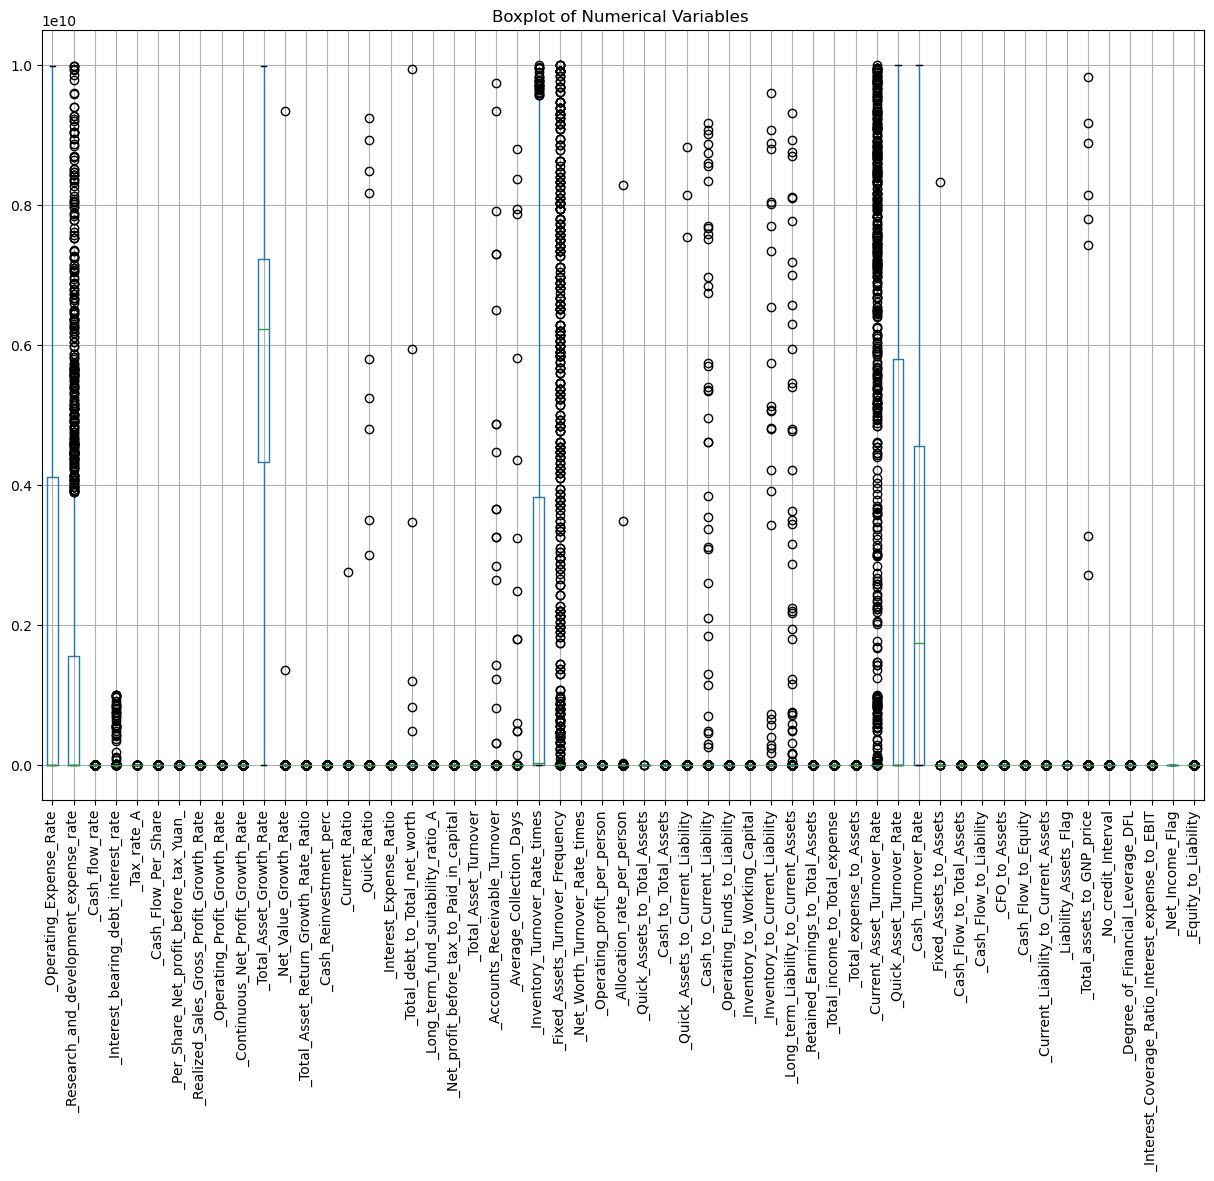

In [14]:
plt.figure(figsize=(15,10))
plt.title("Boxplot of Numerical Variables ")
Company_X.boxplot();
plt.xticks(rotation=90);

In [15]:
def treat_outlier(x):
    # taking 25,75 percentile of column
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)


In [16]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [17]:
((Company_X > UL) | (Company_X < LL)).sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate               264
_Cash_flow_rate                                      206
_Interest_bearing_debt_interest_rate                  94
_Tax_rate_A                                           42
_Cash_Flow_Per_Share                                 146
_Per_Share_Net_profit_before_tax_Yuan_               186
_Realized_Sales_Gross_Profit_Growth_Rate             283
_Operating_Profit_Growth_Rate                        317
_Continuous_Net_Profit_Growth_Rate                   340
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                               304
_Total_Asset_Return_Growth_Rate_Ratio                226
_Cash_Reinvestment_perc                              220
_Current_Ratio                                       193
_Quick_Ratio                                         190
_Interest_Expense_Ratio                              328
_Total_debt_to_Total_net_worth 

In [18]:
((Company_X > UL) | (Company_X < LL)).sum().sum()

10864

In [19]:
p=((((Company_X > UL) | (Company_X < LL)).sum()).sum())/Company_X.size*100
print("Proportion of Outliers is ",round(p,2),"%")

Proportion of Outliers is  9.6 %


In [20]:
## treating Outliers
for i in Company_X.columns:    
    Company_X[i]=treat_outlier(Company_X[i])

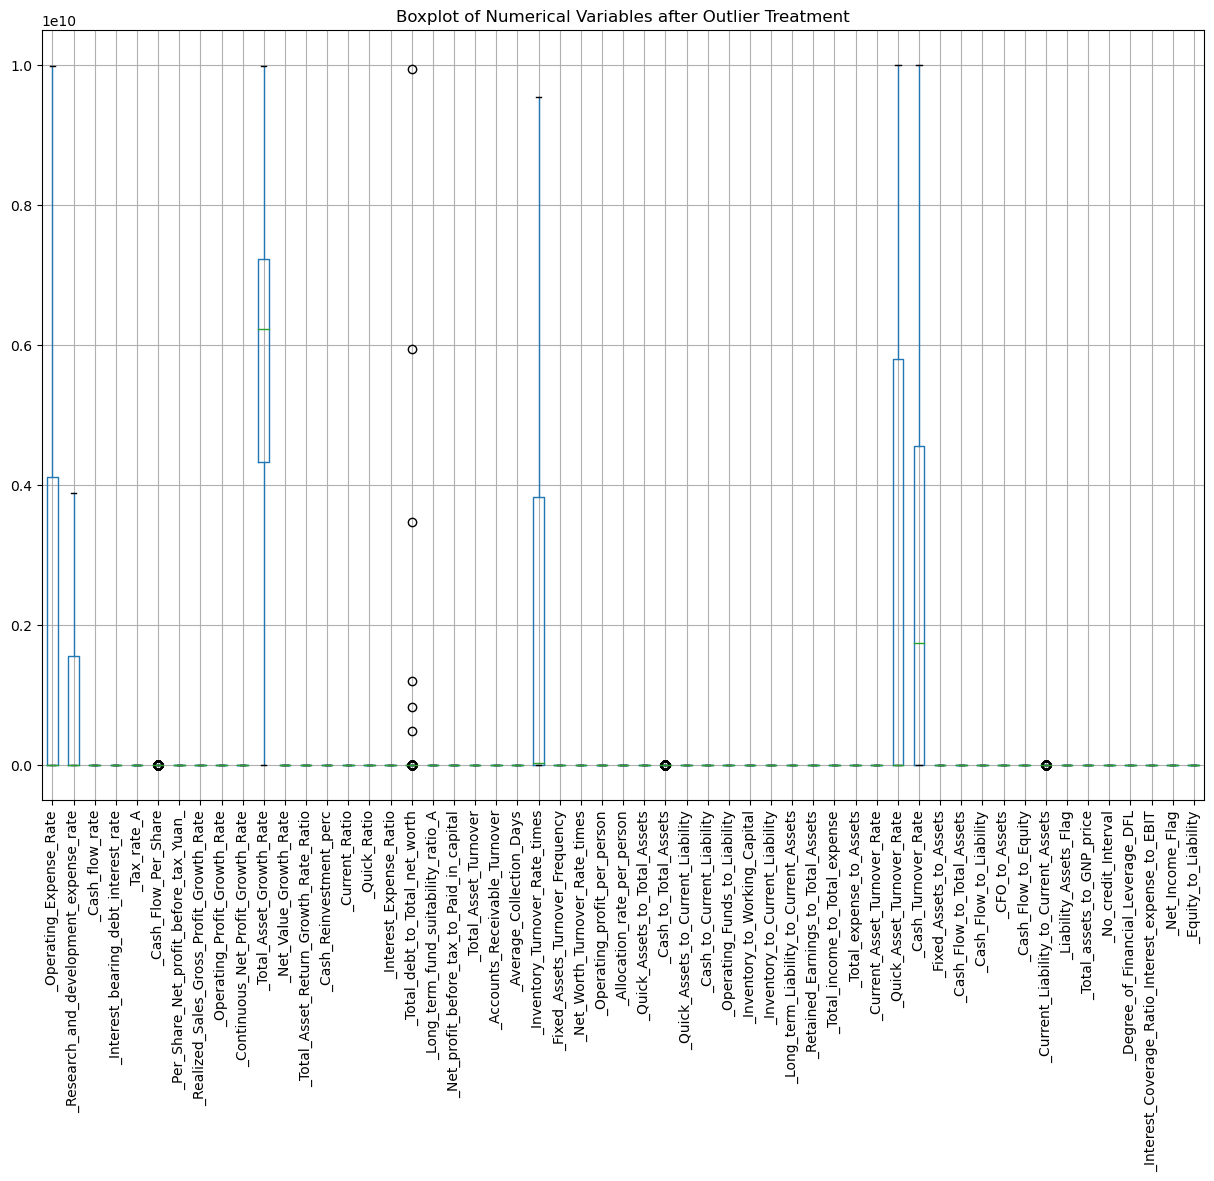

In [21]:
plt.figure(figsize=(15,10))
plt.title("Boxplot of Numerical Variables after Outlier Treatment")
Company_X.boxplot();
plt.xticks(rotation=90);


# <a name ='link4'>**Q4**</a><br>
 ## Train Test Split<br>

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(Company_X,Company_Y, test_size = 0.33,random_state=42, stratify = Company.Default)

In [23]:
X_train.shape

(1378, 55)

In [24]:
y_train.value_counts(normalize=True)

0   0.89
1   0.11
Name: Default, dtype: float64

In [25]:
y_test.value_counts(normalize=True)

0   0.89
1   0.11
Name: Default, dtype: float64

In [26]:
X_train

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
2011                     0.00                                    0.00   
697                      0.00                           1750000000.00   
160                      0.00                                    0.00   
1273            5960000000.00                           2870000000.00   
541                      0.00                            662000000.00   
...                       ...                                     ...   
1386            4260000000.00                                    0.00   
1127                     0.00                           1380000000.00   
950             5940000000.00                                    0.00   
1058                     0.00                           3875000000.00   
562                      0.00                            102000000.00   

      _Cash_flow_rate  _Interest_bearing_debt_interest_rate  _Tax_rate_A  \
2011             0.48                                  0.00         0.00   
697              0.47                                  0.00         0.32   
160              0.46                                  0.00         0.00   
1273             0.46                                  0.00         0.00   
541              0.46                                  0.00         0.00   
...               ...                                   ...          ...   
1386             0.47                                  0.00         0.25   
1127             0.46                                  0.00         0.22   
950              0.46                                  0.00         0.18   
1058             0.47                                  0.00         0.21   
562              0.46                                  0.00         0.00   

      _Cash_Flow_Per_Share  _Per_Share_Net_profit_before_tax_Yuan_  \
2011                  0.34                                    0.15   
697                    NaN                                    0.19   
160                   0.31                                    0.17   
1273                  0.32                                    0.17   
541                   0.32                                    0.16   
...                    ...                                     ...   
1386                  0.32                                    0.18   
1127                  0.32                                    0.20   
950                   0.32                                    0.18   
1058                  0.32                                    0.19   
562                   0.30                                    0.16   

      _Realized_Sales_Gross_Profit_Growth_Rate  _Operating_Profit_Growth_Rate  \
2011                                      0.02                           0.85   
697                                       0.02                           0.85   
160                                       0.02                           0.85   
1273                                      0.02                           0.85   
541                                       0.02                           0.85   
...                                        ...                            ...   
1386                                      0.02                           0.85   
1127                                      0.02                           0.85   
950                                       0.02                           0.85   
1058                                      0.02                           0.85   
562                                       0.02                           0.85   

      _Continuous_Net_Profit_Growth_Rate  ...  _CFO_to_Assets  \
2011                                0.22  ...            0.71   
697                                 0.22  ...            0.62   
160                                 0.22  ...            0.55   
1273                                0.22  ...            0.58   
541                                 0.22  ...            0.56   
...         

In [27]:
y_train

2011    0
697     0
160     0
1273    0
541     0
       ..
1386    1
1127    0
950     1
1058    0
562     0
Name: Default, Length: 1378, dtype: int64

In [28]:
X_test.shape

(680, 55)

In [29]:
y_train.shape

(1378,)

In [30]:
y_test.shape

(680,)

## Scaling the Predictors

In [31]:
from sklearn.preprocessing import StandardScaler #Scale train and test separately
scaler = StandardScaler()
scaled_predictors_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_predictors_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [32]:
y_train.reset_index(inplace=True, drop=True)

In [33]:
y_test.reset_index(inplace=True, drop=True)

In [34]:
# Concatinating the datasets as Stats Model will be used for model building
Company_scaled_train = pd.concat([scaled_predictors_train, y_train],axis=1)  
Company_scaled_test=pd.concat([scaled_predictors_test,y_test],axis=1)

## <a name ='link2'>**Q2**</a><br>
## Missing Value Treatment<br>


In [35]:
display(Company.isnull().sum()[Company.isna().sum()>0])




_Cash_Flow_Per_Share                    167
_Total_debt_to_Total_net_worth           21
_Cash_to_Total_Assets                    96
_Current_Liability_to_Current_Assets     14
dtype: int64

In [36]:
# Proportion of missing values
proportion_of_nulls=(Company.isnull().sum().sum())/(Company.size)*100

print("Nulls in the dataset is ", round(proportion_of_nulls,2),"%")

Nulls in the dataset is  0.25 %


#### Let's visually inspect the missing values in our data

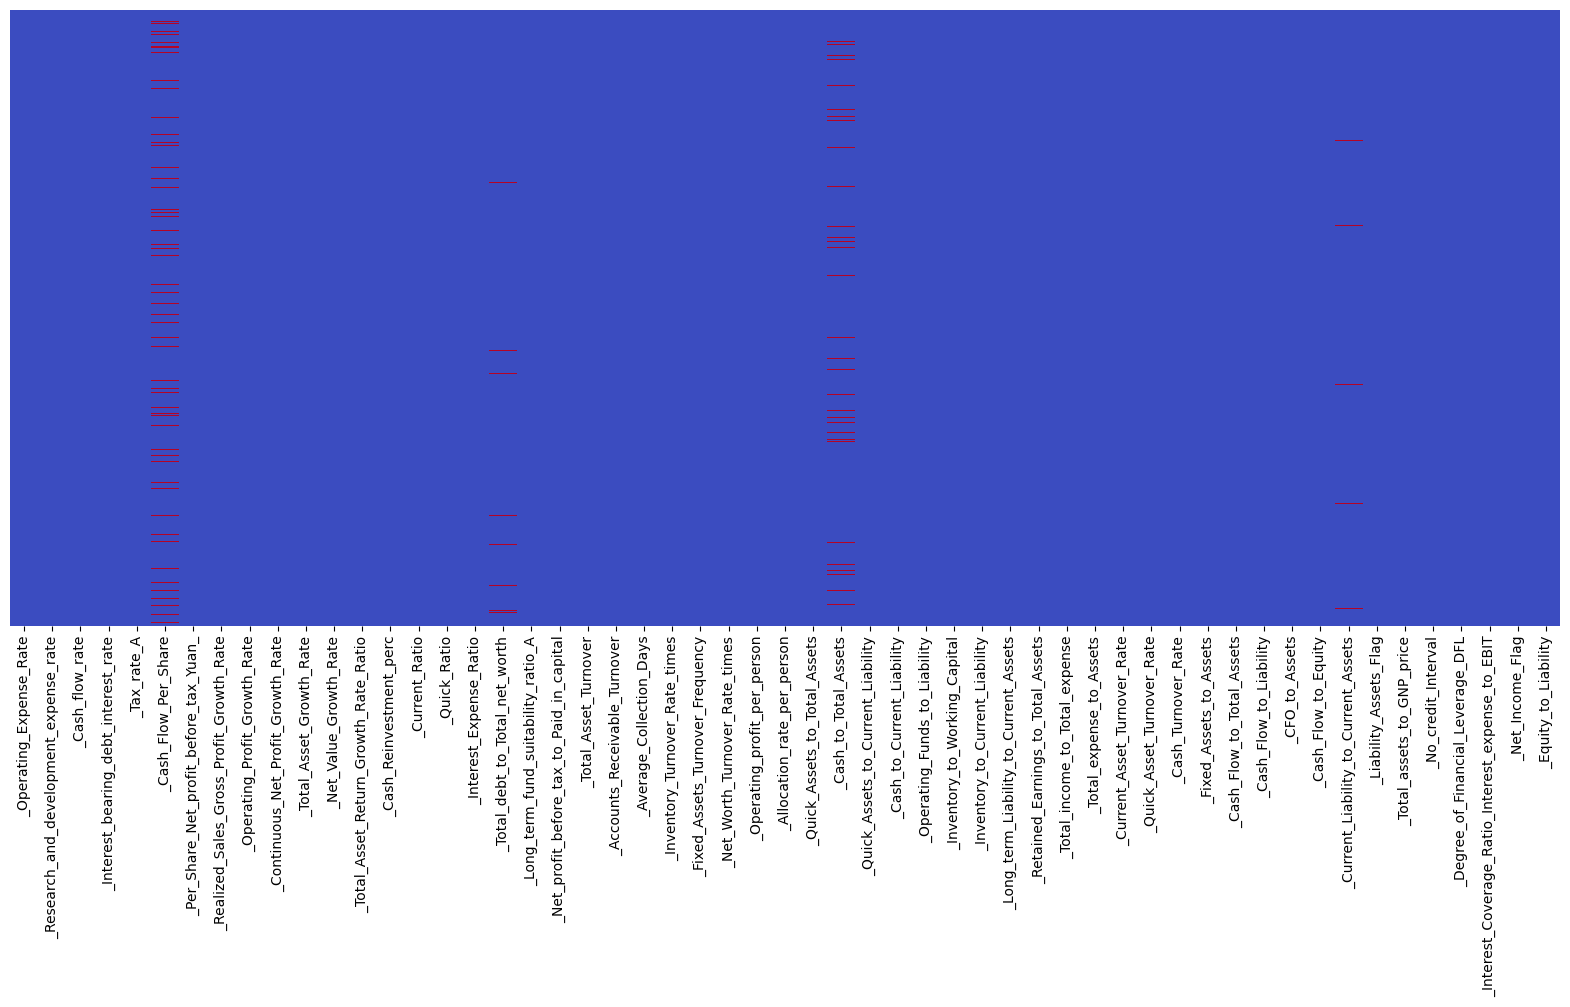

In [37]:
# Visualising missing values in  dataset before imputing
plt.figure(figsize = (20,8))
sns.heatmap(Company_X.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()


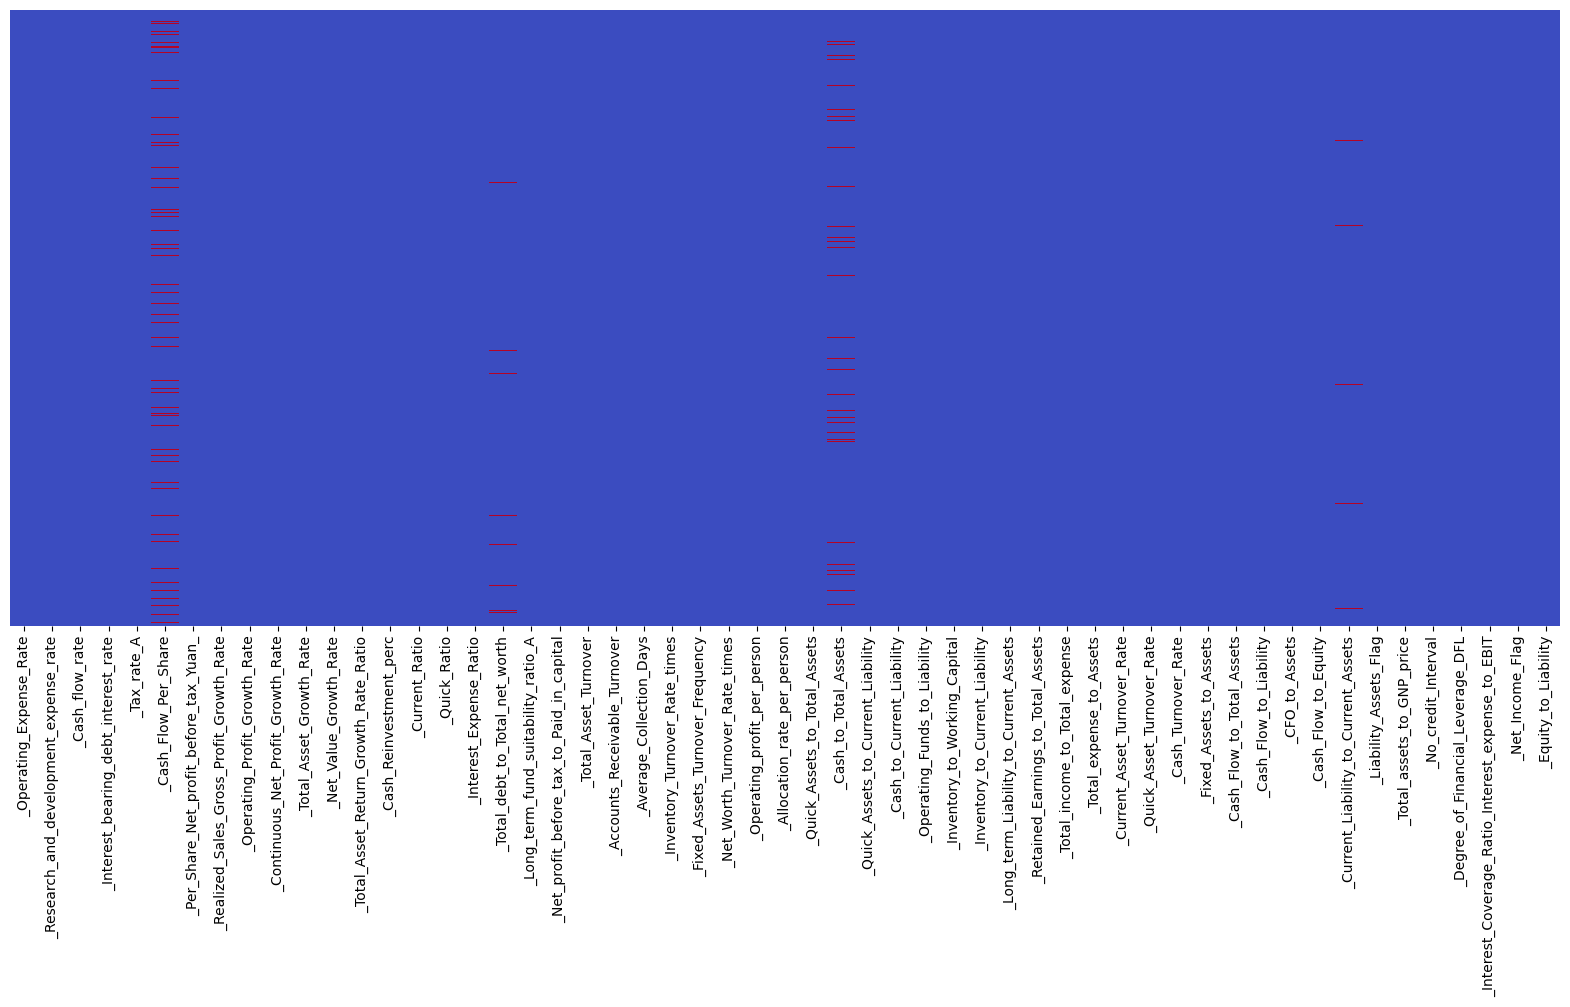

In [38]:
# Visualising missing values in  scaled dataset before imputing
plt.figure(figsize = (20,8))
sns.heatmap(Company_X.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [39]:
# IMPUTING THE MISSING VALUES

from sklearn.impute import KNNImputer

In [40]:
imputer = KNNImputer(n_neighbors=5)

In [41]:
Company_imputed_train = pd.DataFrame(imputer.fit_transform(Company_scaled_train), columns = Company_scaled_train.columns)
Company_imputed_test = pd.DataFrame(imputer.transform(Company_scaled_test), columns = Company_scaled_test.columns)

In [42]:
# Shape. of Trainng dataset
print('The number of rows in the dataset is ',Company_imputed_train.shape[0],'\n''The number of columns in the dataset  is',Company_imputed_train.shape[1])

The number of rows in the dataset is  1378 
The number of columns in the dataset  is 56


In [43]:
# Shape. of Testing dataset
print('The number of rows in the dataset is ',Company_imputed_test.shape[0],'\n''The number of columns in the dataset  is',Company_imputed_test.shape[1])

The number of rows in the dataset is  680 
The number of columns in the dataset  is 56


In [44]:
Company_imputed_train

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
0                       -0.64                                   -0.66   
1                       -0.64                                    0.54   
2                       -0.64                                   -0.66   
3                        1.18                                    1.31   
4                       -0.64                                   -0.20   
...                       ...                                     ...   
1373                     0.66                                   -0.66   
1374                    -0.64                                    0.29   
1375                     1.17                                   -0.66   
1376                    -0.64                                    1.99   
1377                    -0.64                                   -0.59   

      _Cash_flow_rate  _Interest_bearing_debt_interest_rate  _Tax_rate_A  \
0                2.09                                  1.75        -0.82   
1                0.25                                 -0.80         1.53   
2               -0.72                                  0.75        -0.82   
3               -0.26                                 -0.69        -0.82   
4               -0.52                                  0.30        -0.82   
...               ...                                   ...          ...   
1373             0.12                                 -1.13         1.03   
1374            -0.20                                 -0.18         0.79   
1375             0.00                                  1.00         0.53   
1376             0.66                                  0.32         0.78   
1377            -0.81                                  0.05        -0.82   

      _Cash_Flow_Per_Share  _Per_Share_Net_profit_before_tax_Yuan_  \
0                     1.10                                   -1.33   
1                     0.13                                    0.94   
2                    -0.35                                   -0.28   
3                     0.06                                   -0.55   
4                    -0.25                                   -0.65   
...                    ...                                     ...   
1373                  0.22                                    0.35   
1374                  0.18                                    1.38   
1375                  0.22                                    0.10   
1376                  0.10                                    0.48   
1377                 -1.56                                   -0.90   

      _Realized_Sales_Gross_Profit_Growth_Rate  _Operating_Profit_Growth_Rate  \
0                                        -0.78                          -0.43   
1                                        -0.49                          -0.38   
2                                        -1.09                          -0.89   
3                                        -0.59                          -0.62   
4                                        -0.80                          -1.08   
...                                        ...                            ...   
1373                                      1.07                           0.82   
1374                                      0.27                          -0.04   
1375                                     -0.20                          -0.16   
1376                                     -0.29                          -0.21   
1377                                     -1.62                          -1.04   

      _Continuous_Net_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                  -1.91  ...                 -0.02   
1                                  -0.29  ...                 -1.21   
2                                  -1.43  ...                  0.92   
3                                  -1.29  ...                 -1.94   
4                                  -1.91  ...  

In [45]:
Company_imputed_test

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
0                      -0.64                                    0.16   
1                      -0.64                                   -0.66   
2                      -0.64                                   -0.66   
3                      -0.64                                   -0.66   
4                       0.56                                   -0.66   
..                       ...                                     ...   
675                    -0.64                                   -0.66   
676                     2.30                                    1.42   
677                     1.21                                   -0.62   
678                     1.75                                   -0.66   
679                    -0.64                                   -0.66   

     _Cash_flow_rate  _Interest_bearing_debt_interest_rate  _Tax_rate_A  \
0               1.29                                  1.46         1.14   
1              -0.97                                 -0.50        -0.72   
2              -0.35                                 -1.61        -0.82   
3               2.09                                  0.96         1.35   
4              -0.39                                 -1.61         1.38   
..               ...                                   ...          ...   
675            -0.26                                  1.09        -0.82   
676             1.10                                  1.04        -0.82   
677             0.26                                 -0.60        -0.79   
678            -0.23                                 -0.88        -0.67   
679             0.37                                  1.17        -0.82   

     _Cash_Flow_Per_Share  _Per_Share_Net_profit_before_tax_Yuan_  \
0                    1.00                                    0.89   
1                   -1.19                                    0.55   
2                   -0.16                                   -0.50   
3                    0.79                                    0.84   
4                   -0.14                                    0.00   
..                    ...                                     ...   
675                  0.13                                   -0.34   
676                  0.64                                   -0.42   
677                 -0.01                                    0.31   
678                  0.35                                    1.49   
679                  0.67                                    0.21   

     _Realized_Sales_Gross_Profit_Growth_Rate  _Operating_Profit_Growth_Rate  \
0                                        1.05                           0.80   
1                                       -0.31                          -0.27   
2                                       -0.57                          -1.98   
3                                       -0.29                          -0.20   
4                                       -0.56                          -0.54   
..                                        ...                            ...   
675                                     -0.52                          -0.79   
676                                     -2.06                          -1.98   
677                                     -0.41                          -0.35   
678                                      0.23                           0.16   
679                                      1.93                           0.92   

     _Continuous_Net_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                  0.53  ...                  1.55   
1                                  0.23  ...                  0.76   
2                                 -0.06  ...                 -0.57   
3                                 -0.28  ...                  0.22   
4                                  0.08  ...                  0.46   
..                           

In [46]:
X_train = Company_imputed_train.drop('Default', axis = 1)
y_train = Company_imputed_train['Default']
X_test = Company_imputed_test.drop('Default', axis = 1)
y_test = Company_imputed_test['Default']

In [47]:
X_test

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
0                      -0.64                                    0.16   
1                      -0.64                                   -0.66   
2                      -0.64                                   -0.66   
3                      -0.64                                   -0.66   
4                       0.56                                   -0.66   
..                       ...                                     ...   
675                    -0.64                                   -0.66   
676                     2.30                                    1.42   
677                     1.21                                   -0.62   
678                     1.75                                   -0.66   
679                    -0.64                                   -0.66   

     _Cash_flow_rate  _Interest_bearing_debt_interest_rate  _Tax_rate_A  \
0               1.29                                  1.46         1.14   
1              -0.97                                 -0.50        -0.72   
2              -0.35                                 -1.61        -0.82   
3               2.09                                  0.96         1.35   
4              -0.39                                 -1.61         1.38   
..               ...                                   ...          ...   
675            -0.26                                  1.09        -0.82   
676             1.10                                  1.04        -0.82   
677             0.26                                 -0.60        -0.79   
678            -0.23                                 -0.88        -0.67   
679             0.37                                  1.17        -0.82   

     _Cash_Flow_Per_Share  _Per_Share_Net_profit_before_tax_Yuan_  \
0                    1.00                                    0.89   
1                   -1.19                                    0.55   
2                   -0.16                                   -0.50   
3                    0.79                                    0.84   
4                   -0.14                                    0.00   
..                    ...                                     ...   
675                  0.13                                   -0.34   
676                  0.64                                   -0.42   
677                 -0.01                                    0.31   
678                  0.35                                    1.49   
679                  0.67                                    0.21   

     _Realized_Sales_Gross_Profit_Growth_Rate  _Operating_Profit_Growth_Rate  \
0                                        1.05                           0.80   
1                                       -0.31                          -0.27   
2                                       -0.57                          -1.98   
3                                       -0.29                          -0.20   
4                                       -0.56                          -0.54   
..                                        ...                            ...   
675                                     -0.52                          -0.79   
676                                     -2.06                          -1.98   
677                                     -0.41                          -0.35   
678                                      0.23                           0.16   
679                                      1.93                           0.92   

     _Continuous_Net_Profit_Growth_Rate  ...  _CFO_to_Assets  \
0                                  0.53  ...            1.51   
1                                  0.23  ...           -1.55   
2                                 -0.06  ...           -0.27   
3                                 -0.28  ...            1.88   
4                                  0.08  ...           -0.26   
..                                  ...  ...             ...   
6

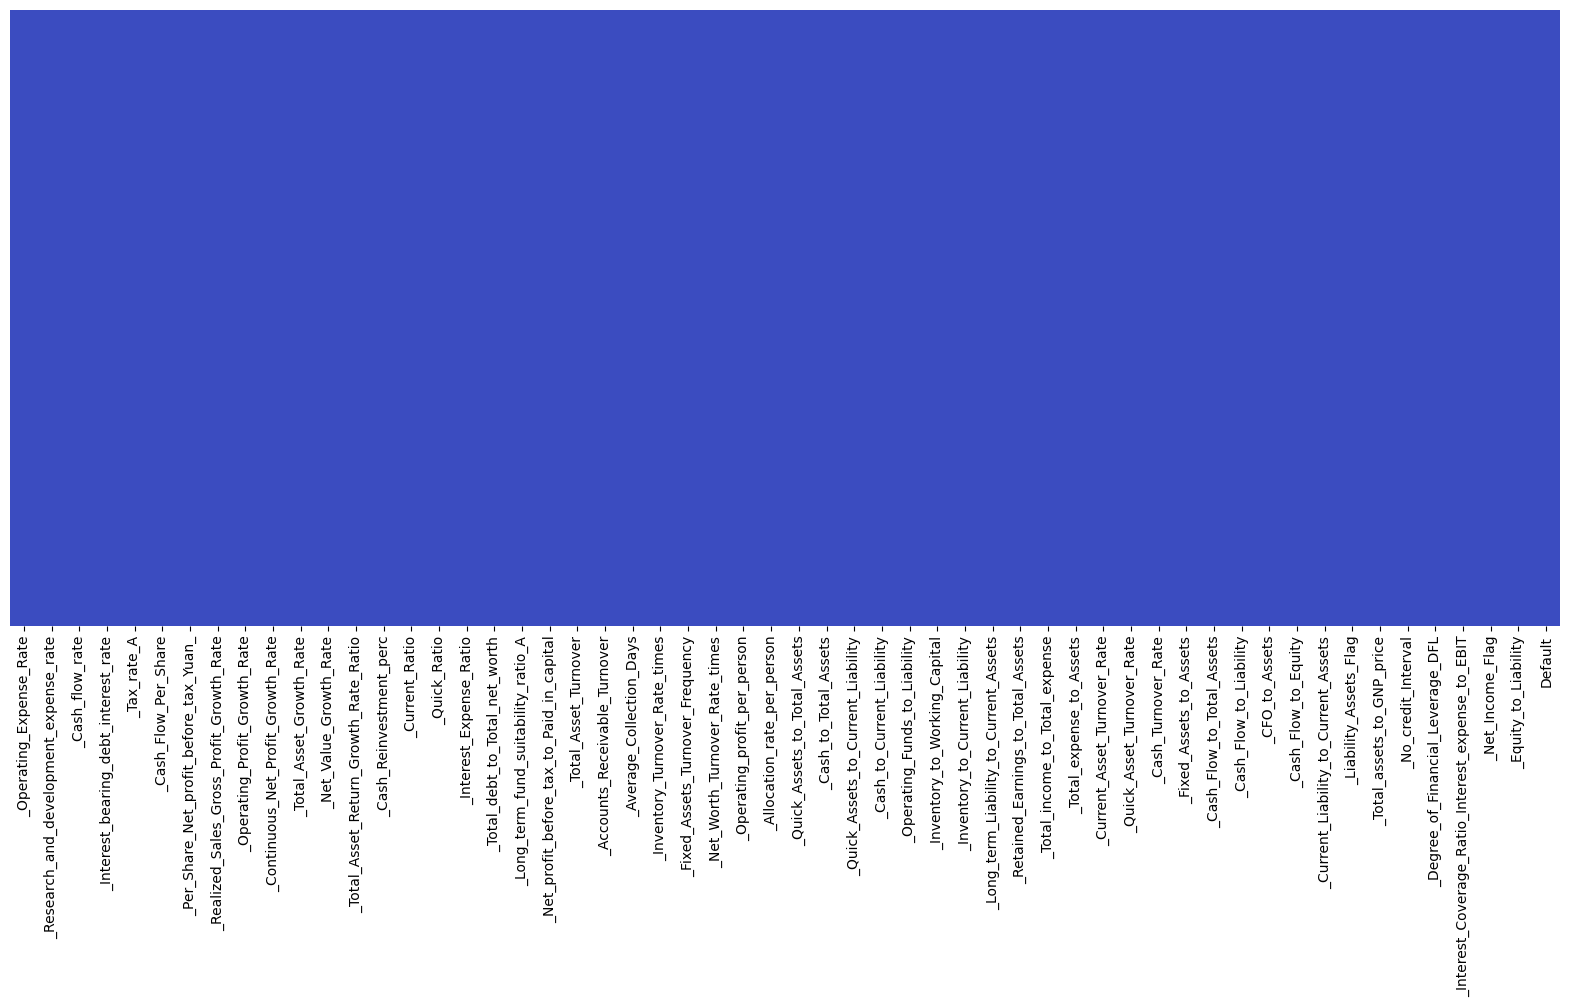

In [48]:
# Visualising missing values in Training dataset after imputing
plt.figure(figsize = (20,8))
sns.heatmap(Company_imputed_train.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

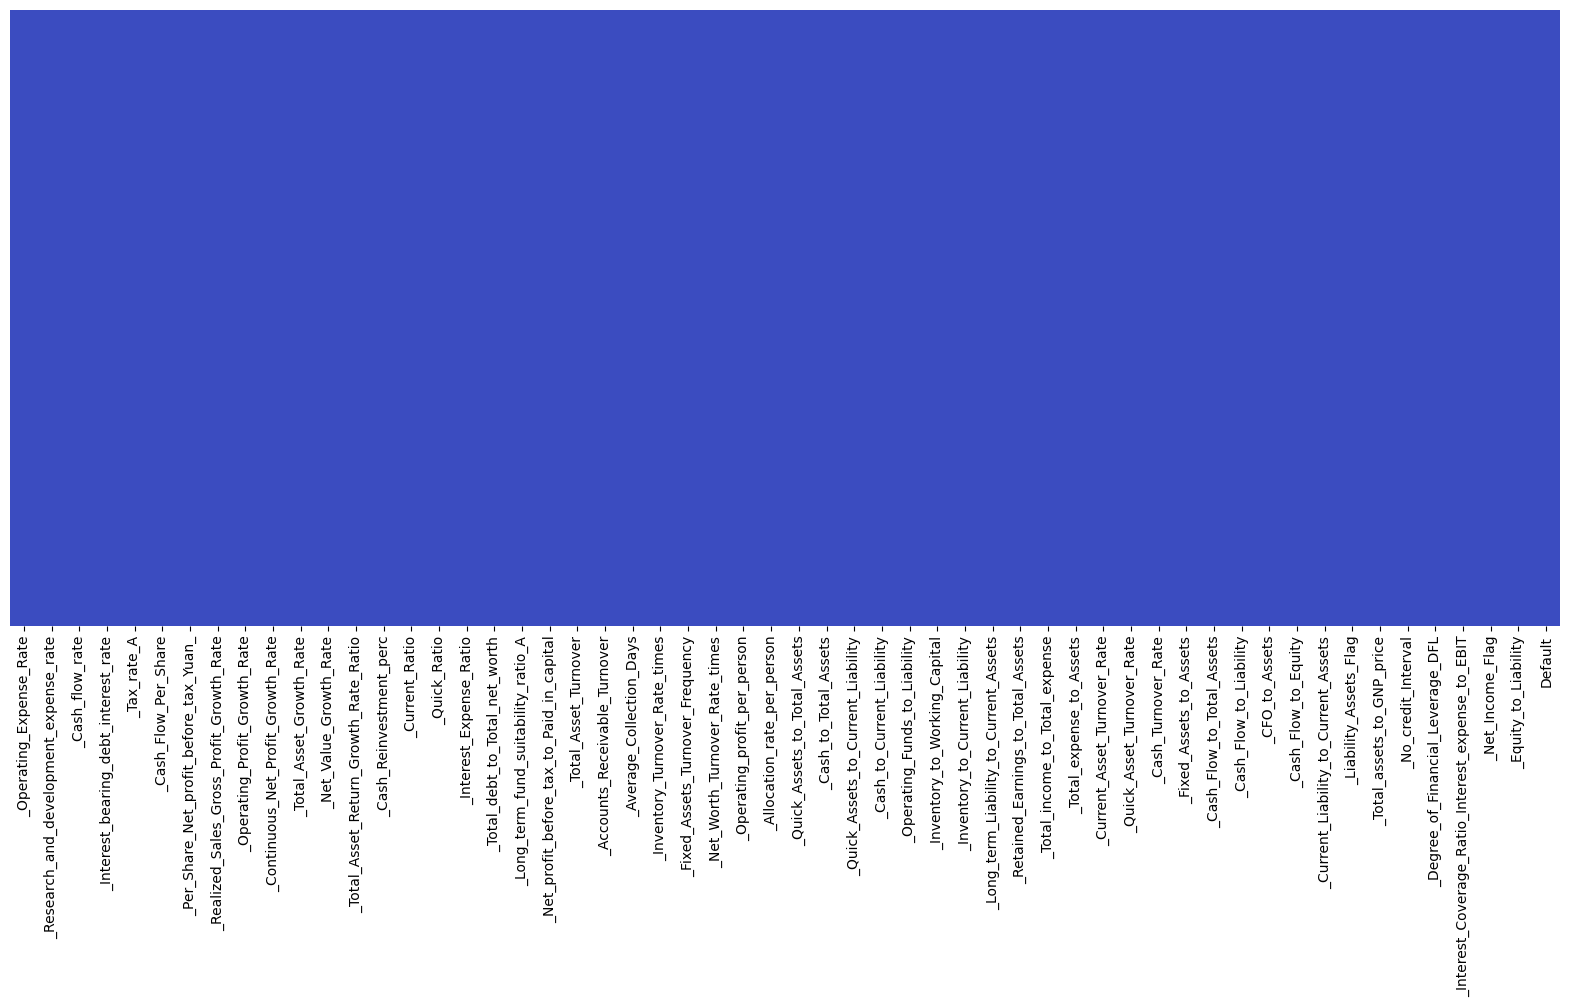

In [49]:
# Visualising missing values in Testing dataset after imputing
plt.figure(figsize = (20,8))
sns.heatmap(Company_imputed_test.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

## <a name ='link5'>**Q5**</a><br>
 Build Logistic Regression Model (using statsmodels library) on most important variables on train dataset and choose the optimum cut-off. Also showcase your model building approach.Validate the Model on Test Dataset and state the performance metrics. Also state interpretation from the model<br>

## Model building using Logistic Regression using Stats Model library

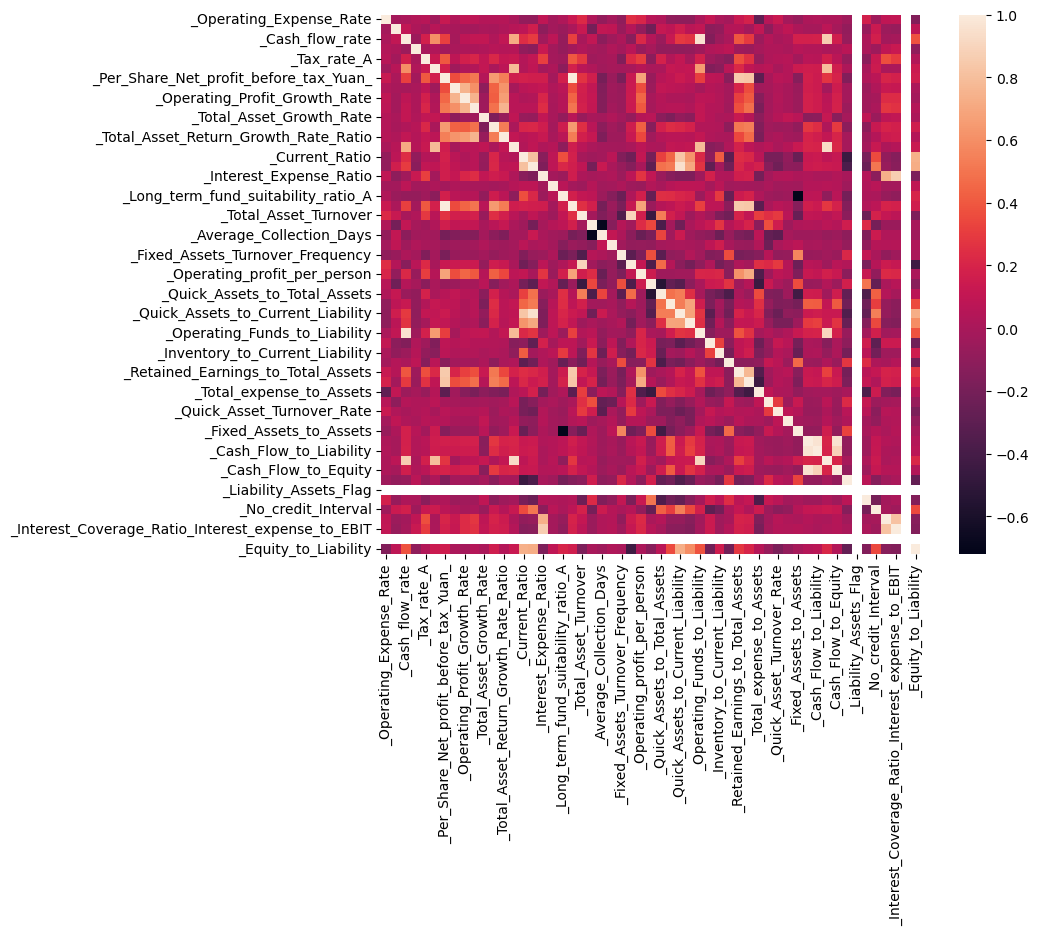

In [50]:
# Calculate col correlations and make a sns heatmap before standardisation

plt.figure(figsize=(10,7))
sns.heatmap(Company_X.corr(),annot=False,square=True);

In [51]:
import statsmodels.formula.api as SM

### Model-1
This will describe the response (Default) using all the independent variables

### VIF

Variance Inflation Factor (VIF) is a measure to detect multicollinearity in regression models.   

>VIF > 5 is not suitable as it is mostly compensated by other IVs.   
Hence we use VIF to clean the data of redundent vars.

In [52]:
# Checking VARIANCE INFLATION FOCTOR in Predictors for adressing Multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    #calculating VIF
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i)for i in range (X.shape[1])]
    return(vif)


In [53]:
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

variables   VIF
19          _Net_profit_before_tax_to_Paid_in_capital 82.18
6              _Per_Share_Net_profit_before_tax_Yuan_ 82.00
43                         _Cash_Flow_to_Total_Assets 67.11
45                                     _CFO_to_Assets 31.90
30                 _Quick_Assets_to_Current_Liability 23.71
44                            _Cash_Flow_to_Liability 22.84
46                               _Cash_Flow_to_Equity 22.67
32                      _Operating_Funds_to_Liability 22.01
2                                     _Cash_flow_rate 16.55
13                            _Cash_Reinvestment_perc 13.67
14                                     _Current_Ratio 12.43
15                                       _Quick_Ratio 11.76
20                              _Total_Asset_Turnover 11.20
25                     _Net_Worth_Turnover_Rate_times 10.92
28                      _Quick_Assets_to_Total_Assets  6.88
52  _Interest_Coverage_Ratio_Interest_expense_to_EBIT  6.42
36                 _Retained_Earnings_to_Total_Assets  5.46
54                               _Equity_to_Liability  5.40
42                            _Fixed_Assets_to_Assets  5.20
37                     _Total_income_to_Total_expense  5.11
16                            _Interest_Expense_Ratio  4.62
51                  _Degree_of_Financial_Leverage_DFL  4.09
8                       _Operating_Profit_Growth_Rate  3.81
9                  _Continuous_Net_Profit_Growth_Rate  3.61
31                         _Cash_to_Current_Liability  3.48
12              _Total_Asset_Return_Growth_Rate_Ratio  3.47
34                    _Inventory_to_Current_Liability  3.35
5                                _Cash_Flow_Per_Share  3.34
26                       _Operating_profit_per_person  3.25
29                              _Cash_to_Total_Assets  3.02
27                        _Allocation_rate_per_person  2.99
7            _Realized_Sales_Gross_Profit_Growth_Rate  2.95
18                _Long_term_fund_suitability_ratio_A  2.95
21                      _Accounts_Receivable_Turnover  2.88
22                           _Average_Collection_Days  2.81
11                             _Net_Value_Growth_Rate  2.65
38                           _Total_expense_to_Assets  2.31
24                   _Fixed_Assets_Turnover_Frequency  2.00
47               _Current_Liability_to_Current_Assets  1.94
35             _Long_term_Liability_to_Current_Assets  1.84
49                         _Total_assets_to_GNP_price  1.79
50                                _No_credit_Interval  1.73
39                       _Current_Asset_Turnover_Rate  1.66
4                                         _Tax_rate_A  1.65
33                      _Inventory_to_Working_Capital  1.49
40                         _Quick_Asset_Turnover_Rate  1.43
0                             _Operating_Expense_Rate  1.37
23                     _Inventory_Turnover_Rate_times  1.24
1              _Research_and_development_expense_rate  1.21
10                           _Total_Asset_Growth_Rate  1.20
3                _Interest_bearing_debt_interest_rate  1.13
41                                _Cash_Turnover_Rate  1.11
17                     _Total_debt_to_Total_net_worth  1.09
48                             _Liability_Assets_Flag   NaN
53                                   _Net_Income_Flag   NaN

In [54]:
# Elimiating all variables with VIF >5
while(calc_vif(X_train).sort_values(by = 'VIF',ascending = False).iloc[0]['VIF']>5):
    X_train = X_train.drop(calc_vif(X_train).sort_values(by = 'VIF',ascending = False).iloc[0][0], axis=1)
    

In [55]:
X_train

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
0                       -0.64                                   -0.66   
1                       -0.64                                    0.54   
2                       -0.64                                   -0.66   
3                        1.18                                    1.31   
4                       -0.64                                   -0.20   
...                       ...                                     ...   
1373                     0.66                                   -0.66   
1374                    -0.64                                    0.29   
1375                     1.17                                   -0.66   
1376                    -0.64                                    1.99   
1377                    -0.64                                   -0.59   

      _Cash_flow_rate  _Interest_bearing_debt_interest_rate  _Tax_rate_A  \
0                2.09                                  1.75        -0.82   
1                0.25                                 -0.80         1.53   
2               -0.72                                  0.75        -0.82   
3               -0.26                                 -0.69        -0.82   
4               -0.52                                  0.30        -0.82   
...               ...                                   ...          ...   
1373             0.12                                 -1.13         1.03   
1374            -0.20                                 -0.18         0.79   
1375             0.00                                  1.00         0.53   
1376             0.66                                  0.32         0.78   
1377            -0.81                                  0.05        -0.82   

      _Cash_Flow_Per_Share  _Realized_Sales_Gross_Profit_Growth_Rate  \
0                     1.10                                     -0.78   
1                     0.13                                     -0.49   
2                    -0.35                                     -1.09   
3                     0.06                                     -0.59   
4                    -0.25                                     -0.80   
...                    ...                                       ...   
1373                  0.22                                      1.07   
1374                  0.18                                      0.27   
1375                  0.22                                     -0.20   
1376                  0.10                                     -0.29   
1377                 -1.56                                     -1.62   

      _Operating_Profit_Growth_Rate  _Continuous_Net_Profit_Growth_Rate  \
0                             -0.43                               -1.91   
1                             -0.38                               -0.29   
2                             -0.89                               -1.43   
3                             -0.62                               -1.29   
4                             -1.08                               -1.91   
...                             ...                                 ...   
1373                           0.82                                0.48   
1374                          -0.04                                0.03   
1375                          -0.16                                0.09   
1376                          -0.21                               -0.00   
1377                          -1.04                               -1.17   

      _Total_Asset_Growth_Rate  ...  _Cash_Turnover_Rate  \
0                        -0.27  ...                -0.77   
1                         0.16  ...                 1.26   
2                         0.52  ...                -0.95   
3                         0.11  ...                 0.01   
4                         0.54  ...                -0.77   
...                        ...  ...                  ...   
1373                      0.46

In [56]:
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

variables  VIF
35                   _Fixed_Assets_to_Assets 4.76
12                   _Cash_Reinvestment_perc 4.26
30            _Total_income_to_Total_expense 4.20
13                              _Quick_Ratio 3.98
43                      _Equity_to_Liability 3.83
7              _Operating_Profit_Growth_Rate 3.76
2                            _Cash_flow_rate 3.72
29        _Retained_Earnings_to_Total_Assets 3.62
8         _Continuous_Net_Profit_Growth_Rate 3.56
25                _Cash_to_Current_Liability 3.21
11     _Total_Asset_Return_Growth_Rate_Ratio 3.18
22              _Operating_profit_per_person 3.12
5                       _Cash_Flow_Per_Share 3.04
6   _Realized_Sales_Gross_Profit_Growth_Rate 2.92
23               _Allocation_rate_per_person 2.90
16       _Long_term_fund_suitability_ratio_A 2.84
17             _Accounts_Receivable_Turnover 2.78
21            _Net_Worth_Turnover_Rate_times 2.76
14                   _Interest_Expense_Ratio 2.76
41         _Degree_of_Financial_Leverage_DFL 2.72
24                     _Cash_to_Total_Assets 2.52
18                  _Average_Collection_Days 2.46
10                    _Net_Value_Growth_Rate 2.41
31                  _Total_expense_to_Assets 2.23
20          _Fixed_Assets_Turnover_Frequency 1.97
39                _Total_assets_to_GNP_price 1.74
37      _Current_Liability_to_Current_Assets 1.67
27           _Inventory_to_Current_Liability 1.67
28    _Long_term_Liability_to_Current_Assets 1.66
40                       _No_credit_Interval 1.55
32              _Current_Asset_Turnover_Rate 1.52
4                                _Tax_rate_A 1.49
26             _Inventory_to_Working_Capital 1.46
36                   _Cash_Flow_to_Liability 1.41
33                _Quick_Asset_Turnover_Rate 1.37
0                    _Operating_Expense_Rate 1.36
19            _Inventory_Turnover_Rate_times 1.24
1     _Research_and_development_expense_rate 1.18
9                   _Total_Asset_Growth_Rate 1.17
3       _Interest_bearing_debt_interest_rate 1.10
34                       _Cash_Turnover_Rate 1.10
15            _Total_debt_to_Total_net_worth 1.07
38                    _Liability_Assets_Flag  NaN
42                          _Net_Income_Flag  NaN

In [57]:
X_train.describe().T

count  mean  std   min   25%   50%  \
_Operating_Expense_Rate                  1378.00  0.00 1.00 -0.64 -0.64 -0.64   
_Research_and_development_expense_rate   1378.00  0.00 1.00 -0.66 -0.66 -0.66   
_Cash_flow_rate                          1378.00 -0.00 1.00 -2.18 -0.58 -0.13   
_Interest_bearing_debt_interest_rate     1378.00  0.00 1.00 -1.61 -0.70 -0.11   
_Tax_rate_A                              1378.00 -0.00 1.00 -0.82 -0.82 -0.53   
_Cash_Flow_Per_Share                     1378.00  0.00 0.97 -7.09 -0.32  0.05   
_Realized_Sales_Gross_Profit_Growth_Rate 1378.00 -0.00 1.00 -2.06 -0.56 -0.11   
_Operating_Profit_Growth_Rate            1378.00 -0.00 1.00 -1.98 -0.49 -0.08   
_Continuous_Net_Profit_Growth_Rate       1378.00 -0.00 1.00 -1.91 -0.44 -0.01   
_Total_Asset_Growth_Rate                 1378.00  0.00 1.00 -1.76 -0.44  0.33   
_Net_Value_Growth_Rate                   1378.00  0.00 1.00 -1.96 -0.51 -0.15   
_Total_Asset_Return_Growth_Rate_Ratio    1378.00  0.00 1.00 -2.08 -0.53 -0.02   
_Cash_Reinvestment_perc                  1378.00  0.00 1.00 -2.08 -0.48  0.07   
_Quick_Ratio                             1378.00 -0.00 1.00 -1.34 -0.72 -0.27   
_Interest_Expense_Ratio                  1378.00  0.00 1.00 -1.86 -0.43 -0.28   
_Total_debt_to_Total_net_worth           1378.00 -0.00 0.99 -0.04 -0.04 -0.04   
_Long_term_fund_suitability_ratio_A      1378.00  0.00 1.00 -1.36 -0.74 -0.41   
_Accounts_Receivable_Turnover            1378.00 -0.00 1.00 -1.46 -0.72 -0.39   
_Average_Collection_Days                 1378.00 -0.00 1.00 -1.65 -0.72 -0.10   
_Inventory_Turnover_Rate_times           1378.00 -0.00 1.00 -0.66 -0.66 -0.65   
_Fixed_Assets_Turnover_Frequency         1378.00  0.00 1.00 -0.67 -0.64 -0.60   
_Net_Worth_Turnover_Rate_times           1378.00  0.00 1.00 -1.36 -0.75 -0.32   
_Operating_profit_per_person             1378.00 -0.00 1.00 -1.96 -0.49 -0.12   
_Allocation_rate_per_person              1378.00 -0.00 1.00 -1.02 -0.74 -0.40   
_Cash_to_Total_Assets                    1378.00 -0.01 0.99 -0.81 -0.59 -0.35   
_Cash_to_Current_Liability               1378.00  0.00 1.00 -0.92 -0.74 -0.45   
_Inventory_to_Working_Capital            1378.00 -0.00 1.00 -2.20 -0.59 -0.23   
_Inventory_to_Current_Liability          1378.00  0.00 1.00 -1.12 -0.77 -0.29   
_Long_term_Liability_to_Current_Assets   1378.00  0.00 1.00 -0.77 -0.77 -0.49   
_Retained_Earnings_to_Total_Assets       1378.00 -0.00 1.00 -2.02 -0.46  0.14   
_Total_income_to_Total_expense           1378.00 -0.00 1.00 -2.27 -0.60 -0.09   
_Total_expense_to_Assets                 1378.00 -0.00 1.00 -1.34 -0.75 -0.29   
_Current_Asset_Turnover_Rate             1378.00  0.00 1.00 -0.71 -0.67 -0.59   
_Quick_Asset_Turnover_Rate               1378.00 -0.00 1.00 -0.75 -0.75 -0.75   
_Cash_Turnover_Rate                      1378.00  0.00 1.00 -0.95 -0.95 -0.33   
_Fixed_Assets_to_Assets                  1378.00  0.00 1.00 -1.26 -0.81 -0.26   
_Cash_Flow_to_Liability                  1378.00  0.00 1.00 -1.81 -0.46 -0.05   
_Current_Liability_to_Current_Assets     1378.00 -0.00 1.00 -0.93 -0.41 -0.15   
_Liability_Assets_Flag                   1378.00  0.00 0.00  0.00  0.00  0.00   
_Total_assets_to_GNP_price               1378.00  0.00 1.00 -0.93 -0.75 -0.45   
_No_credit_Interval                      1378.00 -0.00 1.00 -1.83 -0.37  0.13   
_Degree_of_Financial_Leverage_DFL        1378.00  0.00 1.00 -1.79 -0.42 -0.30   
_Net_Income_Flag                         1378.00  0.00 0.00  0.00  0.00  0.00   
_Equity_to_Liability                     1378.00 -0.00 1.00 -1.61 -0.75 -0.34   

                                           75%   max  
_Operating_Expense_Rate                   0.64  2.40  
_Research_and_development_expense_rate    0.51  1.99  
_Cash_flow_rate                           0.48  2.09  
_Interest_bearing_debt_interest_rate      0.61  2.58  
_Tax_rate_A                               0.78  3.21  
_Cash_Flow_Per_Share                      0.39  9.53  
_Realized_Sa

In [58]:
#Dropping other columns having only one type of values and hence not significant 

X_train=X_train.drop(['_Liability_Assets_Flag','_Net_Income_Flag'],axis=1)

In [59]:
X_train

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
0                       -0.64                                   -0.66   
1                       -0.64                                    0.54   
2                       -0.64                                   -0.66   
3                        1.18                                    1.31   
4                       -0.64                                   -0.20   
...                       ...                                     ...   
1373                     0.66                                   -0.66   
1374                    -0.64                                    0.29   
1375                     1.17                                   -0.66   
1376                    -0.64                                    1.99   
1377                    -0.64                                   -0.59   

      _Cash_flow_rate  _Interest_bearing_debt_interest_rate  _Tax_rate_A  \
0                2.09                                  1.75        -0.82   
1                0.25                                 -0.80         1.53   
2               -0.72                                  0.75        -0.82   
3               -0.26                                 -0.69        -0.82   
4               -0.52                                  0.30        -0.82   
...               ...                                   ...          ...   
1373             0.12                                 -1.13         1.03   
1374            -0.20                                 -0.18         0.79   
1375             0.00                                  1.00         0.53   
1376             0.66                                  0.32         0.78   
1377            -0.81                                  0.05        -0.82   

      _Cash_Flow_Per_Share  _Realized_Sales_Gross_Profit_Growth_Rate  \
0                     1.10                                     -0.78   
1                     0.13                                     -0.49   
2                    -0.35                                     -1.09   
3                     0.06                                     -0.59   
4                    -0.25                                     -0.80   
...                    ...                                       ...   
1373                  0.22                                      1.07   
1374                  0.18                                      0.27   
1375                  0.22                                     -0.20   
1376                  0.10                                     -0.29   
1377                 -1.56                                     -1.62   

      _Operating_Profit_Growth_Rate  _Continuous_Net_Profit_Growth_Rate  \
0                             -0.43                               -1.91   
1                             -0.38                               -0.29   
2                             -0.89                               -1.43   
3                             -0.62                               -1.29   
4                             -1.08                               -1.91   
...                             ...                                 ...   
1373                           0.82                                0.48   
1374                          -0.04                                0.03   
1375                          -0.16                                0.09   
1376                          -0.21                               -0.00   
1377                          -1.04                               -1.17   

      _Total_Asset_Growth_Rate  ...  _Current_Asset_Turnover_Rate  \
0                        -0.27  ...                         -0.48   
1                         0.16  ...                         -0.68   
2                         0.52  ...                         -0.61   
3                         0.11  ...                          1.79   
4                         0.54  ...                         -0.65   
...                        ...  ... 

## MODELING

### Base model using Linear Regression

In [60]:
# Bringing together X and y as its required for the Statsmodel
train_XY = pd.concat([X_train,y_train], axis=1)
test_XY = pd.concat([X_test,y_test], axis=1)

In [61]:
X_train.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Cash_to_Total_Assets',
       '_Cash_to_Current_Liability', '_Inventory_to_Working_Capital',
       '_Inventory_to_Current_Liability',
       '_Long_term_Liabi

### Model-1 (Stats Model)

In [62]:
#Defining the function (f_1) for the Model using all the filtered columns
f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A+ _Cash_Flow_Per_Share+_Realized_Sales_Gross_Profit_Growth_Rate+_Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+ _Interest_Expense_Ratio +_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days+_Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency+_Net_Worth_Turnover_Rate_times + _Operating_profit_per_person+_Allocation_rate_per_person+ _Cash_to_Total_Assets+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+_Quick_Asset_Turnover_Rate+ _Cash_Turnover_Rate+_Fixed_Assets_to_Assets+ _Cash_Flow_to_Liability+_Current_Liability_to_Current_Assets+ _Total_assets_to_GNP_price+_No_credit_Interval+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [63]:
# Fitting Model1
model_1=SM.logit(formula=f_1, data=train_XY).fit()

Optimization terminated successfully.
         Current function value: 0.183224
         Iterations 9


In [64]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1335
Method:                           MLE   Df Model:                           42
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4603
Time:                        17:14:34   Log-Likelihood:                -252.48
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 6.150e-66
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -4.2980      0.296    -14.498      0.000      -4.879      -3.717
_Operating_Expense_Rate                      0.1313      0.143      0.915      0.360      -0.150       0.413
_Research_and_development_expense_rate       0.4704      0.123      3.830      0.000       0.230       0.711
_Cash_flow_rate                              0.2378      0.313      0.761      0.447      -0.375       0.851
_Interest_bearing_debt_interest_rate         0.4060      0.151      2.695      0.007       0.111       0.701
_Tax_rate_A                                 -0.2214      0.174     -1.272      0.203      -0.562       0.120
_Cash_Flow_Per_Share                        -0.0756      0.277     -0.272      0.785      -0.619       0.468
_Realized_Sales_Gross_Profit_Growth_Rate    -0.0042      0.160     -0.026      0.979      -0.319       0.310
_Operating_Profit_Growth_Rate                0.0515      0.192      0.268      0.789      -0.325       0.428
_Continuous_Net_Profit_Growth_Rate          -0.4528      0.210     -2.161      0.031      -0.863      -0.042
_Total_Asset_Growth_Rate                    -0.1014      0.141     -0.719      0.472      -0.378       0.175
_Net_Value_Growth_Rate                      -0.1724      0.178     -0.966      0.334      -0.522       0.177
_Total_Asset_Return_Growth_Rate_Ratio        0.3023      0.197      1.538      0.124      -0.083       0.688
_Cash_Reinvestment_perc                     -0.2396      0.258     -0.931      0.352      -0.744       0.265
_Quick_Ratio                                -1.3223      0.348     -3.795      0.000      -2.005      -0.639
_Interest_Expense_Ratio                      0.0287      0.154      0.186      0.852      -0.273       0.331
_Total_debt_to_Total_net_worth               0.2968      0.083      3.582      0.000       0.134       0.459
_Long_term_fund_suitability_ratio_A          0.1983      0.200      0.990      0.322      -0.194       0.591
_Accounts_Receivable_Turnover               -0.6573      0.222     -2.960      0.003      -1.093      -0.222
_Average_Collection_Days                     0.1804      0.187      0.963      0.335      -0.187       0.548
_Inventory_Turnover_Rate_times              -0.0428      0.134     -0.320      0.749      -0.305       0.219
_Fixed_Assets_Turnover_Frequency             0.0723      0.165      0.439      0.660      -0.250       0.395
_Net_Worth_Turnover_Rate_times              -0.0336      0.197     -0.170      0.865      -0.421       0.353
_Operating_profit_per_person                 0.3122      0.212      1.469      0.142      -0.104       0.729
_Allocation_rate_per_person                  0.4777      0.208      2.300      0.021       0.071       0.885
_Cash_to_Total_Assets                        0.0516      0.272      0.190      0.849      -0.481       0.585
_Cash_to_Current_Liability                   0.3429      0.185      1.853      0

In [65]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A+ _Cash_Flow_Per_Share+_Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+ _Interest_Expense_Ratio +_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days+_Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency+_Net_Worth_Turnover_Rate_times + _Operating_profit_per_person+_Allocation_rate_per_person+ _Cash_to_Total_Assets+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+_Quick_Asset_Turnover_Rate+ _Cash_Turnover_Rate+_Fixed_Assets_to_Assets+ _Cash_Flow_to_Liability+_Current_Liability_to_Current_Assets+ _Total_assets_to_GNP_price+_No_credit_Interval+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [66]:
# removing _Realized_Sales_Gross_Profit_Growth_Rate
model_2=SM.logit(formula=f_1, data=train_XY).fit()

Optimization terminated successfully.
         Current function value: 0.183224
         Iterations 9


In [67]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1336
Method:                           MLE   Df Model:                           41
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4603
Time:                        17:14:34   Log-Likelihood:                -252.48
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.882e-66
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2980      0.296    -14.498      0.000      -4.879      -3.717
_Operating_Expense_Rate                    0.1315      0.143      0.918      0.359      -0.149       0.412
_Research_and_development_expense_rate     0.4705      0.123      3.832      0.000       0.230       0.711
_Cash_flow_rate                            0.2388      0.310      0.769      0.442      -0.370       0.847
_Interest_bearing_debt_interest_rate       0.4059      0.151      2.695      0.007       0.111       0.701
_Tax_rate_A                               -0.2215      0.174     -1.273      0.203      -0.562       0.119
_Cash_Flow_Per_Share                      -0.0756      0.278     -0.272      0.785      -0.620       0.468
_Operating_Profit_Growth_Rate              0.0490      0.168      0.291      0.771      -0.281       0.379
_Continuous_Net_Profit_Growth_Rate        -0.4525      0.209     -2.161      0.031      -0.863      -0.042
_Total_Asset_Growth_Rate                  -0.1015      0.141     -0.720      0.472      -0.378       0.175
_Net_Value_Growth_Rate                    -0.1727      0.178     -0.971      0.332      -0.522       0.176
_Total_Asset_Return_Growth_Rate_Ratio      0.3015      0.194      1.553      0.121      -0.079       0.682
_Cash_Reinvestment_perc                   -0.2399      0.257     -0.932      0.351      -0.744       0.264
_Quick_Ratio                              -1.3225      0.348     -3.797      0.000      -2.005      -0.640
_Interest_Expense_Ratio                    0.0290      0.154      0.189      0.850      -0.272       0.330
_Total_debt_to_Total_net_worth             0.2965      0.082      3.615      0.000       0.136       0.457
_Long_term_fund_suitability_ratio_A        0.1983      0.200      0.990      0.322      -0.194       0.591
_Accounts_Receivable_Turnover             -0.6572      0.222     -2.960      0.003      -1.092      -0.222
_Average_Collection_Days                   0.1803      0.187      0.963      0.336      -0.187       0.547
_Inventory_Turnover_Rate_times            -0.0428      0.134     -0.320      0.749      -0.305       0.219
_Fixed_Assets_Turnover_Frequency           0.0725      0.164      0.441      0.659      -0.249       0.394
_Net_Worth_Turnover_Rate_times            -0.0335      0.197     -0.170      0.865      -0.420       0.353
_Operating_profit_per_person               0.3119      0.212      1.469      0.142      -0.104       0.728
_Allocation_rate_per_person                0.4773      0.207      2.304      0.021       0.071       0.883
_Cash_to_Total_Assets                      0.0512      0.272      0.189      0.850      -0.481       0.584
_Cash_to_Current_Liability                 0.3430      0.185      1.853      0.064      -0.020       0.706
_Inventory_to_Working_Capital             -0.0746      0.112     -0.666      0.506      -0.294       0.145
_Inventory_to_Current_Liability

In [68]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A+ _Cash_Flow_Per_Share+_Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+ _Interest_Expense_Ratio +_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days+_Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency+_Net_Worth_Turnover_Rate_times + _Operating_profit_per_person+_Allocation_rate_per_person+ _Cash_to_Total_Assets+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+ _Cash_Turnover_Rate+_Fixed_Assets_to_Assets+ _Cash_Flow_to_Liability+_Current_Liability_to_Current_Assets+ _Total_assets_to_GNP_price+_No_credit_Interval+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [69]:
# Removing _Quick_Asset_Turnover_Rate
model_3=SM.logit(formula=f_1, data=train_XY).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.183226
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1337
Method:                           MLE   Df Model:                           40
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4603
Time:                        17:14:34   Log-Likelihood:                -252.48
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 5.697e-67
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2973      0.296    -14.504      0.000      -4.878      -3.717
_Operating_Expense_Rate                    0.1320      0.143      0.922      0.357      -0.149       0.413
_Research_and_development_expense_rate     0.4712      0.122      3.852      0.000       0.231       0.711
_Cash_flow_rate                            0.2386      0.311      0.769      0.442      -0.370       0.847
_Interest_bearing_debt_interest_rate       0.4057      0.151      2.694      0.007       0.111       0.701
_Tax_rate_A                               -0.2214      0.174     -1.273      0.203      -0.562       0.119
_Cash_Flow_Per_Share                      -0.0762      0.277     -0.275      0.783      -0.620       0.467
_Operating_Profit_Growth_Rate              0.0485      0.168      0.288      0.773      -0.281       0.378
_Continuous_Net_Profit_Growth_Rate        -0.4521      0.209     -2.161      0.031      -0.862      -0.042
_Total_Asset_Growth_Rate                  -0.1013      0.141     -0.718      0.473      -0.378       0.175
_Net_Value_Growth_Rate                    -0.1741      0.177     -0.984      0.325      -0.521       0.173
_Total_Asset_Return_Growth_Rate_Ratio      0.3017      0.194      1.554      0.120      -0.079       0.682
_Cash_Reinvestment_perc                   -0.2387      0.257     -0.930      0.353      -0.742       0.265
_Quick_Ratio                              -1.3233      0.348     -3.801      0.000      -2.006      -0.641
_Interest_Expense_Ratio                    0.0280      0.153      0.183      0.855      -0.271       0.327
_Total_debt_to_Total_net_worth             0.2963      0.082      3.615      0.000       0.136       0.457
_Long_term_fund_suitability_ratio_A        0.1982      0.200      0.990      0.322      -0.194       0.591
_Accounts_Receivable_Turnover             -0.6579      0.222     -2.966      0.003      -1.093      -0.223
_Average_Collection_Days                   0.1769      0.181      0.979      0.328      -0.177       0.531
_Inventory_Turnover_Rate_times            -0.0422      0.133     -0.316      0.752      -0.303       0.219
_Fixed_Assets_Turnover_Frequency           0.0734      0.164      0.448      0.654      -0.248       0.394
_Net_Worth_Turnover_Rate_times            -0.0309      0.194     -0.159      0.873      -0.411       0.349
_Operating_profit_per_person               0.3120      0.212      1.470      0.142      -0.104       0.728
_Allocation_rate_per_person                0.4777      0.207      2.309      0.021       0.072       0.883
_Cash_to_Total_Assets                      0.0495      0.270      0.183      0.855      -0.481       0.580
_Cash_to_Current_Liability                 0.3431      0.185      1.854      0.064      -0.020       0.706
_Inventory_to_Working_Capital             -0.0741      0.112     -0.662      0.508      -0.293       0.145
_Inventory_to_Current_Liability

In [70]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A+ _Cash_Flow_Per_Share+_Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+ _Interest_Expense_Ratio +_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days+_Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency+_Net_Worth_Turnover_Rate_times + _Operating_profit_per_person+_Allocation_rate_per_person+ _Cash_to_Total_Assets+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+ _Cash_Turnover_Rate+_Fixed_Assets_to_Assets+ _Cash_Flow_to_Liability+_Current_Liability_to_Current_Assets+ _Total_assets_to_GNP_price+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [71]:
# Removing_No_credit_Interval	
model4=SM.logit(formula=f_1, data=train_XY).fit()
model4.summary()

Optimization terminated successfully.
         Current function value: 0.183228
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1338
Method:                           MLE   Df Model:                           39
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4603
Time:                        17:14:34   Log-Likelihood:                -252.49
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.703e-67
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2988      0.296    -14.531      0.000      -4.879      -3.719
_Operating_Expense_Rate                    0.1307      0.142      0.919      0.358      -0.148       0.410
_Research_and_development_expense_rate     0.4718      0.122      3.864      0.000       0.232       0.711
_Cash_flow_rate                            0.2385      0.311      0.768      0.443      -0.370       0.847
_Interest_bearing_debt_interest_rate       0.4068      0.150      2.716      0.007       0.113       0.700
_Tax_rate_A                               -0.2213      0.174     -1.272      0.203      -0.562       0.120
_Cash_Flow_Per_Share                      -0.0772      0.277     -0.279      0.780      -0.620       0.466
_Operating_Profit_Growth_Rate              0.0479      0.168      0.285      0.775      -0.281       0.377
_Continuous_Net_Profit_Growth_Rate        -0.4511      0.209     -2.160      0.031      -0.860      -0.042
_Total_Asset_Growth_Rate                  -0.1008      0.141     -0.715      0.474      -0.377       0.175
_Net_Value_Growth_Rate                    -0.1744      0.177     -0.986      0.324      -0.521       0.172
_Total_Asset_Return_Growth_Rate_Ratio      0.3014      0.194      1.553      0.121      -0.079       0.682
_Cash_Reinvestment_perc                   -0.2386      0.257     -0.929      0.353      -0.742       0.265
_Quick_Ratio                              -1.3291      0.340     -3.906      0.000      -1.996      -0.662
_Interest_Expense_Ratio                    0.0278      0.153      0.182      0.855      -0.271       0.327
_Total_debt_to_Total_net_worth             0.2961      0.082      3.614      0.000       0.136       0.457
_Long_term_fund_suitability_ratio_A        0.1980      0.200      0.989      0.323      -0.194       0.590
_Accounts_Receivable_Turnover             -0.6605      0.219     -3.012      0.003      -1.090      -0.231
_Average_Collection_Days                   0.1758      0.180      0.976      0.329      -0.177       0.529
_Inventory_Turnover_Rate_times            -0.0427      0.133     -0.321      0.748      -0.304       0.218
_Fixed_Assets_Turnover_Frequency           0.0725      0.163      0.444      0.657      -0.248       0.393
_Net_Worth_Turnover_Rate_times            -0.0313      0.194     -0.162      0.871      -0.411       0.348
_Operating_profit_per_person               0.3127      0.212      1.475      0.140      -0.103       0.728
_Allocation_rate_per_person                0.4788      0.206      2.319      0.020       0.074       0.883
_Cash_to_Total_Assets                      0.0485      0.270      0.179      0.858      -0.481       0.578
_Cash_to_Current_Liability                 0.3436      0.185      1.858      0.063      -0.019       0.706
_Inventory_to_Working_Capital             -0.0743      0.112     -0.665      0.506      -0.294       0.145
_Inventory_to_Current_Liability

In [72]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A+ _Cash_Flow_Per_Share+_Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+ _Interest_Expense_Ratio +_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days+_Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency+_Net_Worth_Turnover_Rate_times + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+ _Cash_Turnover_Rate+_Fixed_Assets_to_Assets+ _Cash_Flow_to_Liability+_Current_Liability_to_Current_Assets+ _Total_assets_to_GNP_price+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [73]:
# Removing _Cash_to_Total_Assets
model5=SM.logit(formula=f_1, data=train_XY).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.183239
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1339
Method:                           MLE   Df Model:                           38
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4603
Time:                        17:14:35   Log-Likelihood:                -252.50
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 5.088e-68
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2932      0.294    -14.613      0.000      -4.869      -3.717
_Operating_Expense_Rate                    0.1283      0.142      0.905      0.365      -0.149       0.406
_Research_and_development_expense_rate     0.4731      0.122      3.881      0.000       0.234       0.712
_Cash_flow_rate                            0.2295      0.306      0.749      0.454      -0.371       0.830
_Interest_bearing_debt_interest_rate       0.4058      0.150      2.708      0.007       0.112       0.699
_Tax_rate_A                               -0.2215      0.174     -1.273      0.203      -0.563       0.120
_Cash_Flow_Per_Share                      -0.0764      0.277     -0.276      0.783      -0.620       0.467
_Operating_Profit_Growth_Rate              0.0481      0.168      0.287      0.774      -0.281       0.377
_Continuous_Net_Profit_Growth_Rate        -0.4499      0.209     -2.156      0.031      -0.859      -0.041
_Total_Asset_Growth_Rate                  -0.1008      0.141     -0.715      0.475      -0.377       0.176
_Net_Value_Growth_Rate                    -0.1726      0.177     -0.976      0.329      -0.519       0.174
_Total_Asset_Return_Growth_Rate_Ratio      0.2979      0.193      1.542      0.123      -0.081       0.677
_Cash_Reinvestment_perc                   -0.2341      0.256     -0.916      0.360      -0.735       0.267
_Quick_Ratio                              -1.3120      0.325     -4.034      0.000      -1.950      -0.675
_Interest_Expense_Ratio                    0.0273      0.153      0.178      0.858      -0.272       0.327
_Total_debt_to_Total_net_worth             0.2957      0.082      3.609      0.000       0.135       0.456
_Long_term_fund_suitability_ratio_A        0.1979      0.200      0.988      0.323      -0.195       0.590
_Accounts_Receivable_Turnover             -0.6592      0.219     -3.006      0.003      -1.089      -0.229
_Average_Collection_Days                   0.1694      0.177      0.960      0.337      -0.177       0.515
_Inventory_Turnover_Rate_times            -0.0427      0.133     -0.321      0.748      -0.304       0.218
_Fixed_Assets_Turnover_Frequency           0.0720      0.163      0.441      0.659      -0.248       0.392
_Net_Worth_Turnover_Rate_times            -0.0299      0.194     -0.155      0.877      -0.409       0.350
_Operating_profit_per_person               0.3104      0.212      1.467      0.142      -0.104       0.725
_Allocation_rate_per_person                0.4749      0.205      2.314      0.021       0.073       0.877
_Cash_to_Current_Liability                 0.3556      0.172      2.065      0.039       0.018       0.693
_Inventory_to_Working_Capital             -0.0749      0.112     -0.670      0.503      -0.294       0.144
_Inventory_to_Current_Liability           -0.0642      0.187     -0.343      0.732      -0.432       0.303
_Long_term_Liability_to_Current

In [74]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A+ _Cash_Flow_Per_Share+_Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+ _Interest_Expense_Ratio +_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days+_Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+ _Cash_Turnover_Rate+_Fixed_Assets_to_Assets+ _Cash_Flow_to_Liability+_Current_Liability_to_Current_Assets+ _Total_assets_to_GNP_price+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [75]:
# Removing _Net_Worth_Turnover_Rate_times
model6=SM.logit(formula=f_1, data=train_XY).fit()
model6.summary()


Optimization terminated successfully.
         Current function value: 0.183248
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1340
Method:                           MLE   Df Model:                           37
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4603
Time:                        17:14:35   Log-Likelihood:                -252.52
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.494e-68
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2904      0.293    -14.650      0.000      -4.864      -3.716
_Operating_Expense_Rate                    0.1210      0.134      0.904      0.366      -0.141       0.383
_Research_and_development_expense_rate     0.4711      0.121      3.886      0.000       0.234       0.709
_Cash_flow_rate                            0.2226      0.303      0.735      0.462      -0.371       0.816
_Interest_bearing_debt_interest_rate       0.4042      0.149      2.706      0.007       0.111       0.697
_Tax_rate_A                               -0.2242      0.173     -1.294      0.196      -0.564       0.115
_Cash_Flow_Per_Share                      -0.0744      0.277     -0.268      0.789      -0.618       0.469
_Operating_Profit_Growth_Rate              0.0480      0.168      0.286      0.775      -0.281       0.377
_Continuous_Net_Profit_Growth_Rate        -0.4517      0.208     -2.168      0.030      -0.860      -0.043
_Total_Asset_Growth_Rate                  -0.1014      0.141     -0.720      0.472      -0.378       0.175
_Net_Value_Growth_Rate                    -0.1783      0.173     -1.032      0.302      -0.517       0.160
_Total_Asset_Return_Growth_Rate_Ratio      0.3008      0.192      1.564      0.118      -0.076       0.678
_Cash_Reinvestment_perc                   -0.2318      0.255     -0.908      0.364      -0.732       0.268
_Quick_Ratio                              -1.3245      0.316     -4.194      0.000      -1.944      -0.706
_Interest_Expense_Ratio                    0.0274      0.153      0.180      0.857      -0.272       0.327
_Total_debt_to_Total_net_worth             0.2946      0.082      3.612      0.000       0.135       0.454
_Long_term_fund_suitability_ratio_A        0.1992      0.200      0.996      0.319      -0.193       0.591
_Accounts_Receivable_Turnover             -0.6569      0.219     -3.001      0.003      -1.086      -0.228
_Average_Collection_Days                   0.1775      0.169      1.053      0.292      -0.153       0.508
_Inventory_Turnover_Rate_times            -0.0397      0.132     -0.302      0.763      -0.298       0.218
_Fixed_Assets_Turnover_Frequency           0.0744      0.163      0.458      0.647      -0.244       0.393
_Operating_profit_per_person               0.3125      0.211      1.479      0.139      -0.102       0.727
_Allocation_rate_per_person                0.4818      0.200      2.405      0.016       0.089       0.875
_Cash_to_Current_Liability                 0.3562      0.172      2.070      0.038       0.019       0.694
_Inventory_to_Working_Capital             -0.0753      0.112     -0.675      0.500      -0.294       0.144
_Inventory_to_Current_Liability           -0.0592      0.184     -0.321      0.748      -0.420       0.302
_Long_term_Liability_to_Current_Assets    -0.1602      0.144     -1.113      0.266      -0.442       0.122
_Retained_Earnings_to_Total_Ass

In [76]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A+ _Cash_Flow_Per_Share+_Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days+_Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+ _Cash_Turnover_Rate+_Fixed_Assets_to_Assets+ _Cash_Flow_to_Liability+_Current_Liability_to_Current_Assets+ _Total_assets_to_GNP_price+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [77]:
# Removing_Interest_Expense_Ratio	
model7=SM.logit(formula=f_1, data=train_XY).fit()
model7.summary()

Optimization terminated successfully.
         Current function value: 0.183260
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1341
Method:                           MLE   Df Model:                           36
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4602
Time:                        17:14:35   Log-Likelihood:                -252.53
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 4.342e-69
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2870      0.292    -14.686      0.000      -4.859      -3.715
_Operating_Expense_Rate                    0.1229      0.133      0.920      0.357      -0.139       0.384
_Research_and_development_expense_rate     0.4706      0.121      3.882      0.000       0.233       0.708
_Cash_flow_rate                            0.2220      0.303      0.733      0.464      -0.372       0.816
_Interest_bearing_debt_interest_rate       0.4052      0.149      2.714      0.007       0.113       0.698
_Tax_rate_A                               -0.2219      0.173     -1.283      0.200      -0.561       0.117
_Cash_Flow_Per_Share                      -0.0738      0.277     -0.266      0.790      -0.617       0.470
_Operating_Profit_Growth_Rate              0.0499      0.168      0.297      0.766      -0.279       0.379
_Continuous_Net_Profit_Growth_Rate        -0.4530      0.208     -2.174      0.030      -0.861      -0.045
_Total_Asset_Growth_Rate                  -0.0995      0.140     -0.708      0.479      -0.375       0.176
_Net_Value_Growth_Rate                    -0.1796      0.173     -1.040      0.298      -0.518       0.159
_Total_Asset_Return_Growth_Rate_Ratio      0.3014      0.192      1.566      0.117      -0.076       0.679
_Cash_Reinvestment_perc                   -0.2331      0.255     -0.913      0.361      -0.733       0.267
_Quick_Ratio                              -1.3300      0.315     -4.227      0.000      -1.947      -0.713
_Total_debt_to_Total_net_worth             0.2953      0.081      3.623      0.000       0.136       0.455
_Long_term_fund_suitability_ratio_A        0.1980      0.200      0.990      0.322      -0.194       0.590
_Accounts_Receivable_Turnover             -0.6615      0.218     -3.039      0.002      -1.088      -0.235
_Average_Collection_Days                   0.1771      0.169      1.049      0.294      -0.154       0.508
_Inventory_Turnover_Rate_times            -0.0391      0.132     -0.297      0.767      -0.297       0.219
_Fixed_Assets_Turnover_Frequency           0.0753      0.163      0.463      0.643      -0.243       0.394
_Operating_profit_per_person               0.3156      0.211      1.499      0.134      -0.097       0.728
_Allocation_rate_per_person                0.4848      0.200      2.427      0.015       0.093       0.876
_Cash_to_Current_Liability                 0.3589      0.172      2.092      0.036       0.023       0.695
_Inventory_to_Working_Capital             -0.0741      0.111     -0.665      0.506      -0.293       0.144
_Inventory_to_Current_Liability           -0.0615      0.184     -0.335      0.738      -0.422       0.299
_Long_term_Liability_to_Current_Assets    -0.1604      0.144     -1.114      0.265      -0.442       0.122
_Retained_Earnings_to_Total_Assets        -0.8867      0.243     -3.643      0.000      -1.364      -0.410
_Total_income_to_Total_expense 

In [78]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A+_Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days+_Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+ _Cash_Turnover_Rate+_Fixed_Assets_to_Assets+ _Cash_Flow_to_Liability+_Current_Liability_to_Current_Assets+ _Total_assets_to_GNP_price+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [79]:
# Removing _Cash_Flow_Per_Share	
model8=SM.logit(formula=f_1, data=train_XY).fit()
model8.summary()

Optimization terminated successfully.
         Current function value: 0.183285
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1342
Method:                           MLE   Df Model:                           35
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4601
Time:                        17:14:35   Log-Likelihood:                -252.57
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.266e-69
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2838      0.291    -14.711      0.000      -4.854      -3.713
_Operating_Expense_Rate                    0.1252      0.133      0.940      0.347      -0.136       0.386
_Research_and_development_expense_rate     0.4707      0.121      3.884      0.000       0.233       0.708
_Cash_flow_rate                            0.2142      0.302      0.710      0.478      -0.377       0.806
_Interest_bearing_debt_interest_rate       0.4059      0.149      2.721      0.006       0.114       0.698
_Tax_rate_A                               -0.2225      0.173     -1.286      0.198      -0.562       0.117
_Operating_Profit_Growth_Rate              0.0492      0.168      0.294      0.769      -0.279       0.378
_Continuous_Net_Profit_Growth_Rate        -0.4540      0.208     -2.180      0.029      -0.862      -0.046
_Total_Asset_Growth_Rate                  -0.1039      0.139     -0.746      0.456      -0.377       0.169
_Net_Value_Growth_Rate                    -0.1779      0.173     -1.031      0.303      -0.516       0.160
_Total_Asset_Return_Growth_Rate_Ratio      0.3012      0.192      1.565      0.118      -0.076       0.678
_Cash_Reinvestment_perc                   -0.2745      0.202     -1.360      0.174      -0.670       0.121
_Quick_Ratio                              -1.3292      0.314     -4.229      0.000      -1.945      -0.713
_Total_debt_to_Total_net_worth             0.2972      0.081      3.662      0.000       0.138       0.456
_Long_term_fund_suitability_ratio_A        0.2009      0.200      1.006      0.315      -0.191       0.592
_Accounts_Receivable_Turnover             -0.6599      0.218     -3.032      0.002      -1.087      -0.233
_Average_Collection_Days                   0.1784      0.169      1.057      0.290      -0.152       0.509
_Inventory_Turnover_Rate_times            -0.0406      0.132     -0.308      0.758      -0.298       0.217
_Fixed_Assets_Turnover_Frequency           0.0760      0.163      0.468      0.640      -0.243       0.395
_Operating_profit_per_person               0.3203      0.210      1.527      0.127      -0.091       0.731
_Allocation_rate_per_person                0.4849      0.200      2.427      0.015       0.093       0.877
_Cash_to_Current_Liability                 0.3565      0.171      2.082      0.037       0.021       0.692
_Inventory_to_Working_Capital             -0.0731      0.111     -0.656      0.512      -0.291       0.145
_Inventory_to_Current_Liability           -0.0602      0.184     -0.327      0.743      -0.420       0.300
_Long_term_Liability_to_Current_Assets    -0.1622      0.144     -1.129      0.259      -0.444       0.120
_Retained_Earnings_to_Total_Assets        -0.8925      0.242     -3.681      0.000      -1.368      -0.417
_Total_income_to_Total_expense            -0.5436      0.316     -1.722      0.085      -1.162       0.075
_Total_expense_to_Assets       

In [80]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days+_Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Inventory_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+ _Cash_Turnover_Rate+_Fixed_Assets_to_Assets+ _Cash_Flow_to_Liability+_Current_Liability_to_Current_Assets+ _Total_assets_to_GNP_price+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [81]:
# Removing _Operating_Profit_Growth_Rate	
model9=SM.logit(formula=f_1, data=train_XY).fit()
model9.summary()


Optimization terminated successfully.
         Current function value: 0.183316
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1343
Method:                           MLE   Df Model:                           34
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4601
Time:                        17:14:36   Log-Likelihood:                -252.61
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.666e-70
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2827      0.291    -14.715      0.000      -4.853      -3.712
_Operating_Expense_Rate                    0.1275      0.133      0.959      0.337      -0.133       0.388
_Research_and_development_expense_rate     0.4697      0.121      3.877      0.000       0.232       0.707
_Cash_flow_rate                            0.2193      0.301      0.728      0.467      -0.371       0.810
_Interest_bearing_debt_interest_rate       0.4097      0.149      2.756      0.006       0.118       0.701
_Tax_rate_A                               -0.2255      0.173     -1.305      0.192      -0.564       0.113
_Continuous_Net_Profit_Growth_Rate        -0.4305      0.192     -2.245      0.025      -0.806      -0.055
_Total_Asset_Growth_Rate                  -0.1041      0.139     -0.747      0.455      -0.377       0.169
_Net_Value_Growth_Rate                    -0.1766      0.172     -1.024      0.306      -0.515       0.161
_Total_Asset_Return_Growth_Rate_Ratio      0.3144      0.187      1.680      0.093      -0.052       0.681
_Cash_Reinvestment_perc                   -0.2763      0.202     -1.369      0.171      -0.672       0.119
_Quick_Ratio                              -1.3234      0.314     -4.219      0.000      -1.938      -0.709
_Total_debt_to_Total_net_worth             0.2983      0.081      3.680      0.000       0.139       0.457
_Long_term_fund_suitability_ratio_A        0.1978      0.200      0.991      0.322      -0.193       0.589
_Accounts_Receivable_Turnover             -0.6544      0.216     -3.023      0.003      -1.079      -0.230
_Average_Collection_Days                   0.1834      0.168      1.093      0.274      -0.145       0.512
_Inventory_Turnover_Rate_times            -0.0429      0.131     -0.327      0.744      -0.301       0.215
_Fixed_Assets_Turnover_Frequency           0.0771      0.162      0.474      0.635      -0.241       0.396
_Operating_profit_per_person               0.3385      0.200      1.689      0.091      -0.054       0.731
_Allocation_rate_per_person                0.4895      0.199      2.457      0.014       0.099       0.880
_Cash_to_Current_Liability                 0.3534      0.171      2.068      0.039       0.018       0.688
_Inventory_to_Working_Capital             -0.0728      0.111     -0.655      0.512      -0.291       0.145
_Inventory_to_Current_Liability           -0.0576      0.183     -0.314      0.753      -0.417       0.302
_Long_term_Liability_to_Current_Assets    -0.1612      0.144     -1.121      0.262      -0.443       0.121
_Retained_Earnings_to_Total_Assets        -0.8926      0.242     -3.681      0.000      -1.368      -0.417
_Total_income_to_Total_expense            -0.5507      0.314     -1.753      0.080      -1.167       0.065
_Total_expense_to_Assets                   0.5081      0.181      2.811      0.005       0.154       0.862
_Current_Asset_Turnover_Rate   

In [82]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days+_Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+ _Cash_Turnover_Rate+_Fixed_Assets_to_Assets+ _Cash_Flow_to_Liability+_Current_Liability_to_Current_Assets+ _Total_assets_to_GNP_price+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [83]:
# Removing _Inventory_to_Current_Liability
model10=SM.logit(formula=f_1, data=train_XY).fit()
model10.summary()

Optimization terminated successfully.
         Current function value: 0.183352
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1344
Method:                           MLE   Df Model:                           33
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4599
Time:                        17:14:36   Log-Likelihood:                -252.66
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.052e-70
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2800      0.290    -14.740      0.000      -4.849      -3.711
_Operating_Expense_Rate                    0.1345      0.131      1.027      0.304      -0.122       0.391
_Research_and_development_expense_rate     0.4700      0.121      3.877      0.000       0.232       0.708
_Cash_flow_rate                            0.2275      0.300      0.758      0.449      -0.361       0.816
_Interest_bearing_debt_interest_rate       0.4064      0.148      2.741      0.006       0.116       0.697
_Tax_rate_A                               -0.2260      0.173     -1.307      0.191      -0.565       0.113
_Continuous_Net_Profit_Growth_Rate        -0.4316      0.192     -2.250      0.024      -0.808      -0.056
_Total_Asset_Growth_Rate                  -0.1057      0.139     -0.760      0.447      -0.378       0.167
_Net_Value_Growth_Rate                    -0.1717      0.172     -1.000      0.318      -0.508       0.165
_Total_Asset_Return_Growth_Rate_Ratio      0.3154      0.187      1.684      0.092      -0.052       0.682
_Cash_Reinvestment_perc                   -0.2803      0.202     -1.389      0.165      -0.676       0.115
_Quick_Ratio                              -1.3034      0.306     -4.259      0.000      -1.903      -0.704
_Total_debt_to_Total_net_worth             0.2959      0.081      3.674      0.000       0.138       0.454
_Long_term_fund_suitability_ratio_A        0.1835      0.194      0.945      0.345      -0.197       0.564
_Accounts_Receivable_Turnover             -0.6549      0.216     -3.027      0.002      -1.079      -0.231
_Average_Collection_Days                   0.1911      0.166      1.152      0.249      -0.134       0.516
_Inventory_Turnover_Rate_times            -0.0490      0.130     -0.376      0.707      -0.304       0.206
_Fixed_Assets_Turnover_Frequency           0.0825      0.161      0.512      0.609      -0.234       0.399
_Operating_profit_per_person               0.3393      0.200      1.697      0.090      -0.053       0.731
_Allocation_rate_per_person                0.4773      0.195      2.447      0.014       0.095       0.860
_Cash_to_Current_Liability                 0.3468      0.170      2.045      0.041       0.014       0.679
_Inventory_to_Working_Capital             -0.0818      0.108     -0.760      0.447      -0.293       0.129
_Long_term_Liability_to_Current_Assets    -0.1570      0.143     -1.096      0.273      -0.438       0.124
_Retained_Earnings_to_Total_Assets        -0.8920      0.243     -3.678      0.000      -1.367      -0.417
_Total_income_to_Total_expense            -0.5616      0.312     -1.798      0.072      -1.174       0.051
_Total_expense_to_Assets                   0.5127      0.180      2.848      0.004       0.160       0.866
_Current_Asset_Turnover_Rate              -0.0920      0.138     -0.665      0.506      -0.363       0.179
_Cash_Turnover_Rate            

In [84]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+ _Cash_Turnover_Rate+_Fixed_Assets_to_Assets+ _Cash_Flow_to_Liability+_Current_Liability_to_Current_Assets+ _Total_assets_to_GNP_price+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [85]:
# Removing _Inventory_Turnover_Rate_times
model11=SM.logit(formula=f_1, data=train_XY).fit()
model11.summary()


Optimization terminated successfully.
         Current function value: 0.183404
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1345
Method:                           MLE   Df Model:                           32
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4598
Time:                        17:14:36   Log-Likelihood:                -252.73
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.034e-71
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2777      0.290    -14.733      0.000      -4.847      -3.709
_Operating_Expense_Rate                    0.1337      0.131      1.021      0.307      -0.123       0.390
_Research_and_development_expense_rate     0.4660      0.121      3.863      0.000       0.230       0.702
_Cash_flow_rate                            0.2223      0.300      0.740      0.459      -0.366       0.811
_Interest_bearing_debt_interest_rate       0.4060      0.148      2.740      0.006       0.116       0.696
_Tax_rate_A                               -0.2276      0.173     -1.315      0.189      -0.567       0.112
_Continuous_Net_Profit_Growth_Rate        -0.4302      0.192     -2.245      0.025      -0.806      -0.055
_Total_Asset_Growth_Rate                  -0.1057      0.139     -0.760      0.447      -0.378       0.167
_Net_Value_Growth_Rate                    -0.1728      0.172     -1.006      0.314      -0.509       0.164
_Total_Asset_Return_Growth_Rate_Ratio      0.3173      0.187      1.697      0.090      -0.049       0.684
_Cash_Reinvestment_perc                   -0.2761      0.202     -1.370      0.171      -0.671       0.119
_Quick_Ratio                              -1.2906      0.304     -4.246      0.000      -1.886      -0.695
_Total_debt_to_Total_net_worth             0.2954      0.081      3.669      0.000       0.138       0.453
_Long_term_fund_suitability_ratio_A        0.1877      0.194      0.968      0.333      -0.192       0.568
_Accounts_Receivable_Turnover             -0.6563      0.216     -3.036      0.002      -1.080      -0.233
_Average_Collection_Days                   0.1874      0.165      1.133      0.257      -0.137       0.512
_Fixed_Assets_Turnover_Frequency           0.0863      0.161      0.536      0.592      -0.230       0.402
_Operating_profit_per_person               0.3407      0.200      1.705      0.088      -0.051       0.732
_Allocation_rate_per_person                0.4847      0.194      2.495      0.013       0.104       0.866
_Cash_to_Current_Liability                 0.3481      0.170      2.052      0.040       0.016       0.680
_Inventory_to_Working_Capital             -0.0863      0.107     -0.808      0.419      -0.296       0.123
_Long_term_Liability_to_Current_Assets    -0.1629      0.143     -1.143      0.253      -0.442       0.117
_Retained_Earnings_to_Total_Assets        -0.8900      0.242     -3.678      0.000      -1.364      -0.416
_Total_income_to_Total_expense            -0.5579      0.312     -1.790      0.073      -1.169       0.053
_Total_expense_to_Assets                   0.5145      0.180      2.863      0.004       0.162       0.867
_Current_Asset_Turnover_Rate              -0.0876      0.138     -0.635      0.525      -0.358       0.183
_Cash_Turnover_Rate                       -0.3246      0.139     -2.340      0.019      -0.597      -0.053
_Fixed_Assets_to_Assets        

In [86]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+ _Cash_Turnover_Rate+_Fixed_Assets_to_Assets+ _Cash_Flow_to_Liability+ _Total_assets_to_GNP_price+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [87]:
# Removing _Current_Liability_to_Current_Assets
model12=SM.logit(formula=f_1, data=train_XY).fit()
model12.summary()


Optimization terminated successfully.
         Current function value: 0.183486
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1346
Method:                           MLE   Df Model:                           31
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4596
Time:                        17:14:36   Log-Likelihood:                -252.84
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.953e-72
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2686      0.289    -14.761      0.000      -4.835      -3.702
_Operating_Expense_Rate                    0.1363      0.131      1.041      0.298      -0.120       0.393
_Research_and_development_expense_rate     0.4710      0.120      3.922      0.000       0.236       0.706
_Cash_flow_rate                            0.2198      0.301      0.731      0.465      -0.370       0.809
_Interest_bearing_debt_interest_rate       0.4068      0.148      2.747      0.006       0.117       0.697
_Tax_rate_A                               -0.2266      0.173     -1.310      0.190      -0.566       0.113
_Continuous_Net_Profit_Growth_Rate        -0.4331      0.192     -2.260      0.024      -0.809      -0.057
_Total_Asset_Growth_Rate                  -0.1019      0.139     -0.734      0.463      -0.374       0.170
_Net_Value_Growth_Rate                    -0.1739      0.171     -1.015      0.310      -0.510       0.162
_Total_Asset_Return_Growth_Rate_Ratio      0.3140      0.187      1.684      0.092      -0.052       0.680
_Cash_Reinvestment_perc                   -0.2762      0.202     -1.369      0.171      -0.672       0.119
_Quick_Ratio                              -1.2718      0.301     -4.231      0.000      -1.861      -0.683
_Total_debt_to_Total_net_worth             0.2943      0.080      3.659      0.000       0.137       0.452
_Long_term_fund_suitability_ratio_A        0.1801      0.193      0.933      0.351      -0.198       0.559
_Accounts_Receivable_Turnover             -0.6616      0.216     -3.068      0.002      -1.084      -0.239
_Average_Collection_Days                   0.1891      0.165      1.144      0.252      -0.135       0.513
_Fixed_Assets_Turnover_Frequency           0.0980      0.159      0.615      0.538      -0.214       0.410
_Operating_profit_per_person               0.3342      0.200      1.675      0.094      -0.057       0.725
_Allocation_rate_per_person                0.4900      0.194      2.527      0.012       0.110       0.870
_Cash_to_Current_Liability                 0.3543      0.169      2.095      0.036       0.023       0.686
_Inventory_to_Working_Capital             -0.0798      0.106     -0.753      0.452      -0.288       0.128
_Long_term_Liability_to_Current_Assets    -0.1609      0.142     -1.130      0.259      -0.440       0.118
_Retained_Earnings_to_Total_Assets        -0.8766      0.240     -3.655      0.000      -1.347      -0.407
_Total_income_to_Total_expense            -0.5459      0.310     -1.761      0.078      -1.154       0.062
_Total_expense_to_Assets                   0.5204      0.179      2.902      0.004       0.169       0.872
_Current_Asset_Turnover_Rate              -0.0957      0.137     -0.698      0.485      -0.365       0.173
_Cash_Turnover_Rate                       -0.3271      0.138     -2.363      0.018      -0.598      -0.056
_Fixed_Assets_to_Assets        

In [88]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Current_Asset_Turnover_Rate+ _Cash_Turnover_Rate+ _Cash_Flow_to_Liability+ _Total_assets_to_GNP_price+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [89]:
# __Fixed_Assets_to_Assets	
model13=SM.logit(formula=f_1, data=train_XY).fit()
model13.summary()


Optimization terminated successfully.
         Current function value: 0.183576
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1347
Method:                           MLE   Df Model:                           30
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4593
Time:                        17:14:37   Log-Likelihood:                -252.97
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.628e-72
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2698      0.290    -14.731      0.000      -4.838      -3.702
_Operating_Expense_Rate                    0.1349      0.131      1.030      0.303      -0.122       0.392
_Research_and_development_expense_rate     0.4690      0.120      3.907      0.000       0.234       0.704
_Cash_flow_rate                            0.2304      0.300      0.768      0.443      -0.358       0.819
_Interest_bearing_debt_interest_rate       0.4010      0.148      2.717      0.007       0.112       0.690
_Tax_rate_A                               -0.2283      0.173     -1.319      0.187      -0.568       0.111
_Continuous_Net_Profit_Growth_Rate        -0.4340      0.191     -2.271      0.023      -0.809      -0.059
_Total_Asset_Growth_Rate                  -0.1000      0.139     -0.721      0.471      -0.372       0.172
_Net_Value_Growth_Rate                    -0.1658      0.171     -0.971      0.331      -0.500       0.169
_Total_Asset_Return_Growth_Rate_Ratio      0.3099      0.186      1.663      0.096      -0.055       0.675
_Cash_Reinvestment_perc                   -0.2787      0.201     -1.385      0.166      -0.673       0.116
_Quick_Ratio                              -1.2819      0.300     -4.277      0.000      -1.869      -0.694
_Total_debt_to_Total_net_worth             0.2959      0.080      3.676      0.000       0.138       0.454
_Long_term_fund_suitability_ratio_A        0.1234      0.157      0.788      0.430      -0.183       0.430
_Accounts_Receivable_Turnover             -0.6632      0.215     -3.089      0.002      -1.084      -0.242
_Average_Collection_Days                   0.1848      0.164      1.123      0.261      -0.138       0.507
_Fixed_Assets_Turnover_Frequency           0.1313      0.144      0.912      0.362      -0.151       0.413
_Operating_profit_per_person               0.3421      0.199      1.723      0.085      -0.047       0.731
_Allocation_rate_per_person                0.5026      0.192      2.620      0.009       0.127       0.879
_Cash_to_Current_Liability                 0.3625      0.168      2.157      0.031       0.033       0.692
_Inventory_to_Working_Capital             -0.0871      0.105     -0.830      0.407      -0.293       0.119
_Long_term_Liability_to_Current_Assets    -0.1362      0.133     -1.025      0.306      -0.397       0.124
_Retained_Earnings_to_Total_Assets        -0.8764      0.240     -3.646      0.000      -1.348      -0.405
_Total_income_to_Total_expense            -0.5572      0.309     -1.803      0.071      -1.163       0.049
_Total_expense_to_Assets                   0.5136      0.179      2.869      0.004       0.163       0.864
_Current_Asset_Turnover_Rate              -0.0822      0.134     -0.612      0.540      -0.345       0.181
_Cash_Turnover_Rate                       -0.3279      0.138     -2.370      0.018      -0.599      -0.057
_Cash_Flow_to_Liability        

In [90]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate+_Total_Asset_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+ _Cash_Flow_to_Liability+ _Total_assets_to_GNP_price+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [91]:
# Removing_Current_Asset_Turnover_Rate
model14=SM.logit(formula=f_1, data=train_XY).fit()
model14.summary()


Optimization terminated successfully.
         Current function value: 0.183713
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1348
Method:                           MLE   Df Model:                           29
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4589
Time:                        17:14:37   Log-Likelihood:                -253.16
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.058e-73
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2589      0.288    -14.762      0.000      -4.824      -3.693
_Operating_Expense_Rate                    0.1214      0.129      0.942      0.346      -0.131       0.374
_Research_and_development_expense_rate     0.4692      0.120      3.905      0.000       0.234       0.705
_Cash_flow_rate                            0.2258      0.300      0.753      0.451      -0.362       0.813
_Interest_bearing_debt_interest_rate       0.4049      0.147      2.749      0.006       0.116       0.694
_Tax_rate_A                               -0.2355      0.173     -1.363      0.173      -0.574       0.103
_Continuous_Net_Profit_Growth_Rate        -0.4342      0.191     -2.272      0.023      -0.809      -0.060
_Total_Asset_Growth_Rate                  -0.0949      0.139     -0.685      0.493      -0.367       0.177
_Net_Value_Growth_Rate                    -0.1716      0.170     -1.011      0.312      -0.504       0.161
_Total_Asset_Return_Growth_Rate_Ratio      0.3060      0.186      1.642      0.101      -0.059       0.671
_Cash_Reinvestment_perc                   -0.2800      0.201     -1.393      0.164      -0.674       0.114
_Quick_Ratio                              -1.2715      0.298     -4.267      0.000      -1.855      -0.687
_Total_debt_to_Total_net_worth             0.2961      0.080      3.680      0.000       0.138       0.454
_Long_term_fund_suitability_ratio_A        0.1196      0.156      0.765      0.445      -0.187       0.426
_Accounts_Receivable_Turnover             -0.6900      0.210     -3.288      0.001      -1.101      -0.279
_Average_Collection_Days                   0.1814      0.164      1.106      0.269      -0.140       0.503
_Fixed_Assets_Turnover_Frequency           0.1338      0.144      0.927      0.354      -0.149       0.417
_Operating_profit_per_person               0.3494      0.199      1.760      0.078      -0.040       0.739
_Allocation_rate_per_person                0.4892      0.190      2.570      0.010       0.116       0.862
_Cash_to_Current_Liability                 0.3609      0.168      2.149      0.032       0.032       0.690
_Inventory_to_Working_Capital             -0.0840      0.105     -0.800      0.424      -0.290       0.122
_Long_term_Liability_to_Current_Assets    -0.1429      0.133     -1.077      0.282      -0.403       0.117
_Retained_Earnings_to_Total_Assets        -0.8820      0.240     -3.680      0.000      -1.352      -0.412
_Total_income_to_Total_expense            -0.5461      0.308     -1.773      0.076      -1.150       0.058
_Total_expense_to_Assets                   0.4913      0.175      2.810      0.005       0.149       0.834
_Cash_Turnover_Rate                       -0.3272      0.138     -2.363      0.018      -0.599      -0.056
_Cash_Flow_to_Liability                   -0.2121      0.166     -1.280      0.201      -0.537       0.113
_Total_assets_to_GNP_price     

In [92]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+ _Cash_Flow_to_Liability+ _Total_assets_to_GNP_price+ _Degree_of_Financial_Leverage_DFL+_Equity_to_Liability'

In [93]:
# Removing _Total_Asset_Growth_Rate
model15=SM.logit(formula=f_1, data=train_XY).fit()
model15.summary()


Optimization terminated successfully.
         Current function value: 0.183882
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1349
Method:                           MLE   Df Model:                           28
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4584
Time:                        17:14:37   Log-Likelihood:                -253.39
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.532e-73
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2638      0.289    -14.747      0.000      -4.830      -3.697
_Operating_Expense_Rate                    0.1260      0.129      0.978      0.328      -0.126       0.378
_Research_and_development_expense_rate     0.4669      0.120      3.891      0.000       0.232       0.702
_Cash_flow_rate                            0.2312      0.301      0.769      0.442      -0.358       0.821
_Interest_bearing_debt_interest_rate       0.3960      0.147      2.692      0.007       0.108       0.684
_Tax_rate_A                               -0.2338      0.173     -1.351      0.177      -0.573       0.105
_Continuous_Net_Profit_Growth_Rate        -0.4292      0.191     -2.248      0.025      -0.803      -0.055
_Net_Value_Growth_Rate                    -0.1513      0.167     -0.906      0.365      -0.479       0.176
_Total_Asset_Return_Growth_Rate_Ratio      0.2981      0.186      1.606      0.108      -0.066       0.662
_Cash_Reinvestment_perc                   -0.2853      0.201     -1.419      0.156      -0.679       0.109
_Quick_Ratio                              -1.2780      0.298     -4.286      0.000      -1.862      -0.694
_Total_debt_to_Total_net_worth             0.2967      0.080      3.691      0.000       0.139       0.454
_Long_term_fund_suitability_ratio_A        0.1260      0.156      0.807      0.420      -0.180       0.432
_Accounts_Receivable_Turnover             -0.6848      0.209     -3.271      0.001      -1.095      -0.274
_Average_Collection_Days                   0.1900      0.163      1.163      0.245      -0.130       0.510
_Fixed_Assets_Turnover_Frequency           0.1356      0.144      0.942      0.346      -0.147       0.418
_Operating_profit_per_person               0.3428      0.198      1.731      0.083      -0.045       0.731
_Allocation_rate_per_person                0.4897      0.190      2.577      0.010       0.117       0.862
_Cash_to_Current_Liability                 0.3630      0.168      2.161      0.031       0.034       0.692
_Inventory_to_Working_Capital             -0.0830      0.105     -0.791      0.429      -0.289       0.123
_Long_term_Liability_to_Current_Assets    -0.1446      0.132     -1.091      0.275      -0.404       0.115
_Retained_Earnings_to_Total_Assets        -0.9051      0.237     -3.821      0.000      -1.369      -0.441
_Total_income_to_Total_expense            -0.5362      0.308     -1.743      0.081      -1.139       0.067
_Total_expense_to_Assets                   0.4997      0.174      2.879      0.004       0.159       0.840
_Cash_Turnover_Rate                       -0.3208      0.138     -2.324      0.020      -0.591      -0.050
_Cash_Flow_to_Liability                   -0.2139      0.166     -1.290      0.197      -0.539       0.111
_Total_assets_to_GNP_price                 0.1465      0.141      1.037      0.300      -0.130       0.423
_Degree_of_Financial_Leverage_D

In [94]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+ _Inventory_to_Working_Capital+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+ _Cash_Flow_to_Liability+ _Total_assets_to_GNP_price+_Equity_to_Liability'

In [95]:
# Removing _Degree_of_Financial_Leverage_DFL
model16=SM.logit(formula=f_1, data=train_XY).fit()
model16.summary()


Optimization terminated successfully.
         Current function value: 0.184075
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1350
Method:                           MLE   Df Model:                           27
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4578
Time:                        17:14:37   Log-Likelihood:                -253.66
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.071e-74
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2217      0.280    -15.066      0.000      -4.771      -3.673
_Operating_Expense_Rate                    0.1253      0.129      0.973      0.331      -0.127       0.378
_Research_and_development_expense_rate     0.4630      0.120      3.857      0.000       0.228       0.698
_Cash_flow_rate                            0.2220      0.300      0.739      0.460      -0.367       0.811
_Interest_bearing_debt_interest_rate       0.3926      0.147      2.677      0.007       0.105       0.680
_Tax_rate_A                               -0.1899      0.162     -1.169      0.242      -0.508       0.128
_Continuous_Net_Profit_Growth_Rate        -0.4053      0.189     -2.150      0.032      -0.775      -0.036
_Net_Value_Growth_Rate                    -0.1492      0.167     -0.894      0.371      -0.476       0.178
_Total_Asset_Return_Growth_Rate_Ratio      0.2845      0.185      1.541      0.123      -0.077       0.646
_Cash_Reinvestment_perc                   -0.2865      0.201     -1.425      0.154      -0.681       0.108
_Quick_Ratio                              -1.2681      0.297     -4.275      0.000      -1.850      -0.687
_Total_debt_to_Total_net_worth             0.2954      0.080      3.677      0.000       0.138       0.453
_Long_term_fund_suitability_ratio_A        0.1124      0.155      0.727      0.467      -0.191       0.415
_Accounts_Receivable_Turnover             -0.6821      0.209     -3.268      0.001      -1.091      -0.273
_Average_Collection_Days                   0.1917      0.163      1.175      0.240      -0.128       0.511
_Fixed_Assets_Turnover_Frequency           0.1334      0.144      0.927      0.354      -0.149       0.416
_Operating_profit_per_person               0.3413      0.198      1.728      0.084      -0.046       0.728
_Allocation_rate_per_person                0.4915      0.190      2.590      0.010       0.120       0.863
_Cash_to_Current_Liability                 0.3557      0.167      2.131      0.033       0.029       0.683
_Inventory_to_Working_Capital             -0.0744      0.104     -0.712      0.476      -0.279       0.130
_Long_term_Liability_to_Current_Assets    -0.1436      0.132     -1.087      0.277      -0.402       0.115
_Retained_Earnings_to_Total_Assets        -0.8966      0.236     -3.795      0.000      -1.360      -0.434
_Total_income_to_Total_expense            -0.4974      0.300     -1.658      0.097      -1.085       0.091
_Total_expense_to_Assets                   0.5009      0.173      2.890      0.004       0.161       0.841
_Cash_Turnover_Rate                       -0.3198      0.138     -2.318      0.020      -0.590      -0.049
_Cash_Flow_to_Liability                   -0.2136      0.166     -1.289      0.198      -0.538       0.111
_Total_assets_to_GNP_price                 0.1417      0.141      1.004      0.315      -0.135       0.418
_Equity_to_Liability           

In [96]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A+_Accounts_Receivable_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+ _Cash_Flow_to_Liability+ _Total_assets_to_GNP_price+_Equity_to_Liability'

In [97]:
# Removing_Inventory_to_Working_Capital
model17=SM.logit(formula=f_1, data=train_XY).fit()
model17.summary()


Optimization terminated successfully.
         Current function value: 0.184260
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1351
Method:                           MLE   Df Model:                           26
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4573
Time:                        17:14:37   Log-Likelihood:                -253.91
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.497e-74
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2320      0.280    -15.122      0.000      -4.780      -3.683
_Operating_Expense_Rate                    0.1268      0.128      0.987      0.324      -0.125       0.379
_Research_and_development_expense_rate     0.4616      0.120      3.848      0.000       0.226       0.697
_Cash_flow_rate                            0.2417      0.299      0.808      0.419      -0.345       0.828
_Interest_bearing_debt_interest_rate       0.3936      0.147      2.679      0.007       0.106       0.681
_Tax_rate_A                               -0.1823      0.162     -1.126      0.260      -0.500       0.135
_Continuous_Net_Profit_Growth_Rate        -0.4013      0.188     -2.133      0.033      -0.770      -0.033
_Net_Value_Growth_Rate                    -0.1599      0.166     -0.963      0.335      -0.485       0.165
_Total_Asset_Return_Growth_Rate_Ratio      0.2851      0.185      1.543      0.123      -0.077       0.647
_Cash_Reinvestment_perc                   -0.2924      0.201     -1.456      0.145      -0.686       0.101
_Quick_Ratio                              -1.2571      0.296     -4.248      0.000      -1.837      -0.677
_Total_debt_to_Total_net_worth             0.2960      0.080      3.684      0.000       0.139       0.453
_Long_term_fund_suitability_ratio_A        0.0951      0.153      0.621      0.534      -0.205       0.395
_Accounts_Receivable_Turnover             -0.6891      0.209     -3.302      0.001      -1.098      -0.280
_Average_Collection_Days                   0.1909      0.163      1.169      0.242      -0.129       0.511
_Fixed_Assets_Turnover_Frequency           0.1512      0.142      1.068      0.286      -0.126       0.429
_Operating_profit_per_person               0.3378      0.198      1.708      0.088      -0.050       0.725
_Allocation_rate_per_person                0.4868      0.190      2.567      0.010       0.115       0.859
_Cash_to_Current_Liability                 0.3558      0.167      2.129      0.033       0.028       0.683
_Long_term_Liability_to_Current_Assets    -0.1389      0.132     -1.052      0.293      -0.398       0.120
_Retained_Earnings_to_Total_Assets        -0.9039      0.236     -3.831      0.000      -1.366      -0.441
_Total_income_to_Total_expense            -0.5047      0.301     -1.679      0.093      -1.094       0.085
_Total_expense_to_Assets                   0.5173      0.172      3.009      0.003       0.180       0.854
_Cash_Turnover_Rate                       -0.3188      0.138     -2.317      0.021      -0.589      -0.049
_Cash_Flow_to_Liability                   -0.2116      0.166     -1.274      0.203      -0.537       0.114
_Total_assets_to_GNP_price                 0.1424      0.141      1.008      0.313      -0.134       0.419
_Equity_to_Liability                      -1.0463      0.288     -3.628      0.000      -1.612      -0.481
===============================

In [98]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+_Cash_flow_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+ _Cash_Flow_to_Liability+ _Total_assets_to_GNP_price+_Equity_to_Liability'

In [99]:
# Removing _Long_term_fund_suitability_ratio_A
model18=SM.logit(formula=f_1, data=train_XY).fit()
model18.summary()


Optimization terminated successfully.
         Current function value: 0.184398
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1352
Method:                           MLE   Df Model:                           25
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4569
Time:                        17:14:38   Log-Likelihood:                -254.10
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 7.138e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2166      0.277    -15.240      0.000      -4.759      -3.674
_Operating_Expense_Rate                    0.1260      0.128      0.981      0.327      -0.126       0.378
_Research_and_development_expense_rate     0.4556      0.119      3.815      0.000       0.222       0.690
_Cash_flow_rate                            0.2506      0.298      0.842      0.400      -0.333       0.834
_Interest_bearing_debt_interest_rate       0.3950      0.147      2.685      0.007       0.107       0.683
_Tax_rate_A                               -0.1852      0.162     -1.144      0.253      -0.502       0.132
_Continuous_Net_Profit_Growth_Rate        -0.3969      0.188     -2.114      0.035      -0.765      -0.029
_Net_Value_Growth_Rate                    -0.1642      0.166     -0.990      0.322      -0.489       0.161
_Total_Asset_Return_Growth_Rate_Ratio      0.2824      0.184      1.531      0.126      -0.079       0.644
_Cash_Reinvestment_perc                   -0.3006      0.200     -1.501      0.133      -0.693       0.092
_Quick_Ratio                              -1.2296      0.293     -4.200      0.000      -1.803      -0.656
_Total_debt_to_Total_net_worth             0.2973      0.080      3.700      0.000       0.140       0.455
_Accounts_Receivable_Turnover             -0.6743      0.207     -3.253      0.001      -1.081      -0.268
_Average_Collection_Days                   0.1939      0.163      1.188      0.235      -0.126       0.514
_Fixed_Assets_Turnover_Frequency           0.1390      0.141      0.986      0.324      -0.137       0.415
_Operating_profit_per_person               0.3409      0.199      1.717      0.086      -0.048       0.730
_Allocation_rate_per_person                0.4651      0.187      2.490      0.013       0.099       0.831
_Cash_to_Current_Liability                 0.3659      0.166      2.208      0.027       0.041       0.691
_Long_term_Liability_to_Current_Assets    -0.1496      0.131     -1.140      0.254      -0.407       0.108
_Retained_Earnings_to_Total_Assets        -0.9007      0.235     -3.828      0.000      -1.362      -0.440
_Total_income_to_Total_expense            -0.5055      0.301     -1.677      0.093      -1.096       0.085
_Total_expense_to_Assets                   0.5089      0.171      2.973      0.003       0.173       0.844
_Cash_Turnover_Rate                       -0.3183      0.138     -2.312      0.021      -0.588      -0.048
_Cash_Flow_to_Liability                   -0.2130      0.166     -1.282      0.200      -0.539       0.113
_Total_assets_to_GNP_price                 0.1568      0.139      1.125      0.260      -0.116       0.430
_Equity_to_Liability                      -1.0340      0.288     -3.588      0.000      -1.599      -0.469
==========================================================================================================
"""

In [100]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+ _Cash_Flow_to_Liability+ _Total_assets_to_GNP_price+_Equity_to_Liability'

In [101]:
# Removing _Cash_flow_rate	
model19=SM.logit(formula=f_1, data=train_XY).fit()
model19.summary()

Optimization terminated successfully.
         Current function value: 0.184653
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1353
Method:                           MLE   Df Model:                           24
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4561
Time:                        17:14:38   Log-Likelihood:                -254.45
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.330e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2516      0.277    -15.375      0.000      -4.794      -3.710
_Operating_Expense_Rate                    0.1293      0.128      1.006      0.314      -0.122       0.381
_Research_and_development_expense_rate     0.4634      0.119      3.894      0.000       0.230       0.697
_Interest_bearing_debt_interest_rate       0.3867      0.146      2.652      0.008       0.101       0.673
_Tax_rate_A                               -0.1854      0.162     -1.146      0.252      -0.502       0.132
_Continuous_Net_Profit_Growth_Rate        -0.3895      0.188     -2.076      0.038      -0.757      -0.022
_Net_Value_Growth_Rate                    -0.1922      0.162     -1.187      0.235      -0.510       0.125
_Total_Asset_Return_Growth_Rate_Ratio      0.2737      0.184      1.488      0.137      -0.087       0.634
_Cash_Reinvestment_perc                   -0.1674      0.121     -1.381      0.167      -0.405       0.070
_Quick_Ratio                              -1.2317      0.294     -4.196      0.000      -1.807      -0.656
_Total_debt_to_Total_net_worth             0.3064      0.080      3.849      0.000       0.150       0.462
_Accounts_Receivable_Turnover             -0.6656      0.207     -3.218      0.001      -1.071      -0.260
_Average_Collection_Days                   0.1867      0.163      1.146      0.252      -0.133       0.506
_Fixed_Assets_Turnover_Frequency           0.1387      0.141      0.984      0.325      -0.137       0.415
_Operating_profit_per_person               0.3464      0.199      1.745      0.081      -0.043       0.736
_Allocation_rate_per_person                0.4729      0.186      2.539      0.011       0.108       0.838
_Cash_to_Current_Liability                 0.3591      0.166      2.168      0.030       0.035       0.684
_Long_term_Liability_to_Current_Assets    -0.1495      0.131     -1.141      0.254      -0.406       0.107
_Retained_Earnings_to_Total_Assets        -0.8712      0.233     -3.741      0.000      -1.328      -0.415
_Total_income_to_Total_expense            -0.4880      0.301     -1.622      0.105      -1.078       0.102
_Total_expense_to_Assets                   0.5066      0.171      2.968      0.003       0.172       0.841
_Cash_Turnover_Rate                       -0.3234      0.137     -2.358      0.018      -0.592      -0.055
_Cash_Flow_to_Liability                   -0.1945      0.165     -1.182      0.237      -0.517       0.128
_Total_assets_to_GNP_price                 0.1504      0.139      1.080      0.280      -0.123       0.423
_Equity_to_Liability                      -1.0170      0.289     -3.525      0.000      -1.583      -0.452
==========================================================================================================
"""

In [102]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover + _Average_Collection_Days  + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+_Long_term_Liability_to_Current_Assets+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+ _Cash_Flow_to_Liability+ _Total_assets_to_GNP_price+_Equity_to_Liability'

In [103]:
# Removing _Fixed_Assets_Turnover_Frequency	
model20=SM.logit(formula=f_1, data=train_XY).fit()
model20.summary()

Optimization terminated successfully.
         Current function value: 0.185003
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1354
Method:                           MLE   Df Model:                           23
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4551
Time:                        17:14:38   Log-Likelihood:                -254.93
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.447e-76
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2585      0.277    -15.390      0.000      -4.801      -3.716
_Operating_Expense_Rate                    0.1253      0.128      0.979      0.328      -0.125       0.376
_Research_and_development_expense_rate     0.4714      0.119      3.970      0.000       0.239       0.704
_Interest_bearing_debt_interest_rate       0.3732      0.145      2.569      0.010       0.088       0.658
_Tax_rate_A                               -0.1852      0.162     -1.146      0.252      -0.502       0.132
_Continuous_Net_Profit_Growth_Rate        -0.3922      0.188     -2.088      0.037      -0.761      -0.024
_Net_Value_Growth_Rate                    -0.1634      0.159     -1.029      0.304      -0.475       0.148
_Total_Asset_Return_Growth_Rate_Ratio      0.2695      0.185      1.461      0.144      -0.092       0.631
_Cash_Reinvestment_perc                   -0.1721      0.121     -1.421      0.155      -0.409       0.065
_Quick_Ratio                              -1.2815      0.290     -4.414      0.000      -1.851      -0.713
_Total_debt_to_Total_net_worth             0.3030      0.080      3.811      0.000       0.147       0.459
_Accounts_Receivable_Turnover             -0.6667      0.208     -3.211      0.001      -1.074      -0.260
_Average_Collection_Days                   0.1936      0.163      1.186      0.236      -0.126       0.514
_Operating_profit_per_person               0.3488      0.197      1.767      0.077      -0.038       0.736
_Allocation_rate_per_person                0.5277      0.177      2.975      0.003       0.180       0.875
_Cash_to_Current_Liability                 0.3644      0.165      2.204      0.028       0.040       0.689
_Long_term_Liability_to_Current_Assets    -0.0976      0.119     -0.818      0.413      -0.331       0.136
_Retained_Earnings_to_Total_Assets        -0.8941      0.232     -3.854      0.000      -1.349      -0.439
_Total_income_to_Total_expense            -0.5131      0.300     -1.711      0.087      -1.101       0.075
_Total_expense_to_Assets                   0.4957      0.171      2.903      0.004       0.161       0.830
_Cash_Turnover_Rate                       -0.3238      0.137     -2.368      0.018      -0.592      -0.056
_Cash_Flow_to_Liability                   -0.2022      0.164     -1.233      0.218      -0.524       0.119
_Total_assets_to_GNP_price                 0.1319      0.138      0.957      0.339      -0.138       0.402
_Equity_to_Liability                      -0.9618      0.281     -3.422      0.001      -1.513      -0.411
==========================================================================================================
"""

In [104]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover + _Average_Collection_Days  + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+ _Cash_Flow_to_Liability+ _Total_assets_to_GNP_price+_Equity_to_Liability'

In [105]:
# Removing_Long_term_Liability_to_Current_Assets
model21=SM.logit(formula=f_1, data=train_XY).fit()
model21.summary()


Optimization terminated successfully.
         Current function value: 0.185248
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1355
Method:                           MLE   Df Model:                           22
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4544
Time:                        17:14:38   Log-Likelihood:                -255.27
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.612e-76
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2412      0.275    -15.440      0.000      -4.780      -3.703
_Operating_Expense_Rate                    0.1401      0.127      1.107      0.268      -0.108       0.388
_Research_and_development_expense_rate     0.4584      0.118      3.900      0.000       0.228       0.689
_Interest_bearing_debt_interest_rate       0.3687      0.145      2.538      0.011       0.084       0.654
_Tax_rate_A                               -0.1798      0.162     -1.111      0.266      -0.497       0.137
_Continuous_Net_Profit_Growth_Rate        -0.3901      0.188     -2.079      0.038      -0.758      -0.022
_Net_Value_Growth_Rate                    -0.1645      0.159     -1.034      0.301      -0.476       0.147
_Total_Asset_Return_Growth_Rate_Ratio      0.2612      0.184      1.417      0.156      -0.100       0.623
_Cash_Reinvestment_perc                   -0.1784      0.121     -1.468      0.142      -0.416       0.060
_Quick_Ratio                              -1.3020      0.291     -4.476      0.000      -1.872      -0.732
_Total_debt_to_Total_net_worth             0.3074      0.079      3.874      0.000       0.152       0.463
_Accounts_Receivable_Turnover             -0.6310      0.202     -3.119      0.002      -1.027      -0.234
_Average_Collection_Days                   0.2248      0.159      1.414      0.157      -0.087       0.537
_Operating_profit_per_person               0.3593      0.198      1.814      0.070      -0.029       0.748
_Allocation_rate_per_person                0.4932      0.172      2.860      0.004       0.155       0.831
_Cash_to_Current_Liability                 0.3706      0.165      2.244      0.025       0.047       0.694
_Retained_Earnings_to_Total_Assets        -0.8848      0.231     -3.827      0.000      -1.338      -0.432
_Total_income_to_Total_expense            -0.5004      0.300     -1.669      0.095      -1.088       0.087
_Total_expense_to_Assets                   0.5106      0.170      3.004      0.003       0.177       0.844
_Cash_Turnover_Rate                       -0.3159      0.137     -2.312      0.021      -0.584      -0.048
_Cash_Flow_to_Liability                   -0.1918      0.164     -1.170      0.242      -0.513       0.130
_Total_assets_to_GNP_price                 0.1207      0.138      0.877      0.380      -0.149       0.390
_Equity_to_Liability                      -0.9286      0.278     -3.335      0.001      -1.474      -0.383
==========================================================================================================
"""

In [106]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate + _Net_Value_Growth_Rate+_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover + _Average_Collection_Days  + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+ _Cash_Flow_to_Liability+_Equity_to_Liability'

In [107]:
# Removing__Total_assets_to_GNP_price
model22=SM.logit(formula=f_1, data=train_XY).fit()
model22.summary()

Optimization terminated successfully.
         Current function value: 0.185526
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1356
Method:                           MLE   Df Model:                           21
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4535
Time:                        17:14:38   Log-Likelihood:                -255.65
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.255e-77
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2437      0.275    -15.431      0.000      -4.783      -3.705
_Operating_Expense_Rate                    0.1613      0.124      1.303      0.192      -0.081       0.404
_Research_and_development_expense_rate     0.4593      0.117      3.916      0.000       0.229       0.689
_Interest_bearing_debt_interest_rate       0.3719      0.146      2.555      0.011       0.087       0.657
_Tax_rate_A                               -0.1837      0.162     -1.132      0.258      -0.502       0.134
_Continuous_Net_Profit_Growth_Rate        -0.3922      0.188     -2.087      0.037      -0.761      -0.024
_Net_Value_Growth_Rate                    -0.1722      0.159     -1.081      0.279      -0.484       0.140
_Total_Asset_Return_Growth_Rate_Ratio      0.2565      0.184      1.391      0.164      -0.105       0.618
_Cash_Reinvestment_perc                   -0.1806      0.121     -1.491      0.136      -0.418       0.057
_Quick_Ratio                              -1.2948      0.291     -4.447      0.000      -1.866      -0.724
_Total_debt_to_Total_net_worth             0.3130      0.079      3.952      0.000       0.158       0.468
_Accounts_Receivable_Turnover             -0.6571      0.200     -3.278      0.001      -1.050      -0.264
_Average_Collection_Days                   0.2063      0.157      1.310      0.190      -0.102       0.515
_Operating_profit_per_person               0.3554      0.198      1.791      0.073      -0.033       0.744
_Allocation_rate_per_person                0.5617      0.154      3.648      0.000       0.260       0.863
_Cash_to_Current_Liability                 0.3698      0.165      2.238      0.025       0.046       0.694
_Retained_Earnings_to_Total_Assets        -0.8672      0.230     -3.764      0.000      -1.319      -0.416
_Total_income_to_Total_expense            -0.4988      0.302     -1.651      0.099      -1.091       0.093
_Total_expense_to_Assets                   0.5054      0.170      2.974      0.003       0.172       0.838
_Cash_Turnover_Rate                       -0.3138      0.136     -2.300      0.021      -0.581      -0.046
_Cash_Flow_to_Liability                   -0.1908      0.164     -1.166      0.244      -0.511       0.130
_Equity_to_Liability                      -0.9486      0.278     -3.413      0.001      -1.493      -0.404
==========================================================================================================
"""

In [108]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate+_Tax_rate_A + _Continuous_Net_Profit_Growth_Rate +_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover + _Average_Collection_Days  + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+ _Cash_Flow_to_Liability+_Equity_to_Liability'

In [109]:
# Removing _Net_Value_Growth_Rate
model23=SM.logit(formula=f_1, data=train_XY).fit()
model23.summary()


Optimization terminated successfully.
         Current function value: 0.185964
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1357
Method:                           MLE   Df Model:                           20
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4523
Time:                        17:14:39   Log-Likelihood:                -256.26
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.145e-77
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2954      0.276    -15.577      0.000      -4.836      -3.755
_Operating_Expense_Rate                    0.1630      0.124      1.319      0.187      -0.079       0.405
_Research_and_development_expense_rate     0.4537      0.117      3.879      0.000       0.224       0.683
_Interest_bearing_debt_interest_rate       0.3664      0.145      2.527      0.011       0.082       0.650
_Tax_rate_A                               -0.1904      0.162     -1.172      0.241      -0.509       0.128
_Continuous_Net_Profit_Growth_Rate        -0.4007      0.187     -2.147      0.032      -0.767      -0.035
_Total_Asset_Return_Growth_Rate_Ratio      0.2223      0.181      1.230      0.219      -0.132       0.577
_Cash_Reinvestment_perc                   -0.1668      0.120     -1.395      0.163      -0.401       0.068
_Quick_Ratio                              -1.2911      0.289     -4.461      0.000      -1.858      -0.724
_Total_debt_to_Total_net_worth             0.3229      0.079      4.084      0.000       0.168       0.478
_Accounts_Receivable_Turnover             -0.6526      0.199     -3.281      0.001      -1.042      -0.263
_Average_Collection_Days                   0.2085      0.157      1.331      0.183      -0.099       0.515
_Operating_profit_per_person               0.3422      0.199      1.721      0.085      -0.047       0.732
_Allocation_rate_per_person                0.5790      0.154      3.770      0.000       0.278       0.880
_Cash_to_Current_Liability                 0.3528      0.164      2.149      0.032       0.031       0.675
_Retained_Earnings_to_Total_Assets        -0.9028      0.226     -3.999      0.000      -1.345      -0.460
_Total_income_to_Total_expense            -0.5487      0.299     -1.834      0.067      -1.135       0.038
_Total_expense_to_Assets                   0.5204      0.168      3.097      0.002       0.191       0.850
_Cash_Turnover_Rate                       -0.2982      0.135     -2.201      0.028      -0.564      -0.033
_Cash_Flow_to_Liability                   -0.2220      0.161     -1.378      0.168      -0.538       0.094
_Equity_to_Liability                      -1.0301      0.271     -3.797      0.000      -1.562      -0.498
==========================================================================================================
"""

In [110]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate + _Continuous_Net_Profit_Growth_Rate +_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover + _Average_Collection_Days  + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+ _Cash_Flow_to_Liability+_Equity_to_Liability'

In [111]:
# Removing _Tax_rate_A	
model24=SM.logit(formula=f_1, data=train_XY).fit()
model24.summary()


Optimization terminated successfully.
         Current function value: 0.186500
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1358
Method:                           MLE   Df Model:                           19
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4507
Time:                        17:14:39   Log-Likelihood:                -257.00
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.334e-77
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2948      0.276    -15.584      0.000      -4.835      -3.755
_Operating_Expense_Rate                    0.1724      0.124      1.394      0.163      -0.070       0.415
_Research_and_development_expense_rate     0.4609      0.117      3.946      0.000       0.232       0.690
_Interest_bearing_debt_interest_rate       0.3607      0.145      2.491      0.013       0.077       0.645
_Continuous_Net_Profit_Growth_Rate        -0.4381      0.185     -2.372      0.018      -0.800      -0.076
_Total_Asset_Return_Growth_Rate_Ratio      0.2467      0.179      1.375      0.169      -0.105       0.598
_Cash_Reinvestment_perc                   -0.1815      0.119     -1.522      0.128      -0.415       0.052
_Quick_Ratio                              -1.3043      0.289     -4.509      0.000      -1.871      -0.737
_Total_debt_to_Total_net_worth             0.3204      0.079      4.053      0.000       0.165       0.475
_Accounts_Receivable_Turnover             -0.6429      0.199     -3.238      0.001      -1.032      -0.254
_Average_Collection_Days                   0.2118      0.156      1.354      0.176      -0.095       0.518
_Operating_profit_per_person               0.3178      0.199      1.600      0.110      -0.071       0.707
_Allocation_rate_per_person                0.5812      0.153      3.795      0.000       0.281       0.881
_Cash_to_Current_Liability                 0.3485      0.164      2.129      0.033       0.028       0.669
_Retained_Earnings_to_Total_Assets        -0.9381      0.221     -4.248      0.000      -1.371      -0.505
_Total_income_to_Total_expense            -0.5800      0.302     -1.922      0.055      -1.172       0.012
_Total_expense_to_Assets                   0.5248      0.166      3.160      0.002       0.199       0.850
_Cash_Turnover_Rate                       -0.2992      0.135     -2.212      0.027      -0.564      -0.034
_Cash_Flow_to_Liability                   -0.2191      0.162     -1.354      0.176      -0.536       0.098
_Equity_to_Liability                      -1.0182      0.271     -3.764      0.000      -1.548      -0.488
==========================================================================================================
"""

In [112]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate + _Continuous_Net_Profit_Growth_Rate +_Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover + _Average_Collection_Days  + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+_Equity_to_Liability'

In [113]:
# Removing _Cash_Flow_to_Liability	
model25=SM.logit(formula=f_1, data=train_XY).fit()
model25.summary()


Optimization terminated successfully.
         Current function value: 0.187168
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1359
Method:                           MLE   Df Model:                           18
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4487
Time:                        17:14:39   Log-Likelihood:                -257.92
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 6.578e-78
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2853      0.274    -15.613      0.000      -4.823      -3.747
_Operating_Expense_Rate                    0.1791      0.124      1.449      0.147      -0.063       0.421
_Research_and_development_expense_rate     0.4544      0.117      3.896      0.000       0.226       0.683
_Interest_bearing_debt_interest_rate       0.3526      0.144      2.446      0.014       0.070       0.635
_Continuous_Net_Profit_Growth_Rate        -0.4404      0.184     -2.388      0.017      -0.802      -0.079
_Total_Asset_Return_Growth_Rate_Ratio      0.2556      0.179      1.427      0.154      -0.096       0.607
_Cash_Reinvestment_perc                   -0.2079      0.117     -1.779      0.075      -0.437       0.021
_Quick_Ratio                              -1.3316      0.291     -4.584      0.000      -1.901      -0.762
_Total_debt_to_Total_net_worth             0.3121      0.078      3.986      0.000       0.159       0.466
_Accounts_Receivable_Turnover             -0.6426      0.197     -3.260      0.001      -1.029      -0.256
_Average_Collection_Days                   0.2227      0.155      1.434      0.152      -0.082       0.527
_Operating_profit_per_person               0.3317      0.198      1.675      0.094      -0.056       0.720
_Allocation_rate_per_person                0.5859      0.153      3.836      0.000       0.287       0.885
_Cash_to_Current_Liability                 0.3087      0.161      1.918      0.055      -0.007       0.624
_Retained_Earnings_to_Total_Assets        -0.9436      0.221     -4.268      0.000      -1.377      -0.510
_Total_income_to_Total_expense            -0.6128      0.301     -2.037      0.042      -1.202      -0.023
_Total_expense_to_Assets                   0.5392      0.165      3.270      0.001       0.216       0.862
_Cash_Turnover_Rate                       -0.2885      0.134     -2.157      0.031      -0.551      -0.026
_Equity_to_Liability                      -0.9722      0.265     -3.663      0.000      -1.493      -0.452
==========================================================================================================
"""

In [114]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate + _Continuous_Net_Profit_Growth_Rate  + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover + _Average_Collection_Days  + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+_Equity_to_Liability'

In [115]:
# Removing _Total_Asset_Return_Growth_Rate_Ratio
model26=SM.logit(formula=f_1, data=train_XY).fit()
model26.summary()


Optimization terminated successfully.
         Current function value: 0.187906
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1360
Method:                           MLE   Df Model:                           17
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4465
Time:                        17:14:39   Log-Likelihood:                -258.93
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.466e-78
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2475      0.270    -15.720      0.000      -4.777      -3.718
_Operating_Expense_Rate                    0.1811      0.124      1.465      0.143      -0.061       0.423
_Research_and_development_expense_rate     0.4747      0.116      4.101      0.000       0.248       0.702
_Interest_bearing_debt_interest_rate       0.3596      0.144      2.498      0.012       0.077       0.642
_Continuous_Net_Profit_Growth_Rate        -0.2578      0.130     -1.987      0.047      -0.512      -0.004
_Cash_Reinvestment_perc                   -0.1890      0.116     -1.625      0.104      -0.417       0.039
_Quick_Ratio                              -1.3175      0.288     -4.567      0.000      -1.883      -0.752
_Total_debt_to_Total_net_worth             0.3127      0.078      3.983      0.000       0.159       0.467
_Accounts_Receivable_Turnover             -0.6089      0.195     -3.123      0.002      -0.991      -0.227
_Average_Collection_Days                   0.2231      0.155      1.441      0.150      -0.080       0.527
_Operating_profit_per_person               0.2939      0.195      1.504      0.133      -0.089       0.677
_Allocation_rate_per_person                0.5562      0.151      3.687      0.000       0.261       0.852
_Cash_to_Current_Liability                 0.3009      0.160      1.878      0.060      -0.013       0.615
_Retained_Earnings_to_Total_Assets        -0.9595      0.222     -4.325      0.000      -1.394      -0.525
_Total_income_to_Total_expense            -0.5436      0.294     -1.849      0.065      -1.120       0.033
_Total_expense_to_Assets                   0.4806      0.161      2.982      0.003       0.165       0.796
_Cash_Turnover_Rate                       -0.2913      0.134     -2.177      0.029      -0.554      -0.029
_Equity_to_Liability                      -0.9792      0.264     -3.707      0.000      -1.497      -0.461
==========================================================================================================
"""

In [116]:

f_1='Default ~_Operating_Expense_Rate+_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate + _Continuous_Net_Profit_Growth_Rate  + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover   + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+_Equity_to_Liability'

In [117]:
# Removing _Average_Collection_Days
model27=SM.logit(formula=f_1, data=train_XY).fit()
model27.summary()


Optimization terminated successfully.
         Current function value: 0.188626
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1361
Method:                           MLE   Df Model:                           16
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4444
Time:                        17:14:39   Log-Likelihood:                -259.93
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.739e-78
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2147      0.266    -15.816      0.000      -4.737      -3.692
_Operating_Expense_Rate                    0.1557      0.122      1.278      0.201      -0.083       0.395
_Research_and_development_expense_rate     0.4645      0.115      4.045      0.000       0.239       0.690
_Interest_bearing_debt_interest_rate       0.3474      0.144      2.414      0.016       0.065       0.629
_Continuous_Net_Profit_Growth_Rate        -0.2768      0.130     -2.136      0.033      -0.531      -0.023
_Cash_Reinvestment_perc                   -0.1870      0.117     -1.595      0.111      -0.417       0.043
_Quick_Ratio                              -1.2371      0.281     -4.401      0.000      -1.788      -0.686
_Total_debt_to_Total_net_worth             0.3022      0.078      3.871      0.000       0.149       0.455
_Accounts_Receivable_Turnover             -0.7889      0.158     -4.983      0.000      -1.099      -0.479
_Operating_profit_per_person               0.2652      0.195      1.362      0.173      -0.116       0.647
_Allocation_rate_per_person                0.5794      0.149      3.882      0.000       0.287       0.872
_Cash_to_Current_Liability                 0.3088      0.161      1.913      0.056      -0.007       0.625
_Retained_Earnings_to_Total_Assets        -0.9553      0.223     -4.292      0.000      -1.392      -0.519
_Total_income_to_Total_expense            -0.5302      0.293     -1.811      0.070      -1.104       0.044
_Total_expense_to_Assets                   0.4599      0.161      2.855      0.004       0.144       0.776
_Cash_Turnover_Rate                       -0.3081      0.133     -2.314      0.021      -0.569      -0.047
_Equity_to_Liability                      -1.0131      0.266     -3.813      0.000      -1.534      -0.492
==========================================================================================================
"""

In [118]:

f_1='Default ~_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate + _Continuous_Net_Profit_Growth_Rate  + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover   + _Operating_profit_per_person+_Allocation_rate_per_person+_Cash_to_Current_Liability+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+_Equity_to_Liability'

In [119]:
# Removing _Operating_Expense_Rate
model28=SM.logit(formula=f_1, data=train_XY).fit()
model28.summary()

Optimization terminated successfully.
         Current function value: 0.189212
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1362
Method:                           MLE   Df Model:                           15
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4427
Time:                        17:14:39   Log-Likelihood:                -260.73
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 7.082e-79
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2094      0.266    -15.808      0.000      -4.731      -3.688
_Research_and_development_expense_rate     0.4694      0.114      4.103      0.000       0.245       0.694
_Interest_bearing_debt_interest_rate       0.3514      0.143      2.453      0.014       0.071       0.632
_Continuous_Net_Profit_Growth_Rate        -0.2849      0.129     -2.201      0.028      -0.539      -0.031
_Cash_Reinvestment_perc                   -0.1757      0.117     -1.505      0.132      -0.404       0.053
_Quick_Ratio                              -1.1864      0.275     -4.311      0.000      -1.726      -0.647
_Total_debt_to_Total_net_worth             0.3006      0.078      3.857      0.000       0.148       0.453
_Accounts_Receivable_Turnover             -0.7816      0.158     -4.961      0.000      -1.090      -0.473
_Operating_profit_per_person               0.2839      0.194      1.466      0.143      -0.096       0.663
_Allocation_rate_per_person                0.5736      0.150      3.835      0.000       0.280       0.867
_Cash_to_Current_Liability                 0.2895      0.160      1.805      0.071      -0.025       0.604
_Retained_Earnings_to_Total_Assets        -0.9384      0.220     -4.262      0.000      -1.370      -0.507
_Total_income_to_Total_expense            -0.5334      0.294     -1.817      0.069      -1.109       0.042
_Total_expense_to_Assets                   0.4359      0.159      2.744      0.006       0.125       0.747
_Cash_Turnover_Rate                       -0.3271      0.132     -2.483      0.013      -0.585      -0.069
_Equity_to_Liability                      -1.0739      0.264     -4.075      0.000      -1.590      -0.557
==========================================================================================================
"""

In [120]:

f_1='Default ~_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate + _Continuous_Net_Profit_Growth_Rate  + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover   +_Allocation_rate_per_person+_Cash_to_Current_Liability+_Retained_Earnings_to_Total_Assets+ _Total_income_to_Total_expense+_Total_expense_to_Assets+ _Cash_Turnover_Rate+_Equity_to_Liability'

In [121]:
# Removing _Operating_profit_per_person	
model29=SM.logit(formula=f_1, data=train_XY).fit()
model29.summary()

Optimization terminated successfully.
         Current function value: 0.189987
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1363
Method:                           MLE   Df Model:                           14
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4404
Time:                        17:14:39   Log-Likelihood:                -261.80
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.599e-79
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1612      0.261    -15.952      0.000      -4.673      -3.650
_Research_and_development_expense_rate     0.4687      0.114      4.125      0.000       0.246       0.691
_Interest_bearing_debt_interest_rate       0.3506      0.142      2.468      0.014       0.072       0.629
_Continuous_Net_Profit_Growth_Rate        -0.2804      0.129     -2.171      0.030      -0.534      -0.027
_Cash_Reinvestment_perc                   -0.1721      0.117     -1.473      0.141      -0.401       0.057
_Quick_Ratio                              -1.1974      0.275     -4.350      0.000      -1.737      -0.658
_Total_debt_to_Total_net_worth             0.2832      0.077      3.688      0.000       0.133       0.434
_Accounts_Receivable_Turnover             -0.7654      0.156     -4.892      0.000      -1.072      -0.459
_Allocation_rate_per_person                0.5599      0.150      3.745      0.000       0.267       0.853
_Cash_to_Current_Liability                 0.2839      0.162      1.755      0.079      -0.033       0.601
_Retained_Earnings_to_Total_Assets        -0.8970      0.217     -4.132      0.000      -1.322      -0.472
_Total_income_to_Total_expense            -0.3150      0.250     -1.258      0.208      -0.806       0.176
_Total_expense_to_Assets                   0.4132      0.157      2.629      0.009       0.105       0.721
_Cash_Turnover_Rate                       -0.3265      0.131     -2.487      0.013      -0.584      -0.069
_Equity_to_Liability                      -1.0834      0.262     -4.128      0.000      -1.598      -0.569
==========================================================================================================
"""

In [122]:

f_1='Default ~_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate + _Continuous_Net_Profit_Growth_Rate  + _Cash_Reinvestment_perc+_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover   +_Allocation_rate_per_person+_Cash_to_Current_Liability+_Retained_Earnings_to_Total_Assets+_Total_expense_to_Assets+ _Cash_Turnover_Rate+_Equity_to_Liability'

In [123]:
# Removing _Total_income_to_Total_expense
model30=SM.logit(formula=f_1, data=train_XY).fit()
model30.summary()

Optimization terminated successfully.
         Current function value: 0.190585
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1364
Method:                           MLE   Df Model:                           13
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4386
Time:                        17:14:40   Log-Likelihood:                -262.63
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.395e-79
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1311      0.258    -16.043      0.000      -4.636      -3.626
_Research_and_development_expense_rate     0.4778      0.114      4.197      0.000       0.255       0.701
_Interest_bearing_debt_interest_rate       0.3451      0.141      2.443      0.015       0.068       0.622
_Continuous_Net_Profit_Growth_Rate        -0.3557      0.116     -3.061      0.002      -0.583      -0.128
_Cash_Reinvestment_perc                   -0.1749      0.116     -1.509      0.131      -0.402       0.052
_Quick_Ratio                              -1.2214      0.274     -4.453      0.000      -1.759      -0.684
_Total_debt_to_Total_net_worth             0.2828      0.077      3.684      0.000       0.132       0.433
_Accounts_Receivable_Turnover             -0.7787      0.156     -5.007      0.000      -1.084      -0.474
_Allocation_rate_per_person                0.5805      0.148      3.918      0.000       0.290       0.871
_Cash_to_Current_Liability                 0.2873      0.161      1.788      0.074      -0.028       0.602
_Retained_Earnings_to_Total_Assets        -1.0913      0.156     -6.988      0.000      -1.397      -0.785
_Total_expense_to_Assets                   0.3853      0.157      2.457      0.014       0.078       0.693
_Cash_Turnover_Rate                       -0.3308      0.131     -2.522      0.012      -0.588      -0.074
_Equity_to_Liability                      -1.0814      0.262     -4.124      0.000      -1.595      -0.567
==========================================================================================================
"""

In [124]:

f_1='Default ~_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate + _Continuous_Net_Profit_Growth_Rate  +_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover   +_Allocation_rate_per_person+_Cash_to_Current_Liability+_Retained_Earnings_to_Total_Assets+_Total_expense_to_Assets+ _Cash_Turnover_Rate+_Equity_to_Liability'

In [125]:
# Removing _Cash_Reinvestment_perc
model31	=SM.logit(formula=f_1, data=train_XY).fit()
model31.summary()


Optimization terminated successfully.
         Current function value: 0.191419
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1365
Method:                           MLE   Df Model:                           12
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4362
Time:                        17:14:40   Log-Likelihood:                -263.78
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 7.152e-80
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1044      0.255    -16.066      0.000      -4.605      -3.604
_Research_and_development_expense_rate     0.4706      0.113      4.152      0.000       0.248       0.693
_Interest_bearing_debt_interest_rate       0.3120      0.141      2.219      0.026       0.036       0.588
_Continuous_Net_Profit_Growth_Rate        -0.3610      0.116     -3.118      0.002      -0.588      -0.134
_Quick_Ratio                              -1.2137      0.275     -4.418      0.000      -1.752      -0.675
_Total_debt_to_Total_net_worth             0.2707      0.076      3.549      0.000       0.121       0.420
_Accounts_Receivable_Turnover             -0.7693      0.155     -4.958      0.000      -1.073      -0.465
_Allocation_rate_per_person                0.5513      0.146      3.771      0.000       0.265       0.838
_Cash_to_Current_Liability                 0.2950      0.159      1.850      0.064      -0.018       0.608
_Retained_Earnings_to_Total_Assets        -1.1080      0.155     -7.169      0.000      -1.411      -0.805
_Total_expense_to_Assets                   0.3829      0.155      2.463      0.014       0.078       0.688
_Cash_Turnover_Rate                       -0.3303      0.131     -2.520      0.012      -0.587      -0.073
_Equity_to_Liability                      -1.0953      0.262     -4.177      0.000      -1.609      -0.581
==========================================================================================================
"""

In [126]:

f_1='Default ~_Research_and_development_expense_rate+ _Interest_bearing_debt_interest_rate + _Continuous_Net_Profit_Growth_Rate  +_Quick_Ratio+_Total_debt_to_Total_net_worth +_Accounts_Receivable_Turnover   +_Allocation_rate_per_person+_Retained_Earnings_to_Total_Assets+_Total_expense_to_Assets+ _Cash_Turnover_Rate+_Equity_to_Liability'

In [127]:
# Removing _Cash_to_Current_Liability	
model32	=SM.logit(formula=f_1, data=train_XY).fit()
model32.summary()


Optimization terminated successfully.
         Current function value: 0.192631
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1366
Method:                           MLE   Df Model:                           11
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.4326
Time:                        17:14:40   Log-Likelihood:                -265.45
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 5.862e-80
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.0882      0.254    -16.074      0.000      -4.587      -3.590
_Research_and_development_expense_rate     0.4552      0.113      4.025      0.000       0.234       0.677
_Interest_bearing_debt_interest_rate       0.3046      0.140      2.169      0.030       0.029       0.580
_Continuous_Net_Profit_Growth_Rate        -0.3679      0.115     -3.187      0.001      -0.594      -0.142
_Quick_Ratio                              -1.0473      0.258     -4.058      0.000      -1.553      -0.541
_Total_debt_to_Total_net_worth             0.2703      0.076      3.542      0.000       0.121       0.420
_Accounts_Receivable_Turnover             -0.7541      0.155     -4.877      0.000      -1.057      -0.451
_Allocation_rate_per_person                0.5775      0.145      3.992      0.000       0.294       0.861
_Retained_Earnings_to_Total_Assets        -1.1136      0.155     -7.192      0.000      -1.417      -0.810
_Total_expense_to_Assets                   0.3870      0.155      2.491      0.013       0.083       0.692
_Cash_Turnover_Rate                       -0.3553      0.131     -2.709      0.007      -0.612      -0.098
_Equity_to_Liability                      -1.0294      0.258     -3.990      0.000      -1.535      -0.524
==========================================================================================================
"""

After removing all non significant features we get the model33 as the optimised model

In [128]:
y_prob_pred_train = model32.predict(train_XY)

In [129]:
y_prob_pred_test = model32.predict(test_XY)

In [130]:
len(y_prob_pred_train)

1378

In [131]:
# Prediction on the train set
y_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_pred.append(a)

In [132]:
len(y_pred)

1378

In [133]:
# Prediction on the test set
y_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_pred_test.append(a)

### Model Performance Evaluation

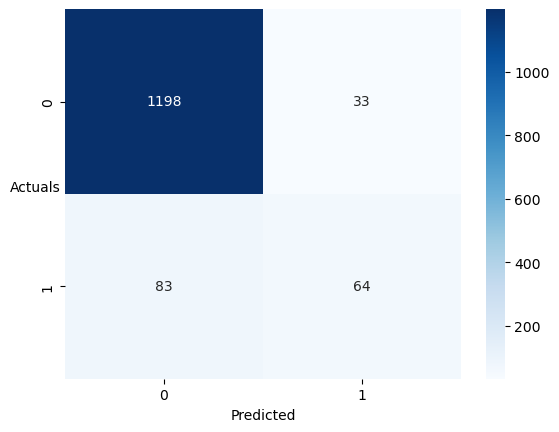

In [134]:
sns.heatmap((metrics.confusion_matrix(train_XY['Default'],y_pred)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [135]:
# Confusion Matrix
print(metrics.classification_report(train_XY['Default'],y_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.935     0.973     0.954      1231
         1.0      0.660     0.435     0.525       147

    accuracy                          0.916      1378
   macro avg      0.798     0.704     0.739      1378
weighted avg      0.906     0.916     0.908      1378



In [136]:
# Choosing the optimal Threshold using ROC Curve

from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(train_XY['Default'],y_prob_pred_train)

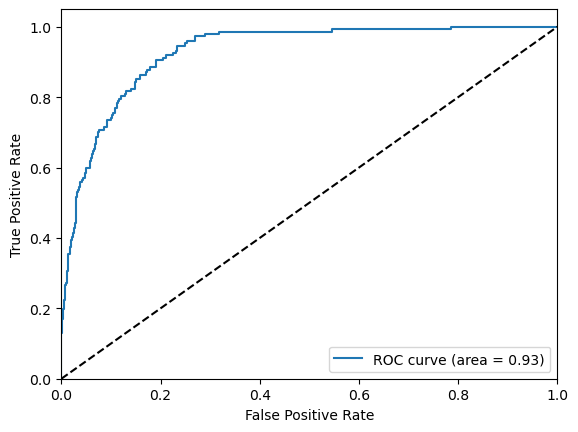

In [137]:
# ROC Curve for model31

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(train_XY['Default'], y_prob_pred_train))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc="lower right")

In [138]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.08368081445892012

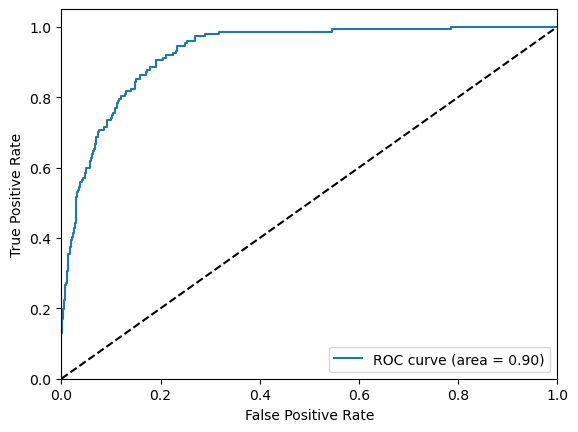

In [139]:
# ROC Curve for model31

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(test_XY['Default'], y_prob_pred_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc="lower right")

In [140]:
# Import the necessary library
from sklearn.metrics import roc_auc_score

# Calculate the ROC-AUC score
y_prob_pred_test = model32.predict(test_XY.drop('Default', axis=1))
roc_auc_score = roc_auc_score(test_XY['Default'], y_prob_pred_test)

# Print the ROC-AUC score
print(f"ROC-AUC Score for model31 on the test set: {roc_auc_score:.2f}")

ROC-AUC Score for model31 on the test set: 0.90


In [141]:
y_prob_pred_test = model32.predict(test_XY)

In [142]:
# Prediction on the test set
y_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_pred_test.append(a)

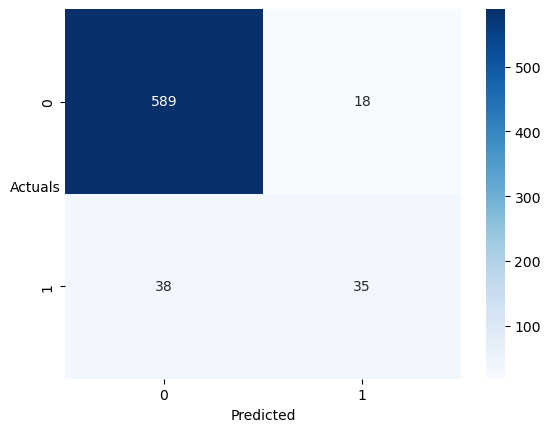

In [143]:
sns.heatmap((metrics.confusion_matrix(test_XY['Default'],y_pred_test)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [144]:
print(metrics.classification_report(test_XY['Default'],y_pred_test, digits=3))



              precision    recall  f1-score   support

         0.0      0.939     0.970     0.955       607
         1.0      0.660     0.479     0.556        73

    accuracy                          0.918       680
   macro avg      0.800     0.725     0.755       680
weighted avg      0.909     0.918     0.912       680



### Optimal Threshold

In [145]:
# Validating on the train set with optimal Threshold

# Prediction on the train set
y_pred_optimal=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.0836:
        a=1
    else:
        a=0
    y_pred_optimal.append(a)

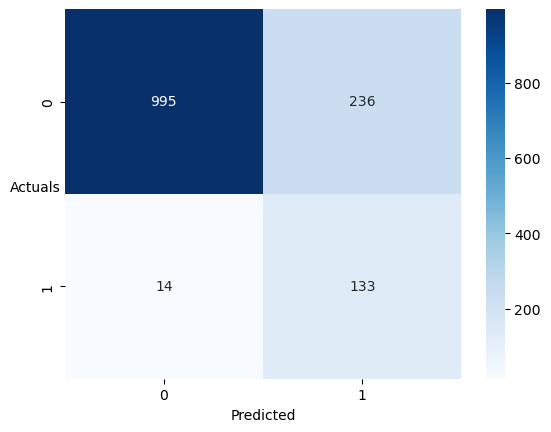

In [146]:
sns.heatmap((metrics.confusion_matrix(train_XY['Default'],y_pred_optimal)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [147]:
print(metrics.classification_report(train_XY['Default'],y_pred_optimal, digits=3))



              precision    recall  f1-score   support

         0.0      0.986     0.808     0.888      1231
         1.0      0.360     0.905     0.516       147

    accuracy                          0.819      1378
   macro avg      0.673     0.857     0.702      1378
weighted avg      0.919     0.819     0.849      1378



#### Validating on the test data

In [148]:
y_prob_pred_test = model32.predict(test_XY)

In [149]:
# Prediction on the test set
y_pred_test_optimal=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.0836:
        a=1
    else:
        a=0
    y_pred_test_optimal.append(a)

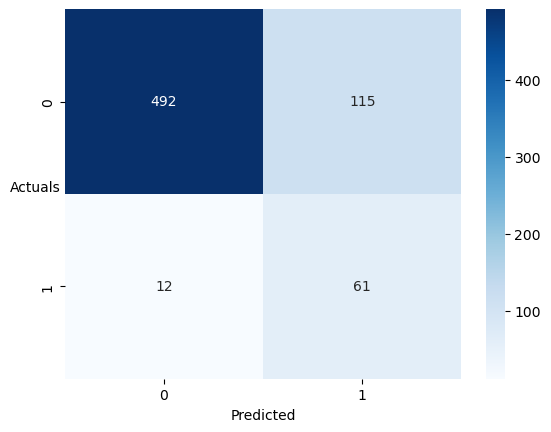

In [150]:
sns.heatmap((metrics.confusion_matrix(test_XY['Default'],y_pred_test_optimal)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [151]:
print(metrics.classification_report(test_XY['Default'],y_pred_test_optimal, digits=3))



              precision    recall  f1-score   support

         0.0      0.976     0.811     0.886       607
         1.0      0.347     0.836     0.490        73

    accuracy                          0.813       680
   macro avg      0.661     0.823     0.688       680
weighted avg      0.909     0.813     0.843       680



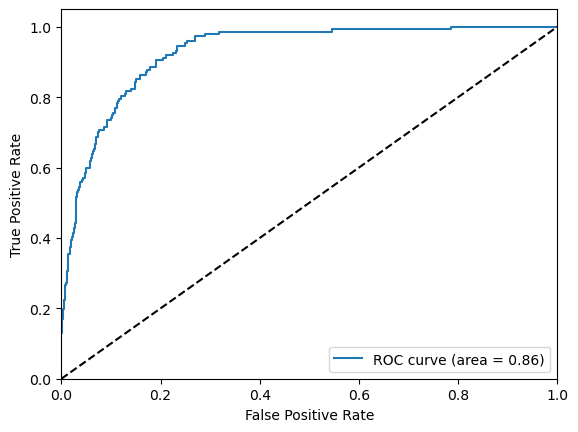

In [152]:


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(train_XY['Default'], y_pred_optimal))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc="lower right")

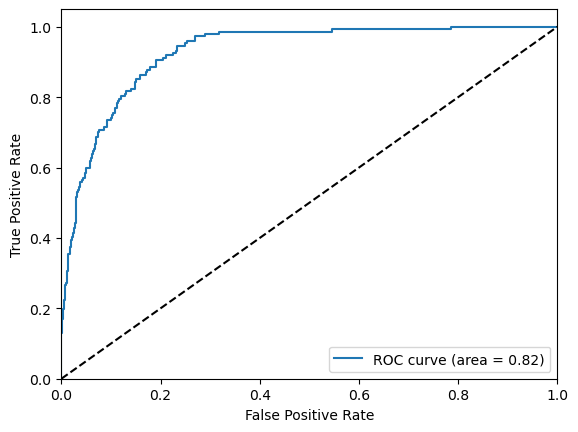

In [153]:


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(test_XY['Default'], y_pred_test_optimal))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc="lower right")

### Logistic Regression using Scikit Learn

In [154]:
from sklearn.feature_selection import RFE #Very important
from sklearn.linear_model import LogisticRegression

In [155]:
LogR = LogisticRegression()

In [156]:
selector = RFE(estimator = LogR, n_features_to_select=11, step=1)

In [157]:
selector = selector.fit(X_train, y_train)

In [158]:
selector.ranking_

array([15,  1,  7,  1,  9, 20, 32, 24,  1, 18, 12,  8,  6,  1, 27,  3, 16,
        1, 10, 26, 14, 29,  5,  1, 31,  2, 22, 23, 13,  1,  1,  1, 19, 30,
        1, 17,  4, 25, 11, 28, 21,  1])

In [159]:
selector.n_features_


11

In [160]:
X_traincols=X_train.columns


In [161]:
X_test=X_test[X_traincols]

In [162]:
df = pd.DataFrame({'Feature': X_train.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

Feature  Rank
1   _Research_and_development_expense_rate     1
3     _Interest_bearing_debt_interest_rate     1
8       _Continuous_Net_Profit_Growth_Rate     1
13                            _Quick_Ratio     1
17           _Accounts_Receivable_Turnover     1
23             _Allocation_rate_per_person     1
29      _Retained_Earnings_to_Total_Assets     1
30          _Total_income_to_Total_expense     1
31                _Total_expense_to_Assets     1
34                     _Cash_Turnover_Rate     1
41                    _Equity_to_Liability     1

In [163]:
df[df['Rank'] == 1].Feature.values

array(['_Research_and_development_expense_rate',
       '_Interest_bearing_debt_interest_rate',
       '_Continuous_Net_Profit_Growth_Rate', '_Quick_Ratio',
       '_Accounts_Receivable_Turnover', '_Allocation_rate_per_person',
       '_Retained_Earnings_to_Total_Assets',
       '_Total_income_to_Total_expense', '_Total_expense_to_Assets',
       '_Cash_Turnover_Rate', '_Equity_to_Liability'], dtype=object)

In [164]:
from sklearn.metrics import confusion_matrix, classification_report

In [165]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [166]:
print(confusion_matrix(y_train, pred_train))

[[1200   31]
 [  82   65]]


In [167]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      1231
         1.0       0.68      0.44      0.53       147

    accuracy                           0.92      1378
   macro avg       0.81      0.71      0.75      1378
weighted avg       0.91      0.92      0.91      1378



In [168]:
print(confusion_matrix(y_test, pred_test))

[[588  19]
 [ 41  32]]


In [169]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       607
         1.0       0.63      0.44      0.52        73

    accuracy                           0.91       680
   macro avg       0.78      0.70      0.73       680
weighted avg       0.90      0.91      0.90       680



In [170]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = .75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [171]:
selector_smote = selector.fit(X_res, y_res)

In [172]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [173]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1231
         1.0       0.83      0.83      0.83       923

    accuracy                           0.85      2154
   macro avg       0.85      0.85      0.85      2154
weighted avg       0.85      0.85      0.85      2154



In [174]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.92       607
         1.0       0.40      0.71      0.51        73

    accuracy                           0.86       680
   macro avg       0.68      0.79      0.72       680
weighted avg       0.90      0.86      0.87       680



## <a name ='link3'>**Q3**</a><br>
 Univariate (4 marks) & Bivariate (6 marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building).<br>


EDA will be performed using the significant Predictors only that are identified after VIF and feature selection using p-values.

In [175]:
from scipy.stats import skew 
from scipy.stats import kurtosis

In [176]:
df=Company[['Default','_Research_and_development_expense_rate',
       '_Interest_bearing_debt_interest_rate', '_Quick_Ratio',
       '_Total_debt_to_Total_net_worth', '_Accounts_Receivable_Turnover',
       '_Average_Collection_Days', '_Allocation_rate_per_person',
       '_Retained_Earnings_to_Total_Assets',
       '_Total_income_to_Total_expense', '_Cash_Turnover_Rate',
       '_Equity_to_Liability']]

In [177]:
df.head().T

0             1  \
Default                                         0.00          1.00   
_Research_and_development_expense_rate          0.00 4230000000.00   
_Interest_bearing_debt_interest_rate            0.00          0.00   
_Quick_Ratio                                    0.00          0.00   
_Total_debt_to_Total_net_worth                  0.03          0.01   
_Accounts_Receivable_Turnover                   0.01          0.00   
_Average_Collection_Days                        0.00          0.02   
_Allocation_rate_per_person                     0.14          0.02   
_Retained_Earnings_to_Total_Assets              0.94          0.93   
_Total_income_to_Total_expense                  0.00          0.00   
_Cash_Turnover_Rate                    5470000000.00  882000000.00   
_Equity_to_Liability                            0.02          0.03   

                                                  2             3  \
Default                                        0.00          0.00   
_Research_and_development_expense_rate 815000000.00          0.00   
_Interest_bearing_debt_interest_rate           0.00          0.00   
_Quick_Ratio                                   0.01          0.00   
_Total_debt_to_Total_net_worth                 0.00          0.01   
_Accounts_Receivable_Turnover                  0.00          0.01   
_Average_Collection_Days                       0.01          0.00   
_Allocation_rate_per_person                    0.01          0.01   
_Retained_Earnings_to_Total_Assets             0.93          0.93   
_Total_income_to_Total_expense                 0.00          0.00   
_Cash_Turnover_Rate                    679000000.00 6020000000.00   
_Equity_to_Liability                           0.04          0.03   

                                                   4  
Default                                         0.00  
_Research_and_development_expense_rate          0.00  
_Interest_bearing_debt_interest_rate            0.00  
_Quick_Ratio                                    0.00  
_Total_debt_to_Total_net_worth                  0.01  
_Accounts_Receivable_Turnover                   0.00  
_Average_Collection_Days                        0.01  
_Allocation_rate_per_person                     0.00  
_Retained_Earnings_to_Total_Assets              0.93  
_Total_income_to_Total_expense                  0.00  
_Cash_Turnover_Rate                    5670000000.00  
_Equity_to_Liability                            0.02

In [178]:
df.info()

#1. Total 10 Independent variables and 1 response (Default) Column.
#2. All Numeric datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Default                                 2058 non-null   int64  
 1   _Research_and_development_expense_rate  2058 non-null   float64
 2   _Interest_bearing_debt_interest_rate    2058 non-null   float64
 3   _Quick_Ratio                            2058 non-null   float64
 4   _Total_debt_to_Total_net_worth          2037 non-null   float64
 5   _Accounts_Receivable_Turnover           2058 non-null   float64
 6   _Average_Collection_Days                2058 non-null   float64
 7   _Allocation_rate_per_person             2058 non-null   float64
 8   _Retained_Earnings_to_Total_Assets      2058 non-null   float64
 9   _Total_income_to_Total_expense          2058 non-null   float64
 10  _Cash_Turnover_Rate                     2058 non-null   floa

In [179]:

pd.options.display.float_format = '{:.4f}'.format   

df.describe().T

count            mean  \
Default                                2058.0000          0.1069   
_Research_and_development_expense_rate 2058.0000 1208634256.5598   
_Interest_bearing_debt_interest_rate   2058.0000   11130223.5191   
_Quick_Ratio                           2058.0000   27755102.0498   
_Total_debt_to_Total_net_worth         2037.0000   10714285.7258   
_Accounts_Receivable_Turnover          2058.0000   41598639.4598   
_Average_Collection_Days               2058.0000   26297862.0103   
_Allocation_rate_per_person            2058.0000    5725558.8211   
_Retained_Earnings_to_Total_Assets     2058.0000          0.9304   
_Total_income_to_Total_expense         2058.0000          0.0024   
_Cash_Turnover_Rate                    2058.0000 2653695544.2182   
_Equity_to_Liability                   2058.0000          0.0425   

                                                   std    min    25%  \
Default                                         0.3091 0.0000 0.0000   
_Research_and_development_expense_rate 2144568158.0809 0.0000 0.0000   
_Interest_bearing_debt_interest_rate     90425949.0445 0.0000 0.0003   
_Quick_Ratio                            444865390.4716 0.0000 0.0029   
_Total_debt_to_Total_net_worth          269696017.5877 0.0000 0.0039   
_Accounts_Receivable_Turnover           504767266.5944 0.0000 0.0007   
_Average_Collection_Days                410996733.8326 0.0000 0.0036   
_Allocation_rate_per_person             197949961.0648 0.0000 0.0047   
_Retained_Earnings_to_Total_Assets              0.0298 0.0000 0.9279   
_Total_income_to_Total_expense                  0.0005 0.0000 0.0022   
_Cash_Turnover_Rate                    2821244732.1900 0.0001 0.0017   
_Equity_to_Liability                            0.0595 0.0039 0.0204   

                                                   50%             75%  \
Default                                         0.0000          0.0000   
_Research_and_development_expense_rate          0.0002 1550000000.0000   
_Interest_bearing_debt_interest_rate            0.0005          0.0007   
_Quick_Ratio                                    0.0053          0.0089   
_Total_debt_to_Total_net_worth                  0.0073          0.0131   
_Accounts_Receivable_Turnover                   0.0011          0.0019   
_Average_Collection_Days                        0.0060          0.0086   
_Allocation_rate_per_person                     0.0106          0.0246   
_Retained_Earnings_to_Total_Assets              0.9351          0.9409   
_Total_income_to_Total_expense                  0.0023          0.0024   
_Cash_Turnover_Rate                    1730000000.0000 4550000000.0000   
_Equity_to_Liability                            0.0285          0.0434   

                                                   max  
Default                                         1.0000  
_Research_and_development_expense_rate 9980000000.0000  
_Interest_bearing_debt_interest_rate    990000000.0000  
_Quick_Ratio                           9230000000.0000  
_Total_debt_to_Total_net_worth         9940000000.0000  
_Accounts_Receivable_Turnover          9740000000.0000  
_Average_Collection_Days               8800000000.0000  
_Allocation_rate_per_person            8280000000.0000  
_Retained_Earnings_to_Total_Assets              0.9728  
_Total_income_to_Total_expense                  0.0103  
_Cash_Turnover_Rate                    9990000000.0000  
_Equity_to_Liability                            1.0000

In [180]:
df.skew(axis = 0) 

Default                                    2.5463
_Research_and_development_expense_rate     1.9860
_Interest_bearing_debt_interest_rate       8.6666
_Quick_Ratio                              17.3336
_Total_debt_to_Total_net_worth            30.8269
_Accounts_Receivable_Turnover             14.1855
_Average_Collection_Days                  17.9869
_Allocation_rate_per_person               38.1704
_Retained_Earnings_to_Total_Assets       -16.1449
_Total_income_to_Total_expense             8.0151
_Cash_Turnover_Rate                        0.8924
_Equity_to_Liability                       9.1364
dtype: float64

In [181]:
df.kurtosis(axis = 0) 

Default                                     4.4881
_Research_and_development_expense_rate      3.2953
_Interest_bearing_debt_interest_rate       77.0317
_Quick_Ratio                              314.5551
_Total_debt_to_Total_net_worth           1029.9200
_Accounts_Receivable_Turnover             218.8232
_Average_Collection_Days                  340.3024
_Allocation_rate_per_person              1531.6993
_Retained_Earnings_to_Total_Assets        468.8240
_Total_income_to_Total_expense            105.1667
_Cash_Turnover_Rate                        -0.3368
_Equity_to_Liability                      115.4525
dtype: float64

### Univariate analysis

In [182]:

display(Company['Default'].value_counts())

pd.options.display.float_format = '{:.2f}'.format
display(Company['Default'].value_counts(normalize = True))



0    1838
1     220
Name: Default, dtype: int64

0   0.89
1   0.11
Name: Default, dtype: float64

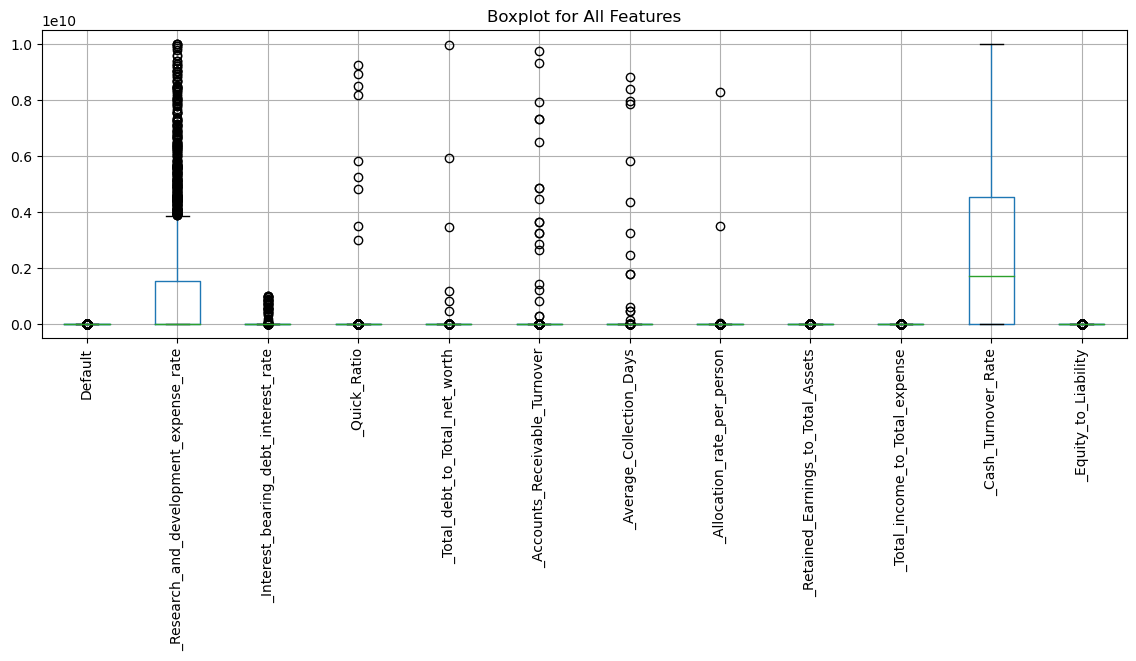

In [183]:
plt.figure(figsize=(14,4));

df.boxplot();
plt.title("Boxplot for All Features")
plt.xticks(rotation=90);

0   0.89
1   0.11
Name: Default, dtype: float64

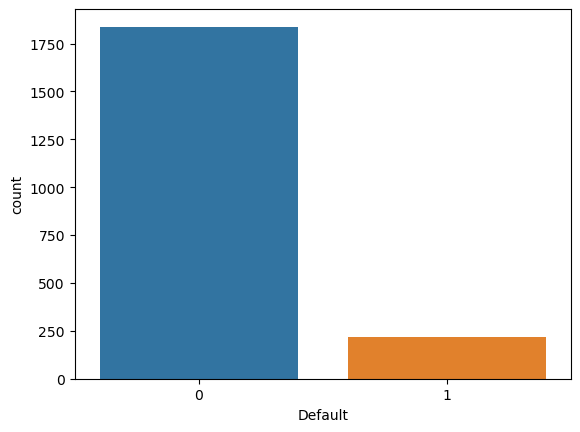

In [184]:
sns.countplot(df['Default']);
display(df.Default.value_counts(normalize=True));

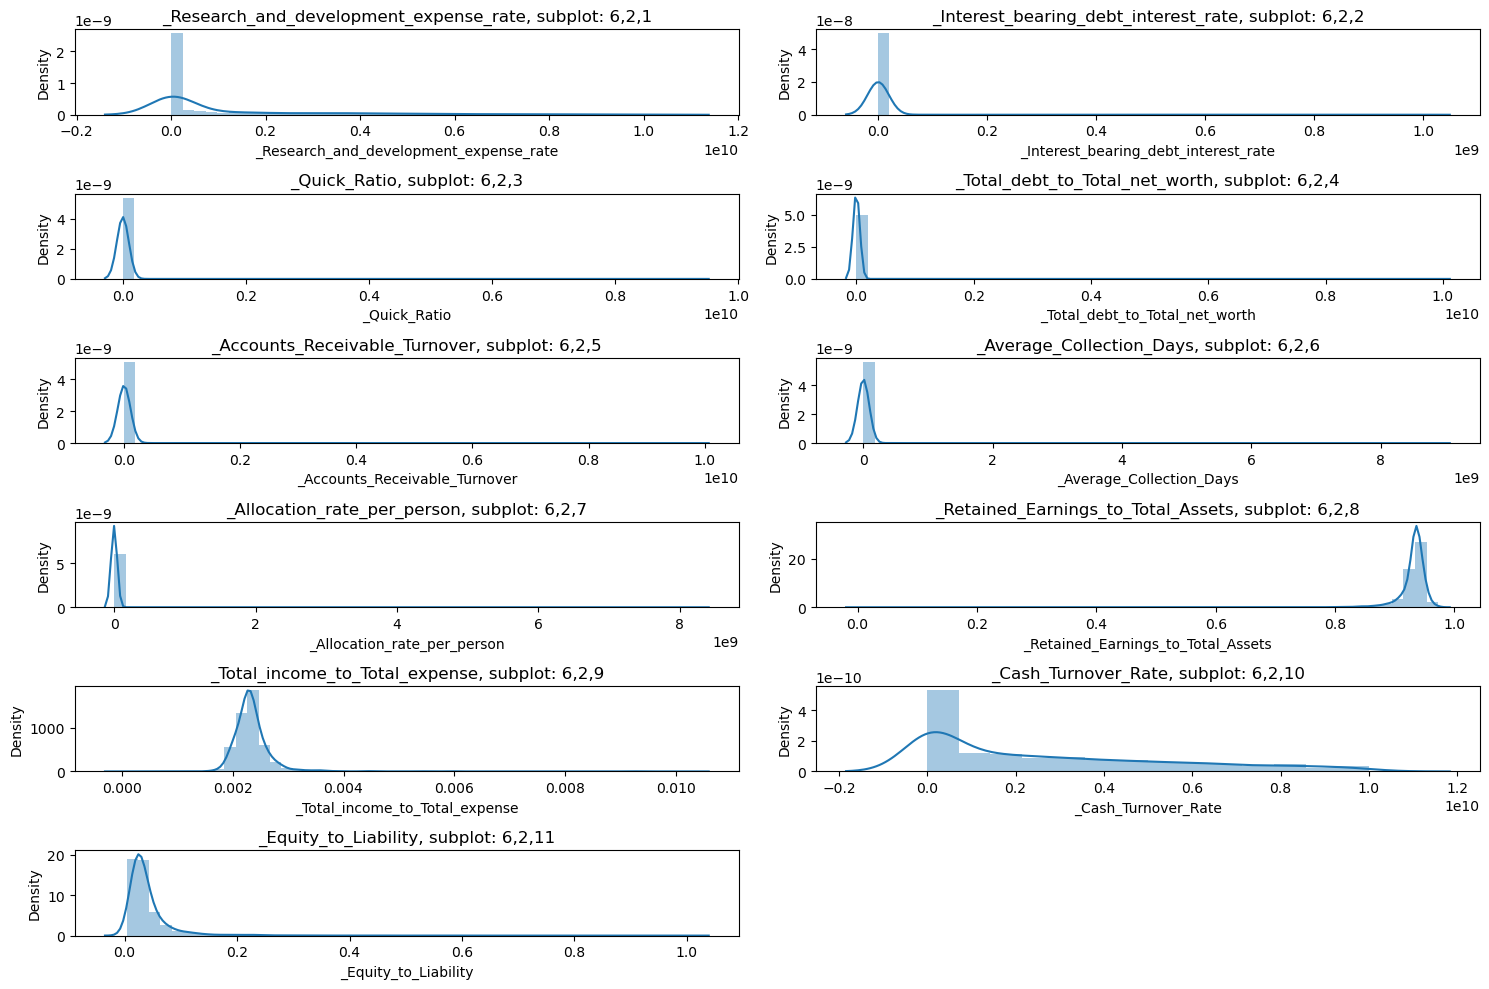

In [185]:
columns = ['_Research_and_development_expense_rate',
       '_Interest_bearing_debt_interest_rate', '_Quick_Ratio',
       '_Total_debt_to_Total_net_worth', '_Accounts_Receivable_Turnover',
       '_Average_Collection_Days', '_Allocation_rate_per_person',
       '_Retained_Earnings_to_Total_Assets',
       '_Total_income_to_Total_expense', '_Cash_Turnover_Rate',
       '_Equity_to_Liability']

#  Categorical Data
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (15,10))

for i in columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.tight_layout()
plt.show()

In [186]:
df.columns

Index(['Default', '_Research_and_development_expense_rate',
       '_Interest_bearing_debt_interest_rate', '_Quick_Ratio',
       '_Total_debt_to_Total_net_worth', '_Accounts_Receivable_Turnover',
       '_Average_Collection_Days', '_Allocation_rate_per_person',
       '_Retained_Earnings_to_Total_Assets', '_Total_income_to_Total_expense',
       '_Cash_Turnover_Rate', '_Equity_to_Liability'],
      dtype='object')

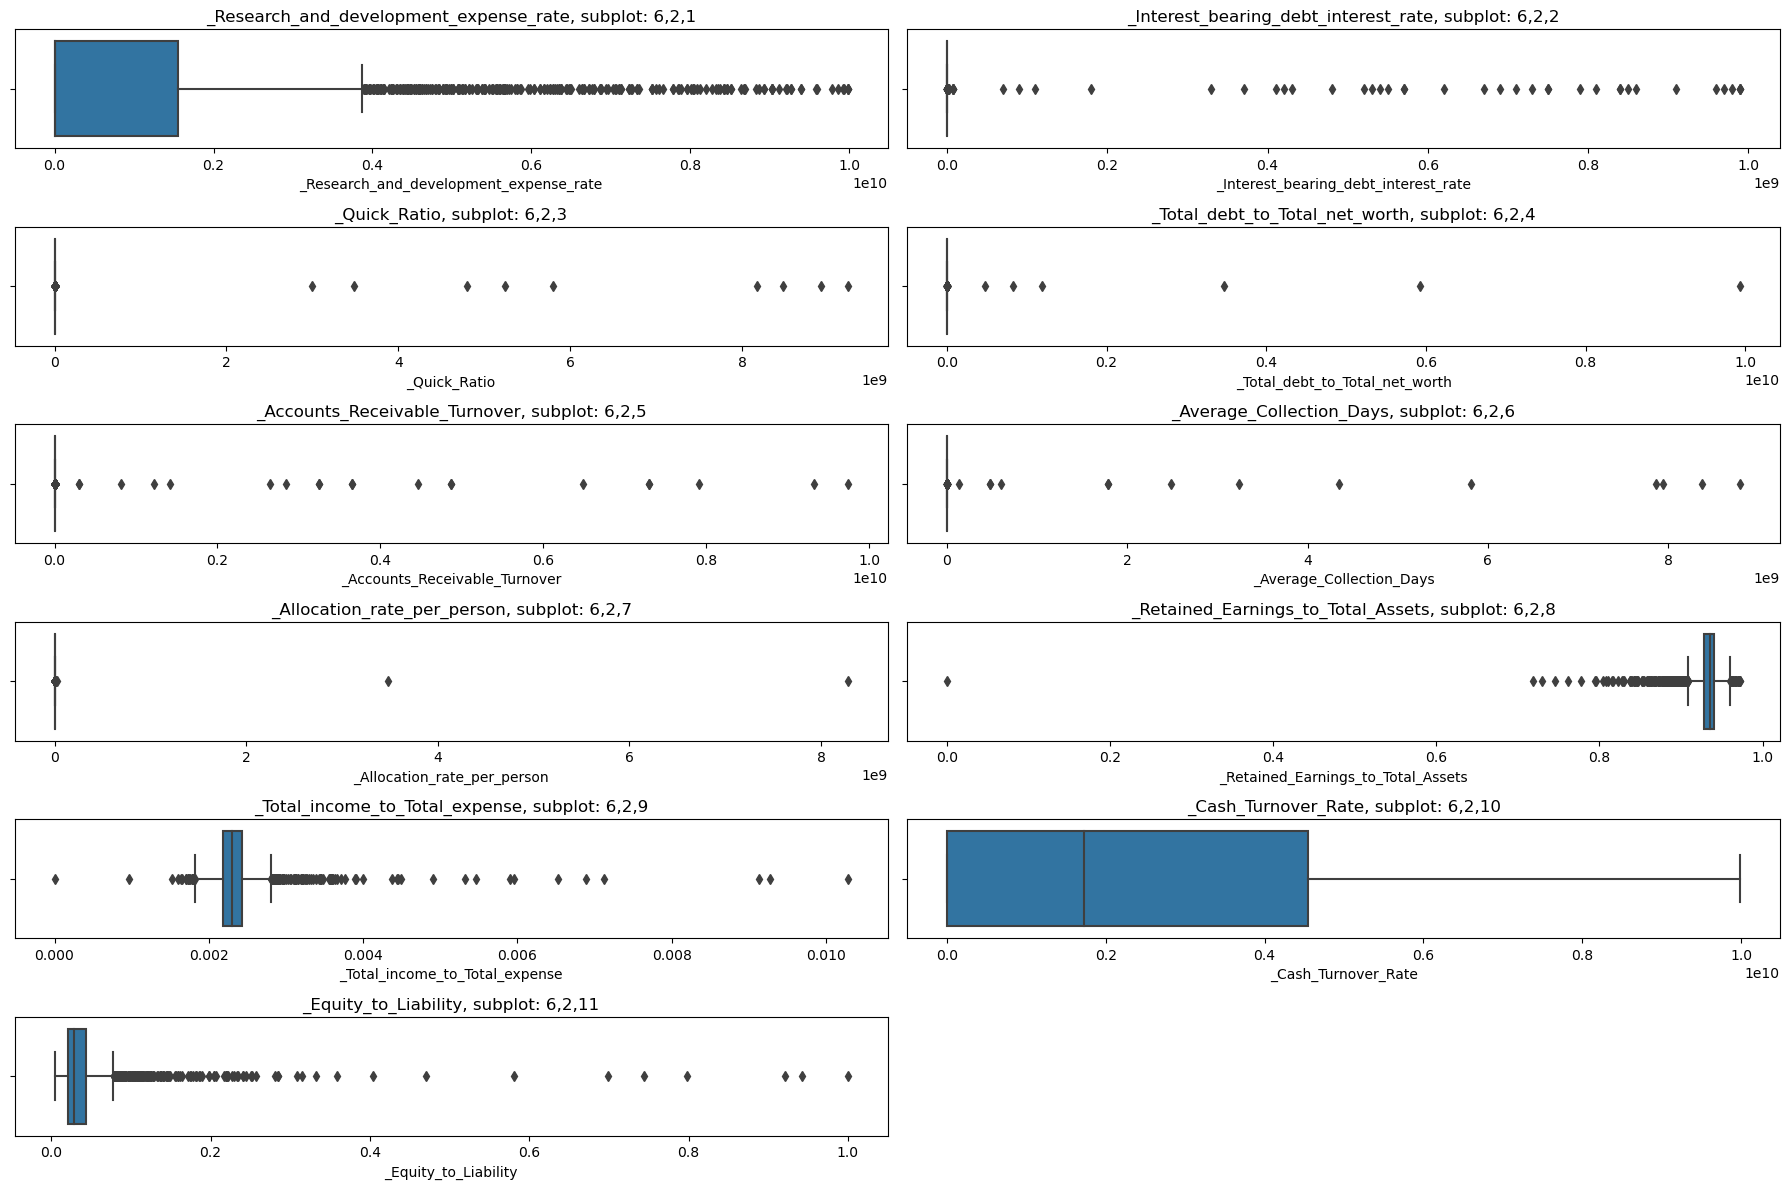

In [187]:
columns = ['_Research_and_development_expense_rate',
       '_Interest_bearing_debt_interest_rate', '_Quick_Ratio',
       '_Total_debt_to_Total_net_worth', '_Accounts_Receivable_Turnover',
       '_Average_Collection_Days', '_Allocation_rate_per_person',
       '_Retained_Earnings_to_Total_Assets',
       '_Total_income_to_Total_expense', '_Cash_Turnover_Rate',
       '_Equity_to_Liability']

a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (18,12))

for i in columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(df[i])
    c = c + 1

plt.tight_layout()
plt.show()

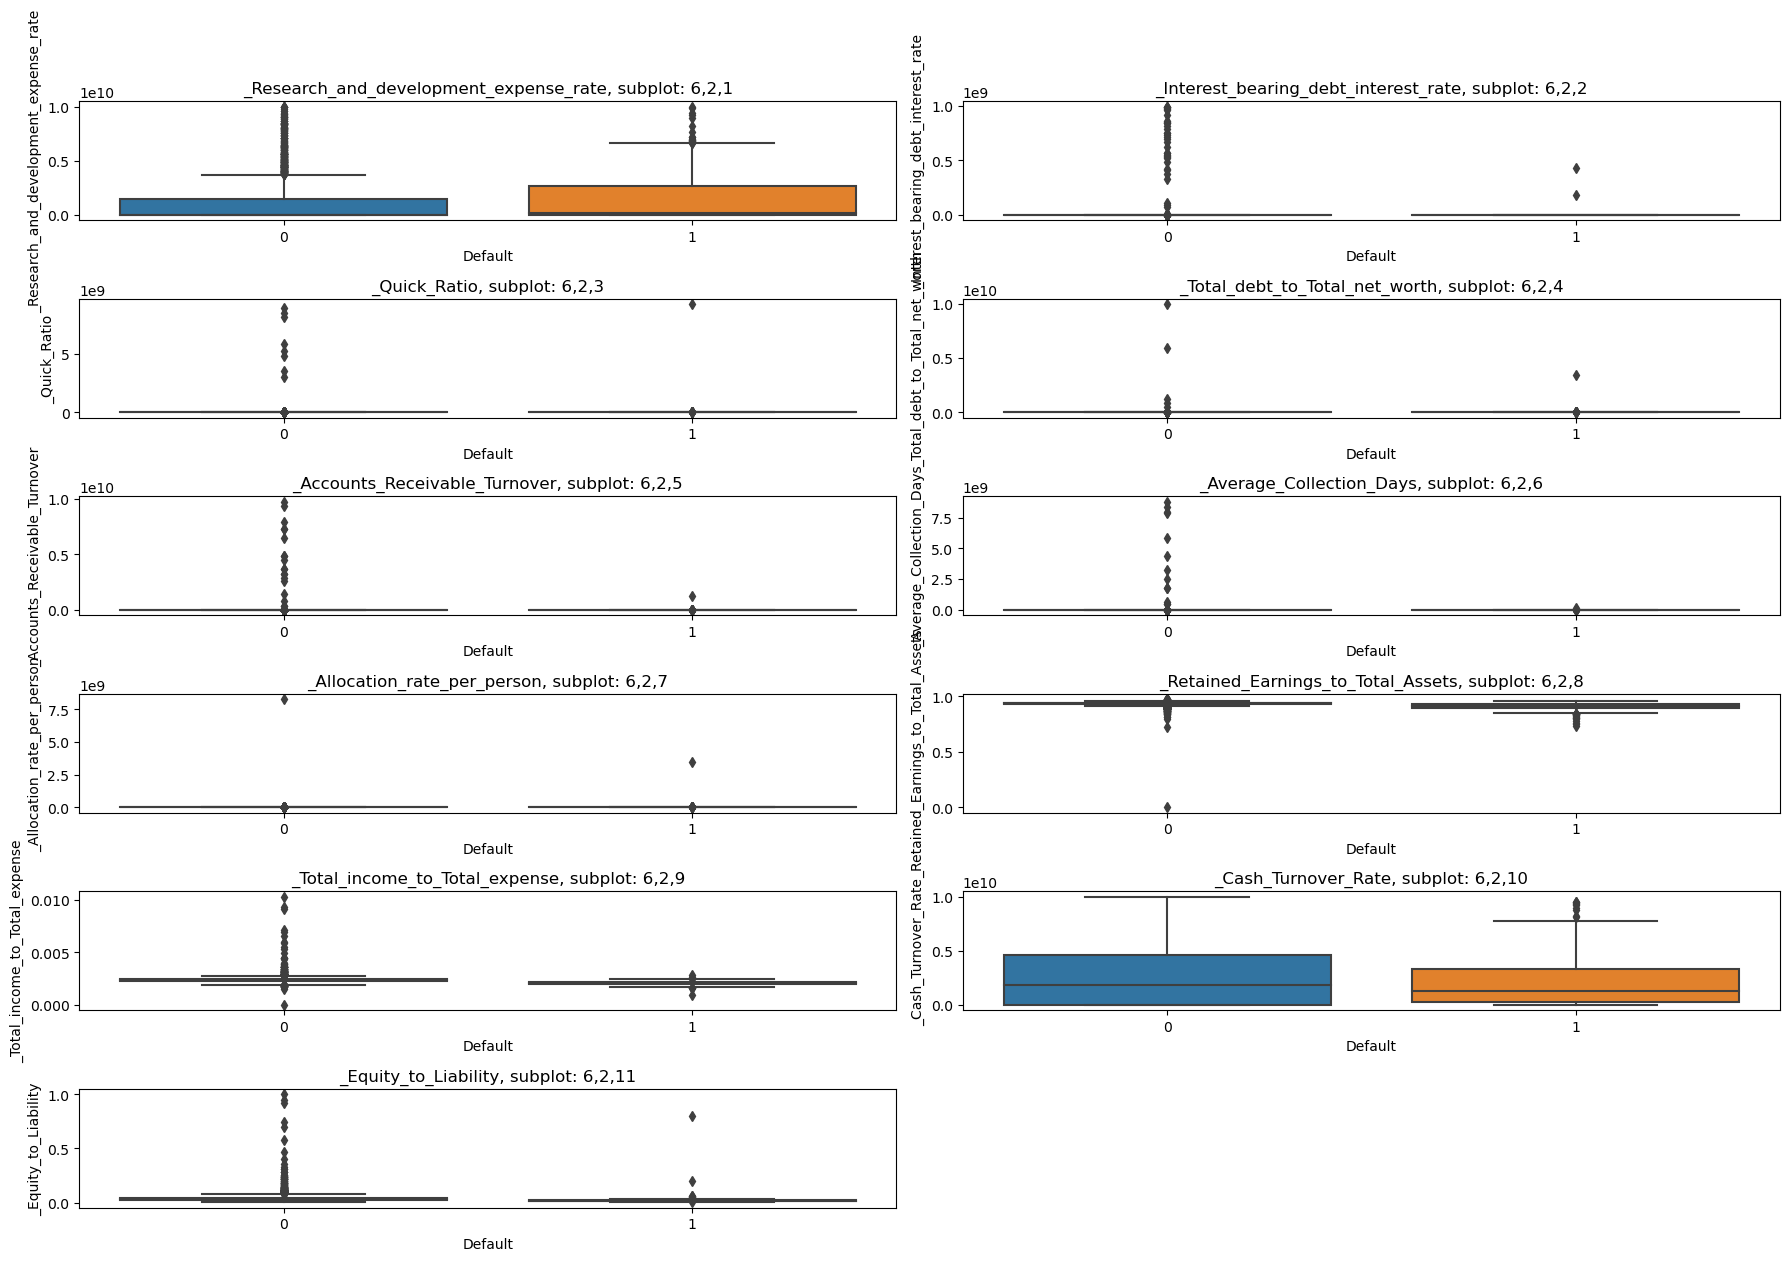

In [188]:

#  Categorical Data
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (18,12))

for i in columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data = df, x = 'Default',y=i)
    c = c + 1

plt.tight_layout()
plt.show()

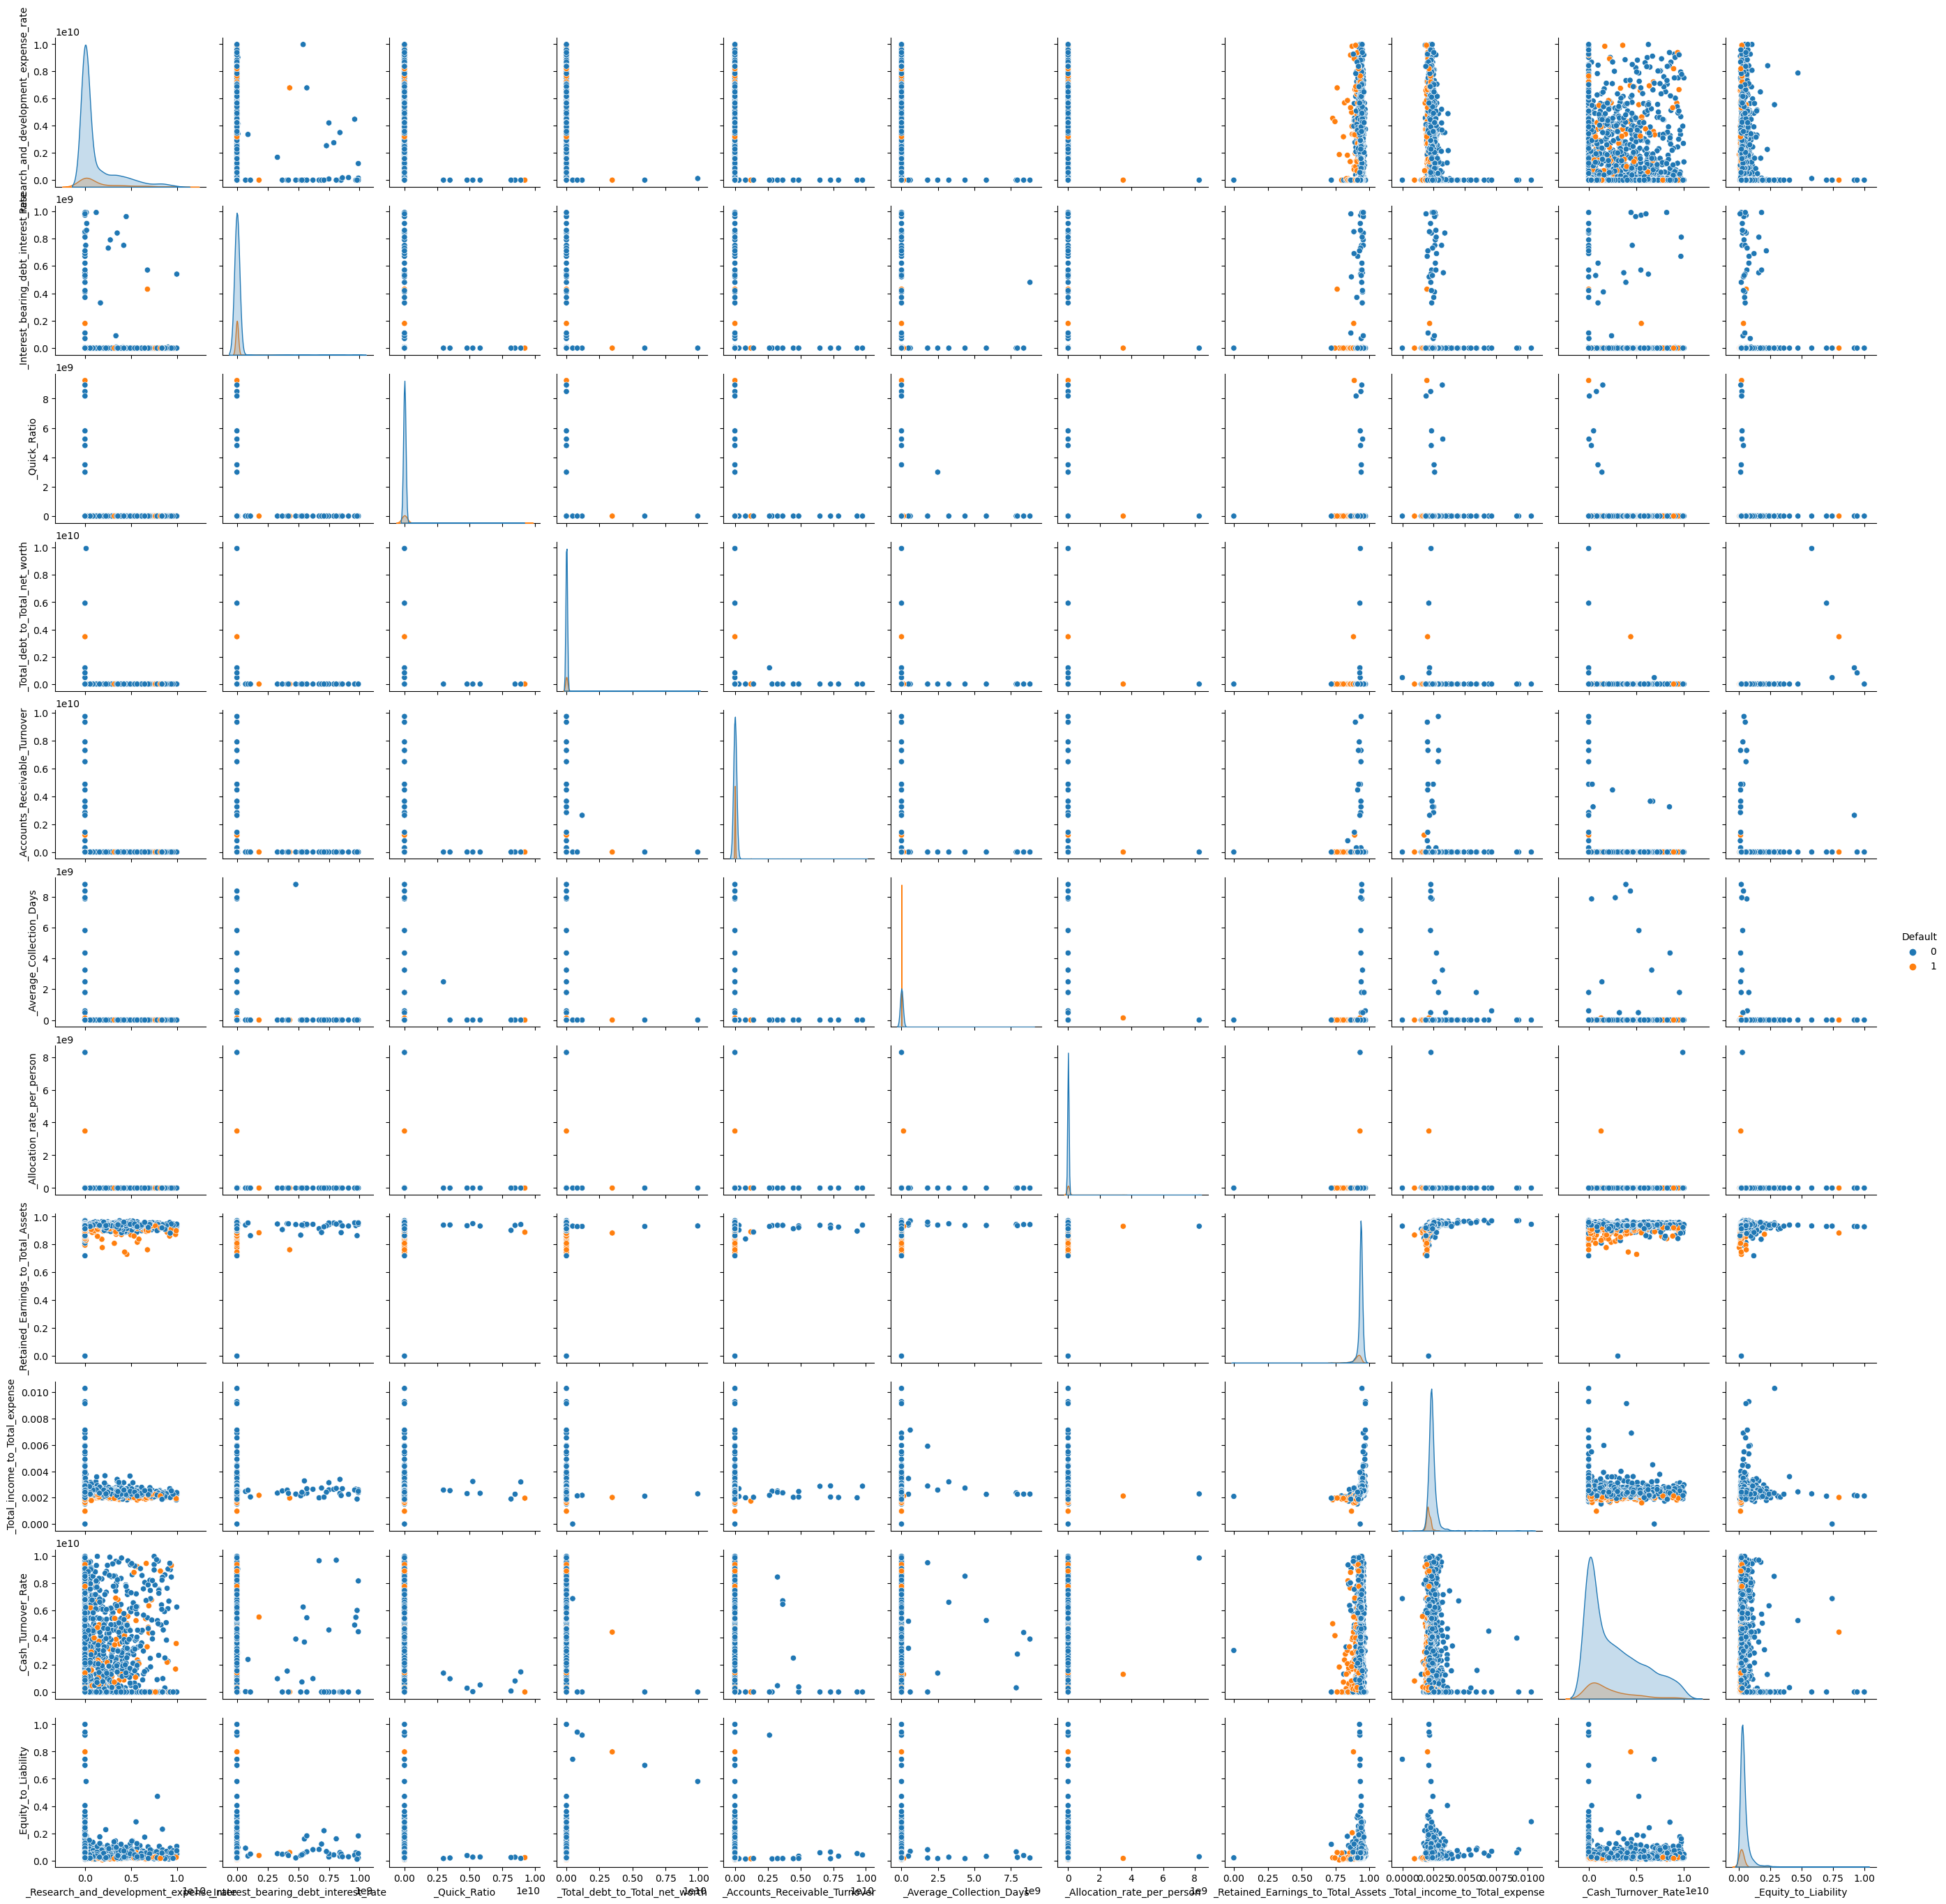

In [189]:
sns.pairplot(data=df,hue='Default')

In [190]:
columns = ['_Research_and_development_expense_rate',
       '_Interest_bearing_debt_interest_rate', '_Quick_Ratio',
       '_Total_debt_to_Total_net_worth', '_Accounts_Receivable_Turnover',
       '_Average_Collection_Days', '_Allocation_rate_per_person',
       '_Retained_Earnings_to_Total_Assets',
       '_Total_income_to_Total_expense', '_Cash_Turnover_Rate',
       '_Equity_to_Liability']

for i in columns:
    print(i)
    print("default is 0",df[df['Default']==0][i].describe())
    print("default is 1",df[df['Default']==1][i].describe())

_Research_and_development_expense_rate
default is 0 count         1838.00
mean    1161116539.72
std     2102844657.92
min              0.00
25%              0.00
50%              0.00
75%     1490000000.00
max     9980000000.00
Name: _Research_and_development_expense_rate, dtype: float64
default is 1 count          220.00
mean    1605623181.82
std     2435040378.91
min              0.00
25%              0.00
50%      154500000.00
75%     2662500000.00
max     9920000000.00
Name: _Research_and_development_expense_rate, dtype: float64
_Interest_bearing_debt_interest_rate
default is 0 count        1838.00
mean     12130576.72
std      95023048.69
min             0.00
25%             0.00
50%             0.00
75%             0.00
max     990000000.00
Name: _Interest_bearing_debt_interest_rate, dtype: float64
default is 1 count         220.00
mean      2772727.27
std      31376971.19
min             0.00
25%             0.00
50%             0.00
75%             0.00
max     430000000.00
Nam

## <a name ='link6'>**Q6**</a><br>
 Build a Random Forest Model on Train Dataset. Also showcase your model building approach.Validate the Random Forest Model on test Dataset and state the performance metrics. Also state interpretation from the model<br>

### Model-I:  RANDOM FOREST

In [291]:
## Build a RANDOM FOREST Model 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
param_grid = {
    'max_depth':[3,5,7],
    'min_samples_leaf':[5,10,15],
    'min_samples_split':[15,30,45],
    'n_estimators':[25,50]
}

rfcl=RandomForestClassifier()
grid_search_rf= GridSearchCV(estimator=rfcl,param_grid=param_grid)

In [292]:
grid_search_rf.fit(X_train, y_train) 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [293]:
grid_search_rf.best_params_

{'max_depth': 7,
 'min_samples_leaf': 15,
 'min_samples_split': 45,
 'n_estimators': 50}

In [294]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=15, min_samples_split=45,
                       n_estimators=50)

In [295]:
best_grid_rf=grid_search_rf.best_estimator_

In [312]:
pred_train_rf=best_grid_rf.predict(X_train)


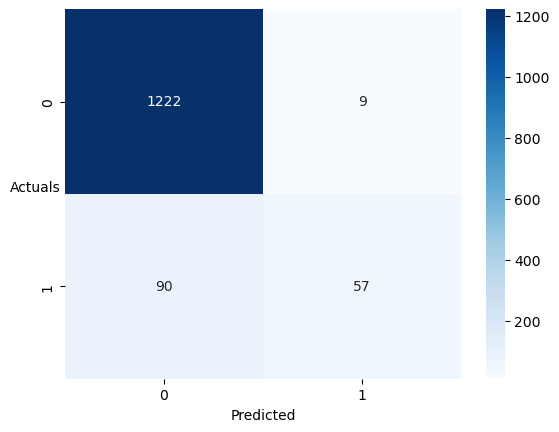

In [318]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [319]:
print(metrics.classification_report(y_train,pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1231
         1.0       0.86      0.39      0.54       147

    accuracy                           0.93      1378
   macro avg       0.90      0.69      0.75      1378
weighted avg       0.92      0.93      0.92      1378



## Dropping columns in X Test 

In [314]:
X_test=X_test[X_train.columns]

In [315]:
pred_test_rf=best_grid_rf.predict(X_test)

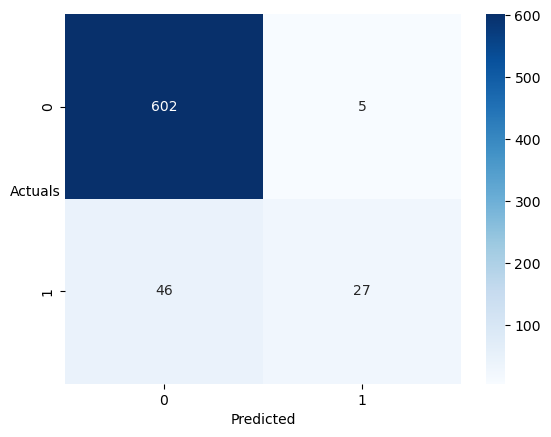

In [316]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [317]:
print(metrics.classification_report(y_train,pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1231
         1.0       0.86      0.39      0.54       147

    accuracy                           0.93      1378
   macro avg       0.90      0.69      0.75      1378
weighted avg       0.92      0.93      0.92      1378



In [303]:
print(metrics.classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       607
         1.0       0.84      0.37      0.51        73

    accuracy                           0.93       680
   macro avg       0.89      0.68      0.74       680
weighted avg       0.92      0.93      0.91       680



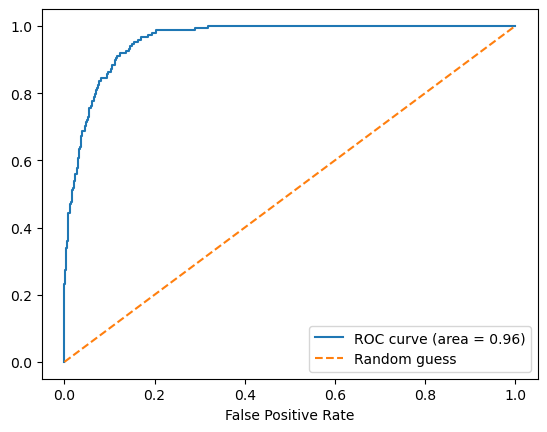

In [304]:
# calculating ROC curve for rfcl1 model
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities of positive class (class 1) for the test set
probs_train = best_grid_rf.predict_proba(X_train)[:, 1]

# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, probs_train)

# Compute the area under the ROC curve
roc_auc_train_rfcl = roc_auc_score(y_train, probs_train)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_train_rfcl:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate');
plt.legend(loc="lower right")

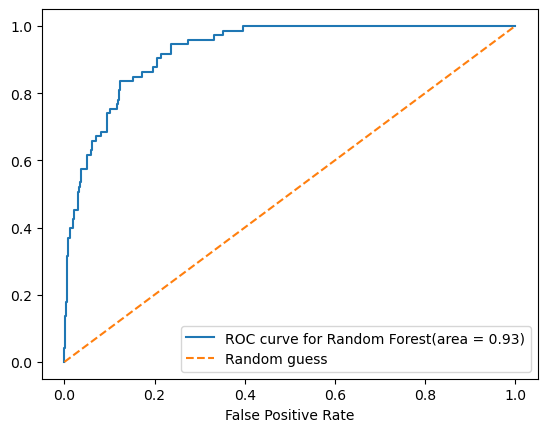

In [305]:
# calculating ROC curve for rfcl1 model
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities of positive class (class 1) for the test set
probs_test = best_grid_rf.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs_test)

# Compute the area under the ROC curve
roc_auc_test_rfcl = roc_auc_score(y_test, probs_test)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label=f'ROC curve for Random Forest(area = {roc_auc_test_rfcl:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate');
plt.legend(loc="lower right")

## <a name ='link7'>**Q7**</a><br>
 Build a LDA Model on Train Dataset. Also showcase your model building approach.Validate the LDA Model on test Dataset and state the performance metrics. Also state interpretation from the model<br>


### Model-II: Linear Discriminant Analysis (LDA)

In [211]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [212]:
LDA = LinearDiscriminantAnalysis()

In [213]:
lda_model=LDA.fit(X_train,y_train)

In [214]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

Accuracy Score for Train data is  0.91


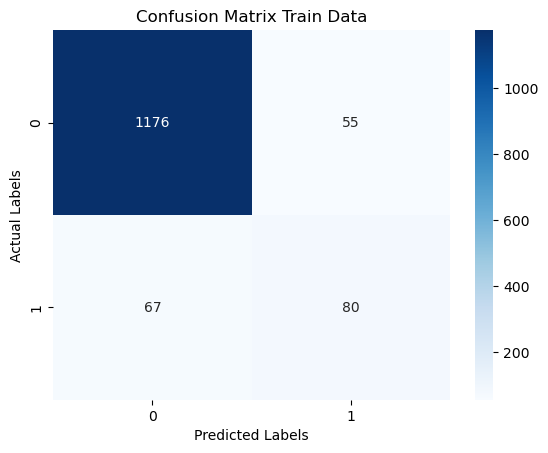

In [215]:
print("Accuracy Score for Train data is ", round(lda_model.score(X_train, y_train),2))
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_lda)),annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()


In [216]:
print(metrics.classification_report(y_train,pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1231
         1.0       0.59      0.54      0.57       147

    accuracy                           0.91      1378
   macro avg       0.77      0.75      0.76      1378
weighted avg       0.91      0.91      0.91      1378



In [217]:
metrics.precision_score(y_train,pred_train_lda)

0.5925925925925926

Accuracy Score for Train data is  0.91


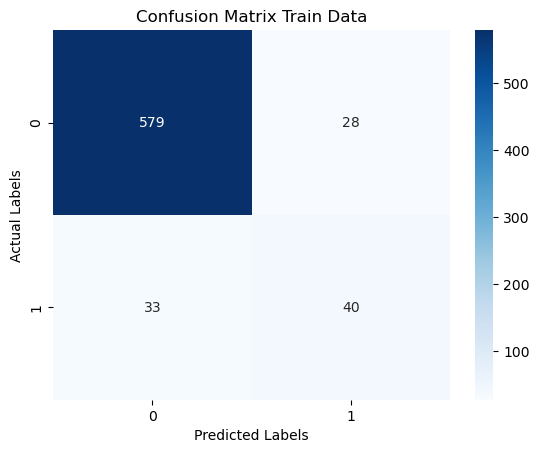

In [218]:
print("Accuracy Score for Train data is ", round(lda_model.score(X_test, y_test),2))
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_lda)),annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()


In [219]:
print(metrics.classification_report(y_test,pred_test_lda)) 

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       607
         1.0       0.59      0.55      0.57        73

    accuracy                           0.91       680
   macro avg       0.77      0.75      0.76       680
weighted avg       0.91      0.91      0.91       680



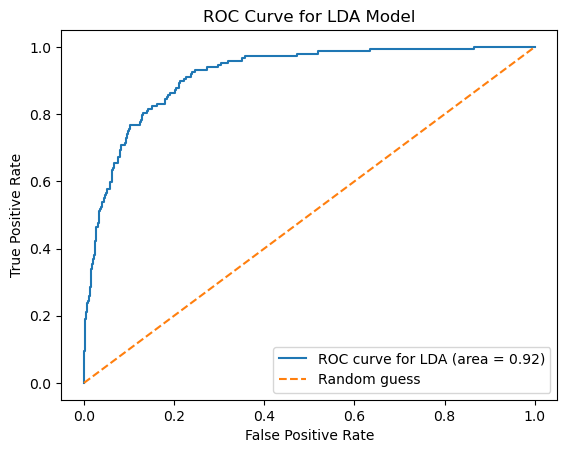

In [220]:
# ROC curve for lda_model
probs_train_lda = lda_model.predict_proba(X_train)[:, 1] # Compute probabilities of positive class (class 1) for the test set
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_train, probs_train_lda) # Compute the false positive rate, true positive rate, and threshold for the ROC curve
roc_auc_lda_train = roc_auc_score(y_train, probs_train_lda) # Compute the area under the ROC curve

plt.plot(fpr_lda, tpr_lda, label=f'ROC curve for LDA (area = {roc_auc_lda_train:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA Model')
plt.legend(loc="lower right")
plt.show()




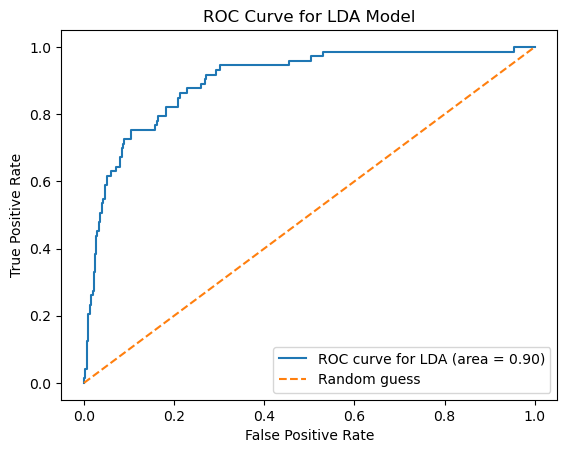

In [221]:
# ROC curve for lda_model
probs_test_lda = lda_model.predict_proba(X_test)[:, 1]

# Compute probabilities of positive class (class 1) for the test set
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, probs_test_lda) # Compute the false positive rate, true positive rate, and threshold for the ROC curve
roc_auc_lda_test = roc_auc_score(y_test, probs_test_lda) # Compute the area under the ROC curve

plt.plot(fpr_lda, tpr_lda, label=f'ROC curve for LDA (area = {roc_auc_lda_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA Model')
plt.legend(loc="lower right")
plt.show()

In [222]:
LDA.coef_

array([[ 0.13448753,  0.48084208,  0.37795173,  0.3014007 , -0.15356063,
        -0.00595404, -0.00284341,  0.03259212, -0.30544885, -0.17833374,
        -0.6414129 ,  0.20341436, -0.36536611, -0.84065421, -0.11735115,
         0.15723472,  0.00654285, -0.52299845,  0.13970724,  0.08183601,
         0.16879517,  0.19389542,  0.18978149,  0.42879922, -0.27920085,
         0.61629147, -0.33221628, -0.09250709, -0.10877053, -0.9985663 ,
         0.04812559,  0.64461206, -0.0091163 , -0.07355347, -0.25321336,
        -0.07826053, -0.0725485 ,  0.17319255,  0.19389192, -0.1442641 ,
        -0.35243022, -0.45924646]])

In [223]:
data = {'Variables': ['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
        '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
        '_Tax_rate_A', '_Cash_Flow_Per_Share',
        '_Realized_Sales_Gross_Profit_Growth_Rate',
        '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
        '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
        '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
        '_Quick_Ratio', '_Interest_Expense_Ratio',
        '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
        '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
        '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
        '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
        '_Allocation_rate_per_person', '_Cash_to_Total_Assets',
        '_Cash_to_Current_Liability', '_Inventory_to_Working_Capital',
        '_Inventory_to_Current_Liability',
        '_Long_term_Liability_to_Current_Assets',
        '_Retained_Earnings_to_Total_Assets', '_Total_income_to_Total_expense',
        '_Total_expense_to_Assets', '_Current_Asset_Turnover_Rate',
        '_Quick_Asset_Turnover_Rate', '_Cash_Turnover_Rate',
        '_Fixed_Assets_to_Assets', '_Cash_Flow_to_Liability',
        '_Current_Liability_to_Current_Assets', '_Total_assets_to_GNP_price',
        '_No_credit_Interval', '_Degree_of_Financial_Leverage_DFL',
        '_Equity_to_Liability'], 
        'Coefficients': [ 0.13309481,  0.4745493 ,  0.37792135,  0.30084287, -0.15433794,
         -0.00648166, -0.00287068,  0.03218592, -0.30148375, -0.17698171,
         -0.63847796,  0.20372657, -0.36505883, -0.84957984, -0.11917767,
          0.12954009,  0.00643888, -0.52610364,  0.14027782,  0.08059002,
          0.16750101,  0.19373859,  0.19475526,  0.42894444, -0.27510473,
          0.62018277, -0.33627418, -0.09305021, -0.10814238, -1.00396631,
          0.04887204,  0.64266768, -0.00887606, -0.07384794, -0.2549815 ,
         -0.07727867, -0.07228339,  0.19828125,  0.19692123, -0.14506331,
         -0.3564673 , -0.46455435]} 

In [224]:
df = pd.DataFrame(data)

In [225]:
df.sort_values(by='Coefficients',ascending=False)

Variables  Coefficients
31                  _Total_expense_to_Assets          0.64
25                _Cash_to_Current_Liability          0.62
1     _Research_and_development_expense_rate          0.47
23               _Allocation_rate_per_person          0.43
2                            _Cash_flow_rate          0.38
3       _Interest_bearing_debt_interest_rate          0.30
11     _Total_Asset_Return_Growth_Rate_Ratio          0.20
37      _Current_Liability_to_Current_Assets          0.20
38                _Total_assets_to_GNP_price          0.20
22              _Operating_profit_per_person          0.19
21            _Net_Worth_Turnover_Rate_times          0.19
20          _Fixed_Assets_Turnover_Frequency          0.17
18                  _Average_Collection_Days          0.14
0                    _Operating_Expense_Rate          0.13
15            _Total_debt_to_Total_net_worth          0.13
19            _Inventory_Turnover_Rate_times          0.08
30            _Total_income_to_Total_expense          0.05
7              _Operating_Profit_Growth_Rate          0.03
16       _Long_term_fund_suitability_ratio_A          0.01
6   _Realized_Sales_Gross_Profit_Growth_Rate         -0.00
5                       _Cash_Flow_Per_Share         -0.01
32              _Current_Asset_Turnover_Rate         -0.01
36                   _Cash_Flow_to_Liability         -0.07
33                _Quick_Asset_Turnover_Rate         -0.07
35                   _Fixed_Assets_to_Assets         -0.08
27           _Inventory_to_Current_Liability         -0.09
28    _Long_term_Liability_to_Current_Assets         -0.11
14                   _Interest_Expense_Ratio         -0.12
39                       _No_credit_Interval         -0.15
4                                _Tax_rate_A         -0.15
9                   _Total_Asset_Growth_Rate         -0.18
34                       _Cash_Turnover_Rate         -0.25
24                     _Cash_to_Total_Assets         -0.28
8         _Continuous_Net_Profit_Growth_Rate         -0.30
26             _Inventory_to_Working_Capital         -0.34
40         _Degree_of_Financial_Leverage_DFL         -0.36
12                   _Cash_Reinvestment_perc         -0.37
41                      _Equity_to_Liability         -0.46
17             _Accounts_Receivable_Turnover         -0.53
10                    _Net_Value_Growth_Rate         -0.64
13                              _Quick_Ratio         -0.85
29        _Retained_Earnings_to_Total_Assets         -1.00

<AxesSubplot:xlabel='Variables'>

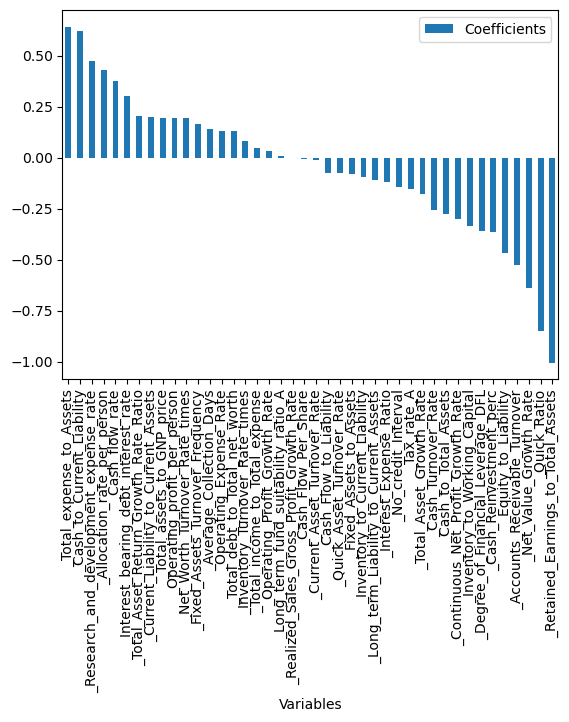

In [226]:
df.set_index('Variables').sort_values(by='Coefficients',ascending=False).plot(kind='bar')

In [227]:
LDA.intercept_

array([-3.86574979])

In [228]:
X_train.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Cash_to_Total_Assets',
       '_Cash_to_Current_Liability', '_Inventory_to_Working_Capital',
       '_Inventory_to_Current_Liability',
       '_Long_term_Liabi

### LDA Grid search CV

In [229]:
grid={'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.0001,0.00001]}

In [230]:
model_LDA = LinearDiscriminantAnalysis()

In [231]:
grid_search = GridSearchCV(estimator = model_LDA, param_grid = grid)

In [232]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [233]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [234]:
best_model_LDA = grid_search.best_estimator_

In [235]:
ytrain_predict = best_model_LDA.predict(X_train)
ytest_predict = best_model_LDA.predict(X_test)

In [236]:
model_score_train = best_model_LDA.score(X_train, y_train)
print(model_score_train);
print(metrics.classification_report(y_train, ytrain_predict));

0.9114658925979681
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1231
         1.0       0.59      0.54      0.57       147

    accuracy                           0.91      1378
   macro avg       0.77      0.75      0.76      1378
weighted avg       0.91      0.91      0.91      1378



Accuracy Score for Train data is  0.91


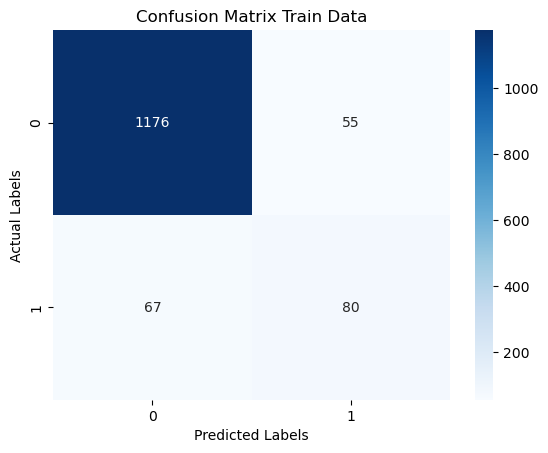

In [237]:
print("Accuracy Score for Train data is ", round(best_model_LDA.score(X_train, y_train),2))
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Train Data')
plt.show()


In [238]:
model_score_test = best_model_LDA.score(X_test, y_test)
print(model_score_test);
print(metrics.classification_report(y_test, ytest_predict));

0.9102941176470588
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       607
         1.0       0.59      0.55      0.57        73

    accuracy                           0.91       680
   macro avg       0.77      0.75      0.76       680
weighted avg       0.91      0.91      0.91       680



Accuracy Score for Test data is  0.91


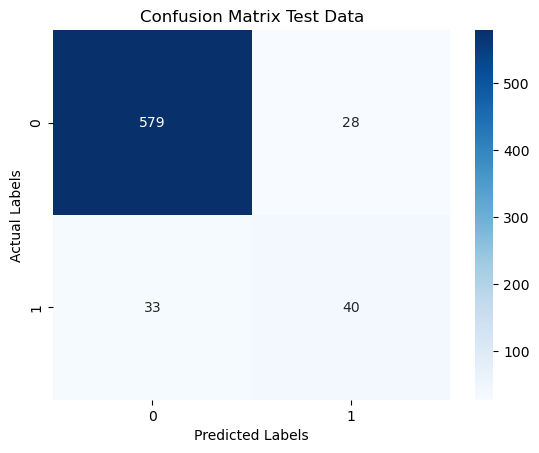

In [239]:
print("Accuracy Score for Test data is ", round(best_model_LDA.score(X_test, y_test),2))
sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Test Data')
plt.show()

AUC for Training Data: 0.916


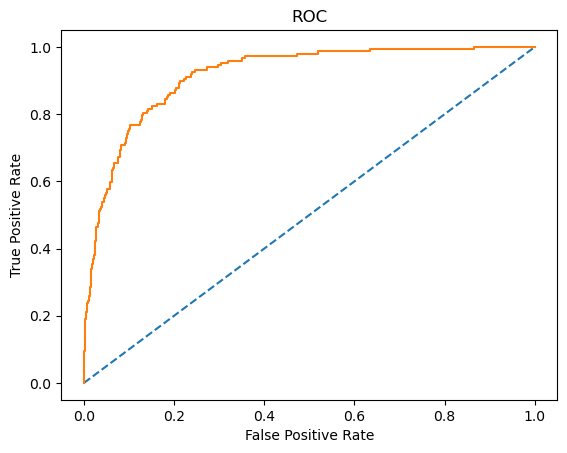

In [240]:
# predict probabilities
probs_tr = best_model_LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_tr = probs_tr[:, 1]
# calculate AUC
train_auc_LDA2 = roc_auc_score(y_train, probs_tr)

print('AUC for Training Data: %.3f' % (train_auc_LDA2))
# calculate roc curve
fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train, probs_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr_tr, tpr_tr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


AUC for Training Data: 0.899


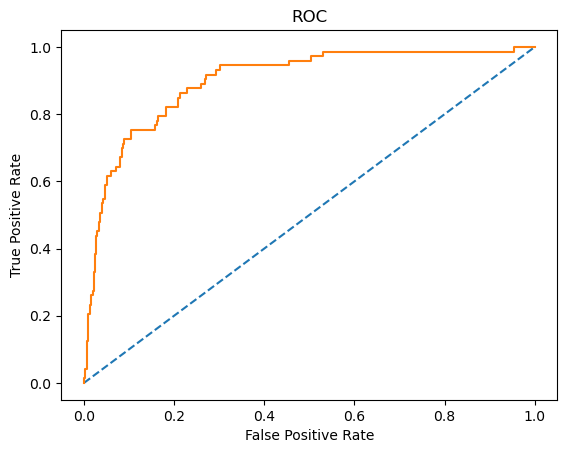

In [241]:
# predict probabilities
probs_test = best_model_LDA.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc_LDA2 = roc_auc_score(y_test, probs_test)

print('AUC for Training Data: %.3f' % (test_auc_LDA2))
# calculate roc curve
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr_test, tpr_test);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


## Changing Thresholds

In [242]:
pred_train_lda_prob = best_model_LDA.predict_proba(X_train)[:,1]
pred_test_lda_prob = best_model_LDA.predict_proba(X_test)[:,1]

In [243]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [244]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.039964268435591435

In [245]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.04:
        a=1
    else:
        a=0
    y_class_pred.append(a)

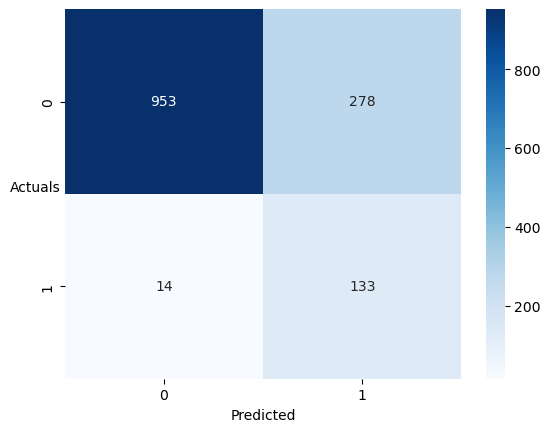

In [246]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [247]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.986     0.774     0.867      1231
         1.0      0.324     0.905     0.477       147

    accuracy                          0.788      1378
   macro avg      0.655     0.839     0.672      1378
weighted avg      0.915     0.788     0.826      1378



In [248]:
y_class_pred_test=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.04:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

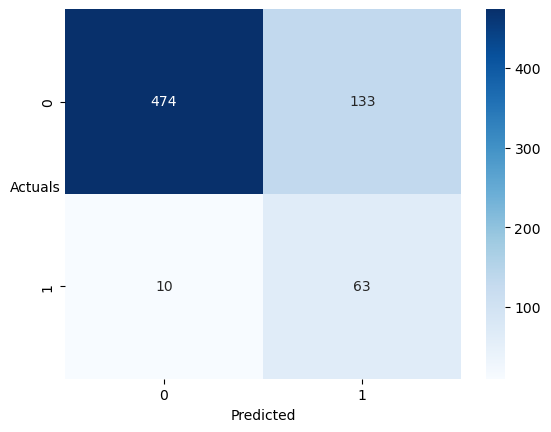

In [249]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [250]:
print(metrics.classification_report(y_test, y_class_pred_test,digits=3))

              precision    recall  f1-score   support

         0.0      0.979     0.781     0.869       607
         1.0      0.321     0.863     0.468        73

    accuracy                          0.790       680
   macro avg      0.650     0.822     0.669       680
weighted avg      0.909     0.790     0.826       680



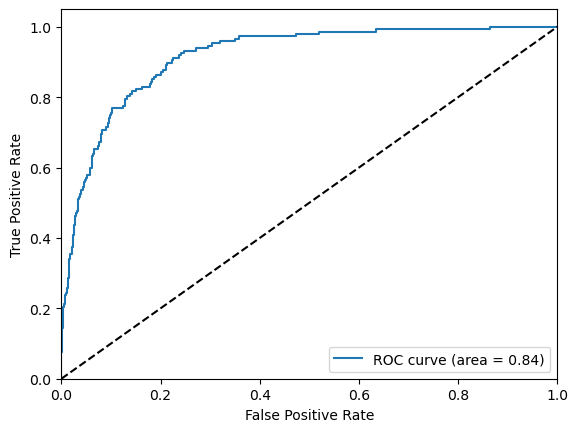

In [251]:


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(y_train, y_class_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc="lower right")

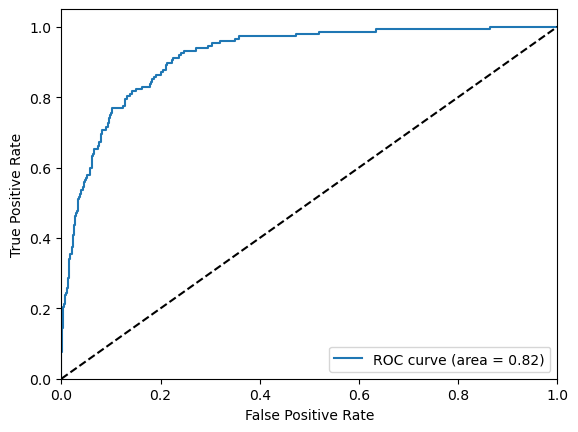

In [252]:


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(y_test, y_class_pred_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc="lower right")

## <a name ='link8'>**Q8**</a><br>
 Model Performance<br>


In [310]:

import pandas as pd
from sklearn import metrics


pred_test_rf=best_grid_rf.predict(X_test)
pred_train_rf=best_grid_rf.predict(X_train)

train_accuracy_lr1 = metrics.accuracy_score(train_XY['Default'], y_pred_optimal)
test_accuracy_lr1 = metrics.accuracy_score(test_XY['Default'], y_pred_test_optimal)
train_accuracy_rfcl2 = metrics.accuracy_score(y_train, pred_train_rf)
test_accuracy_rfcl2 = metrics.accuracy_score(y_test, pred_test_rf)
train_accuracy_lda2 = metrics.accuracy_score(y_train, y_class_pred)
test_accuracy_lda2 = metrics.accuracy_score(y_test,y_class_pred_test)


train_precision_lr1 = metrics.precision_score(train_XY['Default'], y_pred_optimal)
test_precision_lr1 = metrics.precision_score(test_XY['Default'], y_pred_test_optimal)
train_precision_rfcl2 = metrics.precision_score(y_train, pred_train_rf)
test_precision_rfcl2 = metrics.precision_score(y_test, pred_test_rf)
train_precision_lda2 = metrics.precision_score(y_train, y_class_pred)
test_precision_lda2 = metrics.precision_score(y_test,y_class_pred_test)


train_recall_lr1 = metrics.recall_score(train_XY['Default'], y_pred_optimal)
test_recall_lr1 = metrics.recall_score(test_XY['Default'], y_pred_test_optimal)
train_recall_rfcl2 = metrics.recall_score(y_train, pred_train_rf)
test_recall_rfcl2 = metrics.recall_score(y_test, pred_test_rf)
train_recall_lda2 = metrics.recall_score(y_train, y_class_pred)
test_recall_lda2 = metrics.recall_score(y_test,y_class_pred_test)





# Create a dictionary to store the performance metrics for the models
performance_metric = {
    'Model': ['Logistic Regresion','Random Forest','LDA Model '],
    'Train Accuracy': [train_accuracy_lr1,train_accuracy_rfcl2,train_accuracy_lda2],
    'Test Accuracy': [test_accuracy_lr1,test_accuracy_rfcl2,test_accuracy_lda2],
    'Train Precision': [train_precision_lr1,train_precision_rfcl2,train_precision_lda2],
    'Test Precision': [test_precision_lr1,test_precision_rfcl2,test_precision_lda2],
    'Train Recall': [train_recall_lr1,train_recall_rfcl2,train_recall_lda2],
    'Test Recall': [test_recall_lr1,test_recall_rfcl2,test_recall_lda2],
    
}

# Create a DataFrame from the  dictionary
performance_metric = pd.DataFrame(performance_metric)


In [311]:
performance_metric

Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regresion            0.82           0.81             0.36   
1       Random Forest            0.93           0.93             0.86   
2          LDA Model             0.79           0.79             0.32   

   Test Precision  Train Recall  Test Recall  
0            0.35          0.90         0.84  
1            0.84          0.39         0.37  
2            0.32          0.90         0.86